# Magnitude scale for MBWH

In this workbook, we attempt to replicate the energy-magnitude scale I implemented at MVO 2000-2003 and back-applied to 1996-1999 data

In [1]:
# 1. Code from MVOCatalog project - probably more on hal9000 in MVO data directories

In [2]:
import os
MVOCatalogProjectDir = os.path.join(os.getenv('HOME'), 'Developer', 'kitchensinkGT', 'PROJECTS', 'MVOcatalog', 'to_dataframes')

'''
# /Users/thompsong/Developer/kitchensinkGT/PROJECTS/MVOcatalog/to_dataframes/mbwh_subclass_magnitude_sorted2dataframe.py
import pandas as pd
df = pd.read_csv(os.path.join(MVOCatalogProjectDir, 'mbwh_subclass_magnitude_sorted.dat'),sep='\s+')
df.columns = ['year', 'month', 'day', 'hour', 'minute', 'second', 'subclass', 'emag']
df.to_csv('mbwh_subclass_magnitude_sorted.csv')
df.to_pickle(os.path.join(MVOCatalogProjectDir,'mbwh_subclass_magnitude_sorted.pkl'))

# /Users/thompsong/Developer/kitchensinkGT/PROJECTS/MVOcatalog/to_dataframes/MBWHall.aef.to_dataframe.py
import pandas as pd
df = pd.read_csv('MBWHall.aef.wronglinelengthsremoved.txt', sep='\s+')
print(df)
df.columns = ['date', 'time', 'subclass', 'amp', 'eng', 'peakf', 'F0', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'duration']
print(df)
df.to_csv(os.path.join(MVOCatalogProjectDir,'MBWH.aef.fixed.csv'))
df.to_pickle(os.path.join(MVOCatalogProjectDir,'MBWH.aef.fixed.pkl'))
'''


"\n# /Users/thompsong/Developer/kitchensinkGT/PROJECTS/MVOcatalog/to_dataframes/mbwh_subclass_magnitude_sorted2dataframe.py\nimport pandas as pd\ndf = pd.read_csv(os.path.join(MVOCatalogProjectDir, 'mbwh_subclass_magnitude_sorted.dat'),sep='\\s+')\ndf.columns = ['year', 'month', 'day', 'hour', 'minute', 'second', 'subclass', 'emag']\ndf.to_csv('mbwh_subclass_magnitude_sorted.csv')\ndf.to_pickle(os.path.join(MVOCatalogProjectDir,'mbwh_subclass_magnitude_sorted.pkl'))\n\n# /Users/thompsong/Developer/kitchensinkGT/PROJECTS/MVOcatalog/to_dataframes/MBWHall.aef.to_dataframe.py\nimport pandas as pd\ndf = pd.read_csv('MBWHall.aef.wronglinelengthsremoved.txt', sep='\\s+')\nprint(df)\ndf.columns = ['date', 'time', 'subclass', 'amp', 'eng', 'peakf', 'F0', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'duration']\nprint(df)\ndf.to_csv(os.path.join(MVOCatalogProjectDir,'MBWH.aef.fixed.csv'))\ndf.to_pickle(os.path.join(MVOCatalogProjectDir,'MBWH.aef.fixed.pkl'))\n"

# 3. Read MBWH catalog with AEF data into Python

In [3]:
# AEF data created by: /Users/thompsong/Dropbox/code/MVO_setups/mvocomputerbackups/Linux/_development/ampengfft
# Algorithm, for each signal:
# 1. dsignal = isignal * gain_factor
# 2. remove offset
# 3. remove instrument response (filter, FFT, deconv in f-domain, IFFT)
# 4. eng += dsignal * dsignal
# 5. abs
# 6. amp = max mean abs dsignal in 2-s moving window
# 7. write amp, eng as %8.2f
# Units of amp and eng are not clear
 
import pandas as pd
import numpy as np
import sys
sys.path.append('lib')
from importlib import reload
import dataframe_tools as DFT
reload(DFT)

<module 'dataframe_tools' from '/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_tools.py'>

/tmp/ipykernel_440883/1010855202.py:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  aefcat = pd.read_csv(csvfile)
/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


date      time subclass    amp      eng  peakf    F0    F1  \
0       1996/11/01  03:58:41        r  0.244  0.00008   5.43   9.0  10.0   
1       1996/11/01  04:27:09        h  0.743  0.00065   1.74   3.0  29.0   
2       1996/11/01  05:23:13        h  0.803  0.00069   1.74   3.0  43.0   
3       1996/11/01  05:46:18        r  0.649  0.00072   3.92   4.0   8.0   
4       1996/11/01  06:01:33        h  0.209  0.00005   1.84  10.0  49.0   
...            ...       ...      ...    ...      ...    ...   ...   ...   
112322  2001/06/27  13:48:23        n  0.635  0.00040   2.01     4  22.0   
112323  2001/06/27  14:30:23        n  0.788  0.00093   2.22     2  11.0   
112324  2001/06/27  15:42:16        n  0.887  0.00060   1.74     2  23.0   
112325  2001/06/27  17:12:43        e  1.790  0.00644   2.98     1  21.0   
112326  2001/06/27  18:00:30        r  3.070  0.01160   2.00     0  25.0   

          F2    F3    F4    F5    F6   F7   F8   F9   F10  duration    ML  \
0       10.0  10.0  14.0  15.0   5.0  4.0  3.0  2.0  17.0       0.0  0.80   
1       14.0  13.0   9.0   9.0  11.0  2.0  2.0  2.0   6.0       0.0  1.29   
2       17.0  13.0   6.0   9.0   5.0  0.0  1.0  1.0   2.0       0.0  1.32   
3       11.0  28.0  11.0  15.0   7.0  3.0  4.0  3.0   5.0       0.0  1.23   
4       12.0   5.0   1.0   3.0   1.0  2.0  1.0  2.0  13.0       0.0  0.73   
...      ...   ...   ...   ...   ...  ...  ...  ...   ...       ...   ...   
112322  51.0   9.0   4.0   4.0   1.0  1.0  0.0  0.0   3.0      41.0  1.22   
112323  42.0  22.0   4.0   8.0   4.0  2.0  1.0  1.0   2.0      39.0  1.31   
112324  41.0  18.0   6.0   7.0   1.0  1.0  0.0  0.0   1.0      42.0  1.36   
112325  38.0  18.0   7.0   8.0   4.0  1.0  1.0  0.0   1.0      78.0  1.67   
112326  50.0  11.0   6.0   5.0   2.0  0.0  0.0  0.0   0.0      53.0  1.90   

          ME  
0       0.61  
1       1.22  
2       1.24  
3       1.25  
4       0.48  
...      ...  
112322  1.08  
112323  1.32  
112324  1.20  
112325  1.88  
112326  2.05  

[112327 rows x 20 columns]

# events = 112327


columns = Index(['date', 'time', 'subclass', 'amp', 'eng', 'peakf', 'F0', 'F1', 'F2',
       'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'duration', 'ML',
       'ME'],
      dtype='object')
# events = 112327

 Got 110103 events
ME = 1.24 ML - 0.322
alt: ML = 0.809 ME + 0.261
R-squared value: 0.878
Mean squared error: 0.05


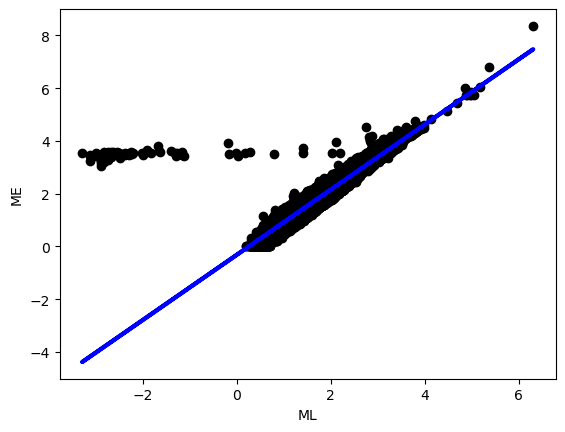


 Got 110103 events
ML = 0.71 ME + 0.4
alt: ME = 1.41 ML - 0.564
R-squared value: 0.878
Mean squared error: 0.03


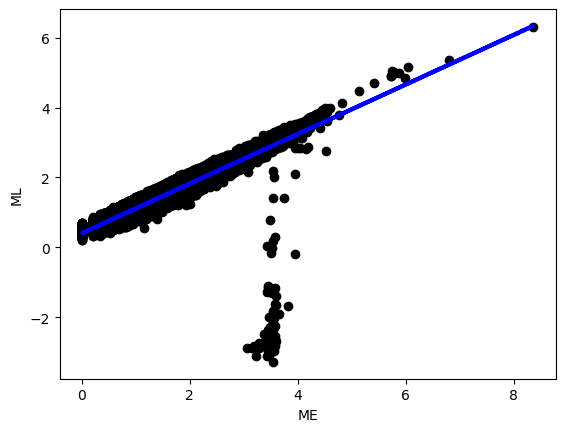

# events of r = 53726
 

 Got 52445 events
ME = 1.3 ML - 0.318
alt: ML = 0.768 ME + 0.244
R-squared value: 0.946
Mean squared error: 0.02


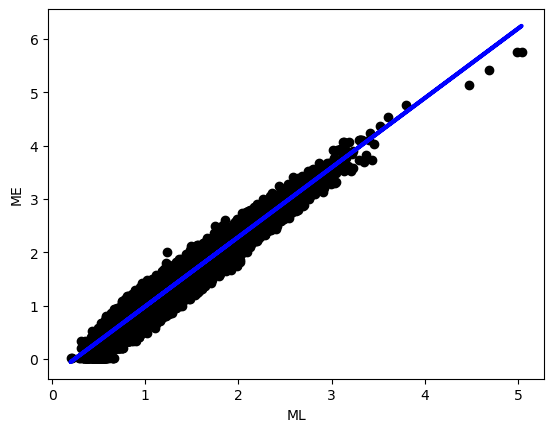

 

 Got 52445 events
ML = 0.726 ME + 0.305
alt: ME = 1.38 ML - 0.421
R-squared value: 0.946
Mean squared error: 0.01


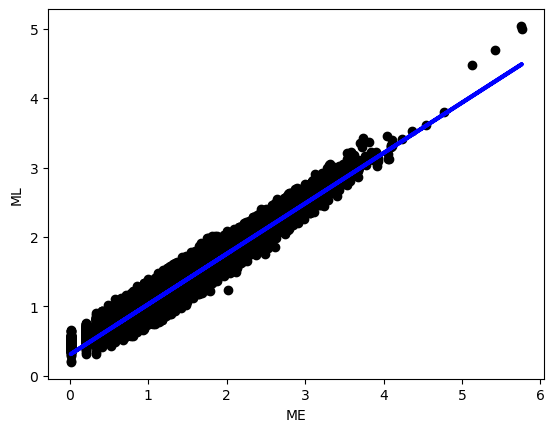

# events of e = 4509
 

 Got 4303 events
ME = 1.28 ML - 0.283
alt: ML = 0.78 ME + 0.221
R-squared value: 0.935
Mean squared error: 0.02


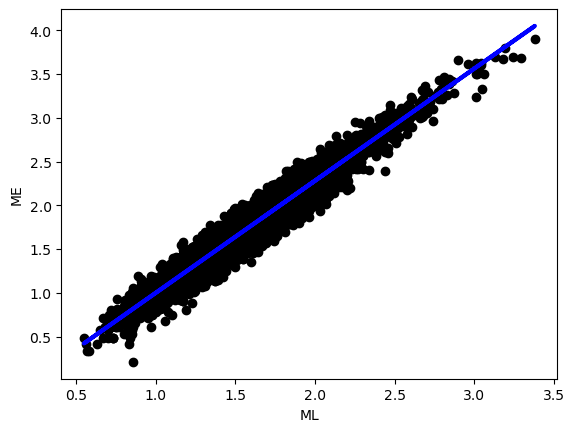

 

 Got 4303 events
ML = 0.73 ME + 0.313
alt: ME = 1.37 ML - 0.429
R-squared value: 0.935
Mean squared error: 0.01


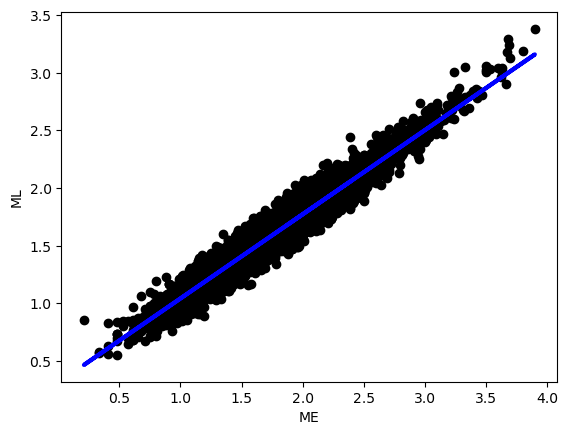

# events of l = 7881
 

 Got 7586 events
ME = 1.29 ML - 0.537
alt: ML = 0.775 ME + 0.417
R-squared value: 0.958
Mean squared error: 0.01


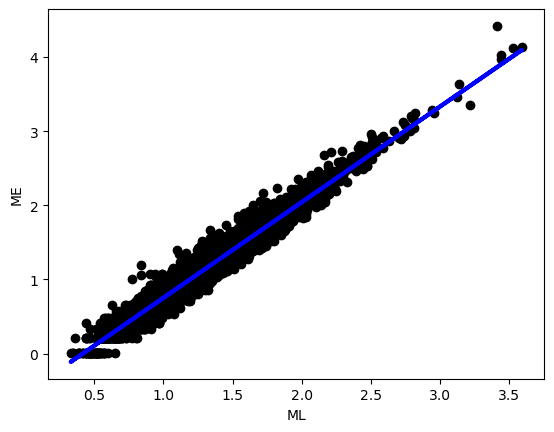

 

 Got 7586 events
ML = 0.743 ME + 0.454
alt: ME = 1.35 ML - 0.611
R-squared value: 0.958
Mean squared error: 0.01


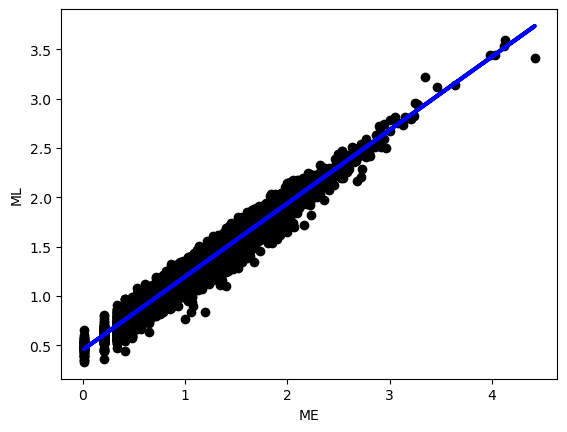

# events of h = 34935
 

 Got 34780 events
ME = 1.31 ML - 0.53
alt: ML = 0.765 ME + 0.406
R-squared value: 0.986
Mean squared error: 0.01


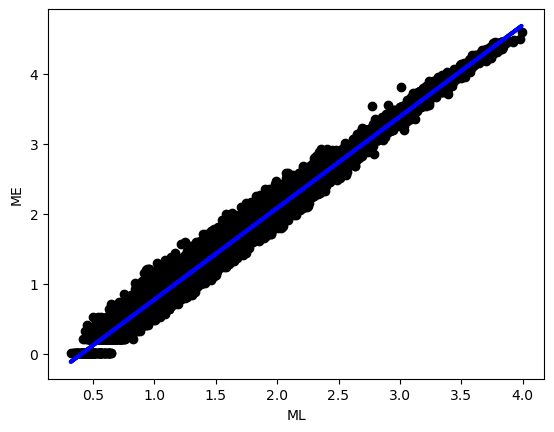

 

 Got 34780 events
ML = 0.754 ME + 0.422
alt: ME = 1.33 ML - 0.56
R-squared value: 0.986
Mean squared error: 0.01


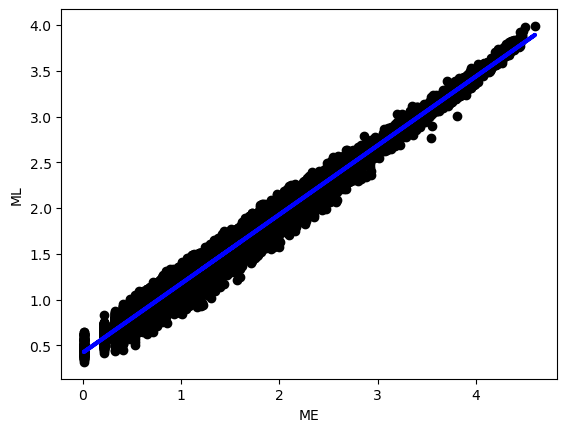

# events of t = 5469
 

 Got 5379 events
ME = 1.28 ML - 0.635
alt: ML = 0.784 ME + 0.498
R-squared value: 0.969
Mean squared error: 0.01


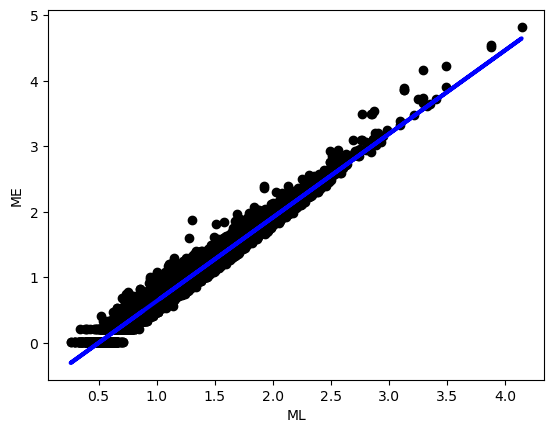

 

 Got 5379 events
ML = 0.76 ME + 0.519
alt: ME = 1.32 ML - 0.683
R-squared value: 0.969
Mean squared error: 0.01


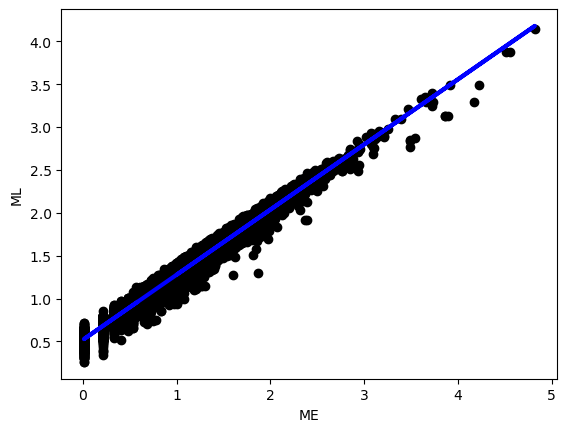

In [21]:
# AEF data generated with ampengfft. amp in um. energy in um^2? has it been divided by sample rate? (75 or 100 Hz)
csvfile = os.path.join(MVOCatalogProjectDir,'MBWH.aef.fixed.csv')
aefcat = pd.read_csv(csvfile)
A = aefcat['amp']*1e-3 # in m
R = 5000 # approx distance of MBWH from "dome" source
aefcat['ML'] = DFT.local_magnitude(A, R)
E = DFT.seismic_energy(aefcat['eng']*1e-6, R)
aefcat['ME'] = DFT.energy_magnitude(E)+1.8

DFT.summarize_catdf(aefcat)
#DFT.linregress(aefcat, 'mag', 'emag')
DFT.linearRegressMagnitudesBySubclass(aefcat, subclass_col='subclass', mag_columns=['ML', 'ME'], \
                                      subclasses=['r', 'e', 'l', 'h', 't'], plot=True, print_stats=True)

In [22]:
print(aefcat['ML'].median())
print(aefcat['ME'].median())

1.32
1.32


In conclusion, from MBWH rows in AEF/S-files from ampengfft, we seem to get crossover at ML=ME=1.3, which is the median magnitude, if we choose:

$ML = log(amp*1e-3) + log(R) + 3.01e-6 R + 0.70$

and

$ME = 2/3 log (9.8e14 eng*1e-6 * 1/75) - 1.4$

where R is distance in m (about 5000 for MBWH), 9.8e14 is a correction for 2 pi R^2 rho speed in Boatwright, and 75 is sampling rate (since ampengfft does not divide sum(amp^2) by sample rate


# 4. Load alternative catalog that might be from merge of AEF data and MBWH mag catalog

Here we try to understand the energy magnitude scale as implemented at MVO by merging AEF data and the MBWH catalog

In [23]:
import os
pklfile = os.path.join(MVOCatalogProjectDir, 'mbwh_subclass_aef_emag.pkl')
mergedcat = pd.read_pickle(pklfile)
'''
try:
    mergedcat = mergedcat.loc[:, ~cat.columns.str.contains('^Unnamed')]
except: 
    pass
'''
# Compute local magnitude
A = mergedcat['amp']*1e-3 # assuming ampengfft computes to displacement in mm, but could be um, or mm/s, or um/s
R = 5000 # approx distance of MBWH from "dome" source
# changing f from 1.11 to 1
#mergedcat['ML'] = np.log10(mergedcat['amp']*1000) + 1.11 * np.log10(R) + 0.00189 * R - 2.09
mergedcat['ML'] = DFT.local_magnitude(A, R)
E = DFT.seismic_energy(mergedcat['eng']*1e-6, R)
mergedcat['ME'] = DFT.energy_magnitude(E)+1.8
#mergedcat['emag2'] = np.round(0.45*np.log10(mergedcat['eng'])+2.2,1)

# remove rows with NULL values
mergedcat['emag'] = mergedcat['emag'].replace(-99.9, np.nan)
mergedcat['mag'] = mergedcat['mag'].replace(-2.0, np.nan)

mergedcat2 = mergedcat[mergedcat['emag']>=0.0]

DFT.summarize_catdf(mergedcat2)

/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/thompsong/miniconda3/envs/kitchensink/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


date subclass_x    amp      eng  peakf    F0    F1  \
0      1996-11-01 03:58:41          r  0.244  0.00008   5.43   9.0  10.0   
1      1996-11-01 04:27:09          h  0.743  0.00065   1.74   3.0  29.0   
2      1996-11-01 05:23:13          h  0.803  0.00069   1.74   3.0  43.0   
3      1996-11-01 05:46:18          r  0.649  0.00072   3.92   4.0   8.0   
4      1996-11-01 06:01:33          h  0.209  0.00005   1.84  10.0  49.0   
...                    ...        ...    ...      ...    ...   ...   ...   
102168 2001-06-27 13:31:11          n  0.973  0.00121   2.73     2   9.0   
102170 2001-06-27 13:48:23          n  0.635  0.00040   2.01     4  22.0   
102171 2001-06-27 14:30:23          n  0.788  0.00093   2.22     2  11.0   
102172 2001-06-27 15:42:16          n  0.887  0.00060   1.74     2  23.0   
102173 2001-06-27 18:00:30          r  3.070  0.01160   2.00     0  25.0   

          F2    F3    F4  ...  year  month  day  hour  minute  second  \
0       10.0  10.0  14.0  ...  1996     11    1     3      58      41   
1       14.0  13.0   9.0  ...  1996     11    1     4      27       9   
2       17.0  13.0   6.0  ...  1996     11    1     5      23      13   
3       11.0  28.0  11.0  ...  1996     11    1     5      46      18   
4       12.0   5.0   1.0  ...  1996     11    1     6       1      33   
...      ...   ...   ...  ...   ...    ...  ...   ...     ...     ...   
102168  46.0  23.0  11.0  ...  2001      6   27    13      31      11   
102170  51.0   9.0   4.0  ...  2001      6   27    13      48      23   
102171  42.0  22.0   4.0  ...  2001      6   27    14      30      23   
102172  41.0  18.0   6.0  ...  2001      6   27    15      42      16   
102173  50.0  11.0   6.0  ...  2001      6   27    18       0      30   

        subclass_y  emag    ML    ME  
0                r  0.62  0.80  0.61  
1                h  0.98  1.29  1.22  
2                h  0.96  1.32  1.24  
3                r  0.79  1.23  1.25  
4                h  0.35  0.73  0.48  
...            ...   ...   ...   ...  
102168           n  1.27  1.40  1.40  
102170           n  0.82  1.22  1.08  
102171           n  1.03  1.31  1.32  
102172           n  1.13  1.36  1.20  
102173           r  1.52  1.90  2.05  

[100498 rows x 28 columns]

# events = 100498


columns = Index(['date', 'subclass_x', 'amp', 'eng', 'peakf', 'F0', 'F1', 'F2', 'F3',
       'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'duration', 'mag', 'year',
       'month', 'day', 'hour', 'minute', 'second', 'subclass_y', 'emag', 'ML',
       'ME'],
      dtype='object')


# events = 100498

 Got 99377 events
ML = 1.03 emag + 0.457
alt: emag = 0.971 ML - 0.444
R-squared value: 0.886
Mean squared error: 0.03
ML_fixed = 1.0 emag + 0.485
alt: emag = 1.0 ML_fixed - 0.485


/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_tools.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col1]=df[col1].astype(float)
/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_tools.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col2]=df[col2].astype(float)
/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_t

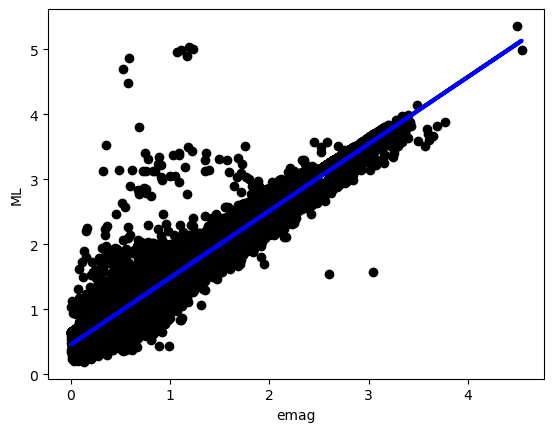

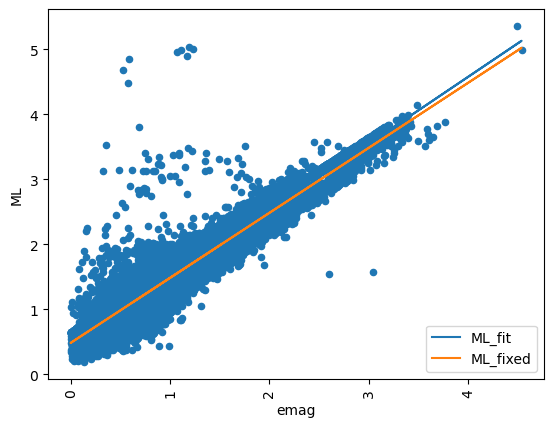


 Got 99357 events
ME = 1.35 emag + 0.169
alt: emag = 0.74 ME - 0.125
R-squared value: 0.861
Mean squared error: 0.06
ME_fixed = 1.33 emag + 0.186
alt: emag = 0.75 ME_fixed - 0.14


/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_tools.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col1]=df[col1].astype(float)
/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_tools.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col2]=df[col2].astype(float)
/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_t

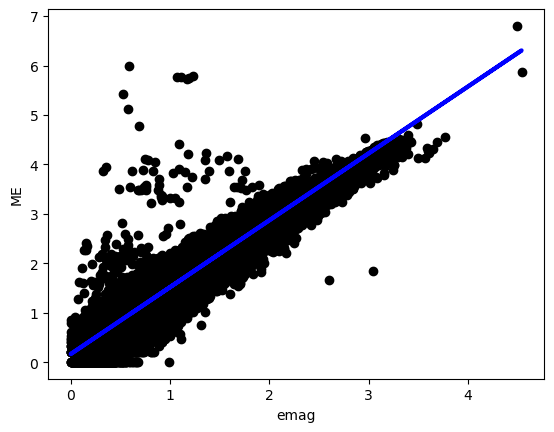

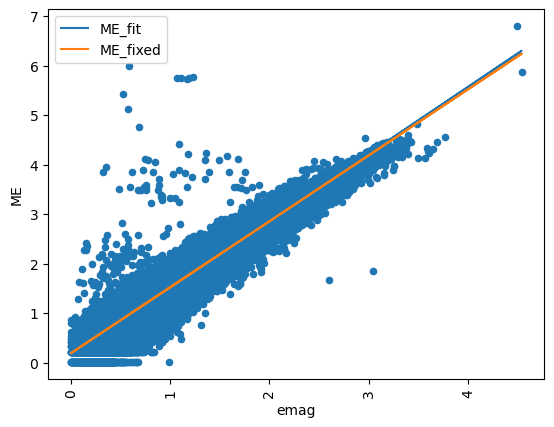


 Got 99377 events
emag = 0.86 ML - 0.285
alt: ML = 1.16 emag + 0.331
R-squared value: 0.886
Mean squared error: 0.02
emag_fixed = 1.0 ML - 0.485
alt: ML = 1.0 emag_fixed + 0.485


/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_tools.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col1]=df[col1].astype(float)
/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_tools.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col2]=df[col2].astype(float)
/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_t

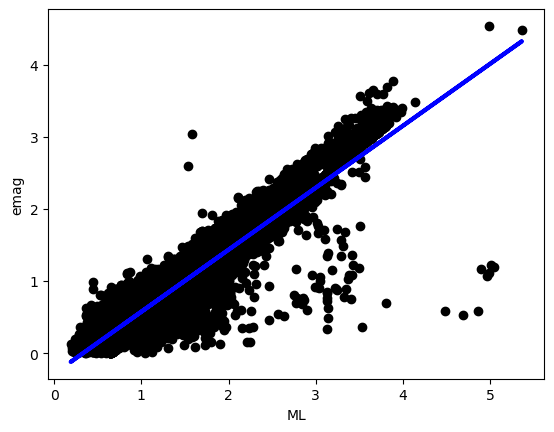

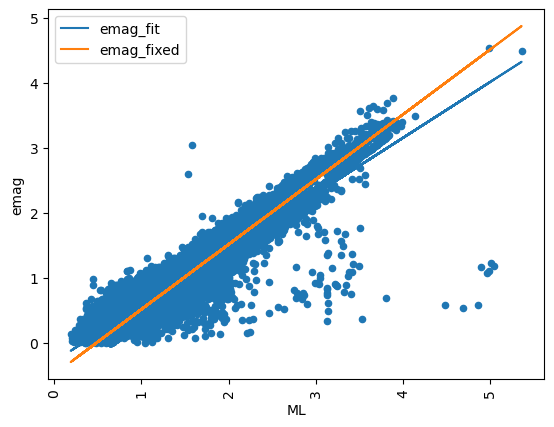


 Got 99357 events
ME = 1.29 ML - 0.395
alt: ML = 0.777 ME + 0.307
R-squared value: 0.935
Mean squared error: 0.03
ME_fixed = 1.33 ML - 0.46
alt: ML = 0.75 ME_fixed + 0.345


/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_tools.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col1]=df[col1].astype(float)
/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_tools.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col2]=df[col2].astype(float)
/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_t

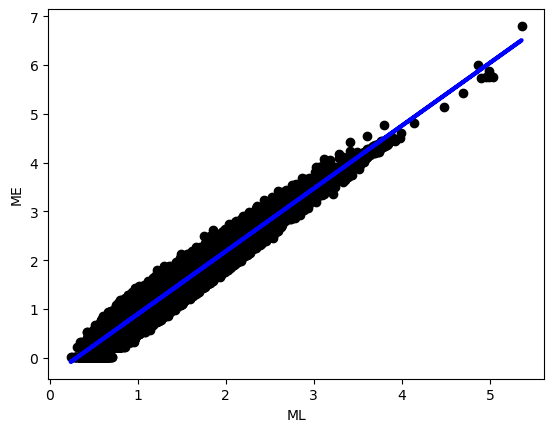

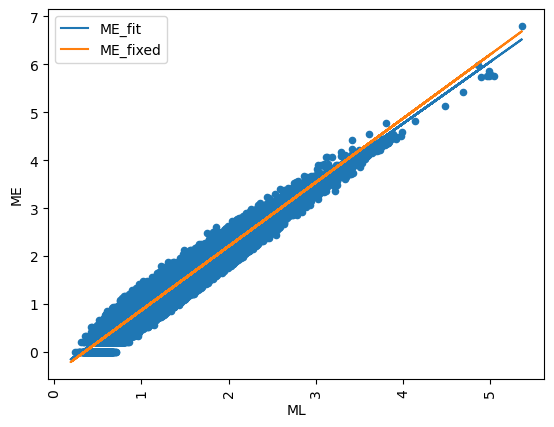


 Got 99357 events
emag = 0.637 ME + 0.024
alt: ME = 1.57 emag - 0.0376
R-squared value: 0.861
Mean squared error: 0.03
emag_fixed = 0.75 ME - 0.14
alt: ME = 1.33 emag_fixed + 0.187


/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_tools.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col1]=df[col1].astype(float)
/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_tools.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col2]=df[col2].astype(float)
/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_t

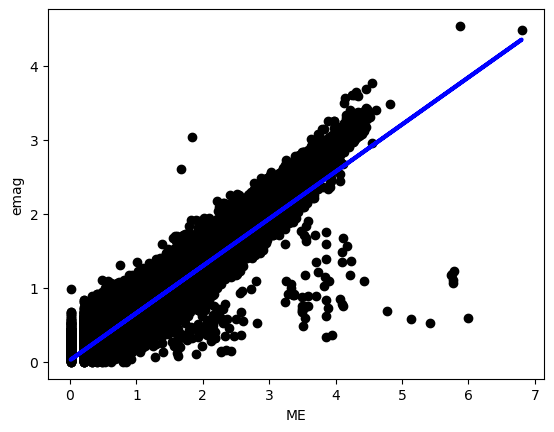

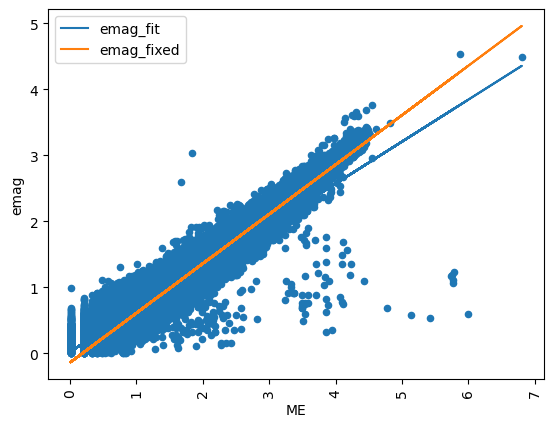


 Got 99357 events
ML = 0.726 ME + 0.38
alt: ME = 1.38 ML - 0.523
R-squared value: 0.935
Mean squared error: 0.02
ML_fixed = 0.75 ME + 0.345
alt: ME = 1.33 ML_fixed - 0.46


/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_tools.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col1]=df[col1].astype(float)
/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_tools.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col2]=df[col2].astype(float)
/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_t

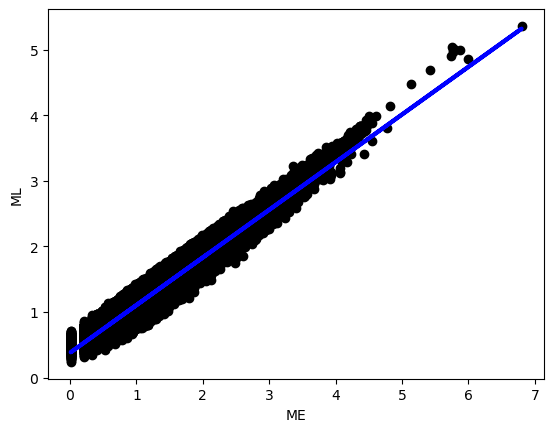

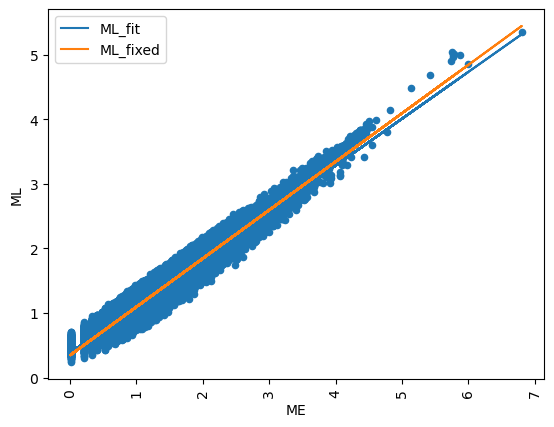

# events of r = 51207
 

 Got 50525 events
ML = 1.09 emag + 0.387
alt: emag = 0.917 ML - 0.355
R-squared value: 0.861
Mean squared error: 0.02
ML_fixed = 1.0 emag + 0.468
alt: emag = 1.0 ML_fixed - 0.468


/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_tools.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col1]=df[col1].astype(float)
/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_tools.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col2]=df[col2].astype(float)
/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_t

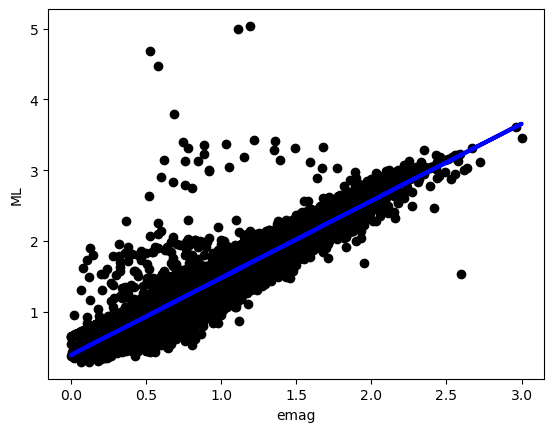

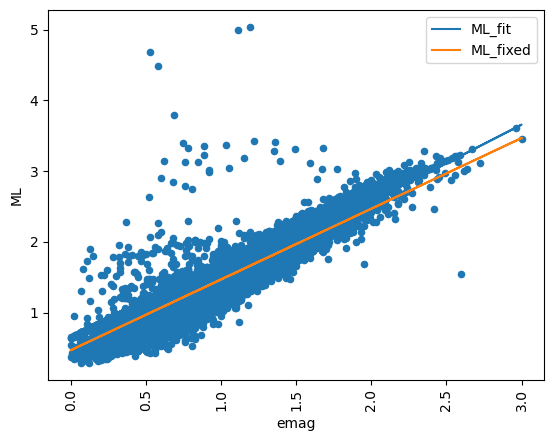

 

 Got 50522 events
ME = 1.44 emag + 0.166
alt: emag = 0.694 ME - 0.115
R-squared value: 0.838
Mean squared error: 0.05
ME_fixed = 1.33 emag + 0.264
alt: emag = 0.75 ME_fixed - 0.198


/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_tools.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col1]=df[col1].astype(float)
/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_tools.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col2]=df[col2].astype(float)
/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_t

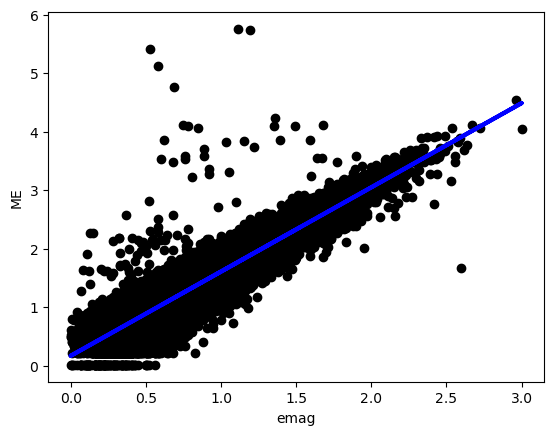

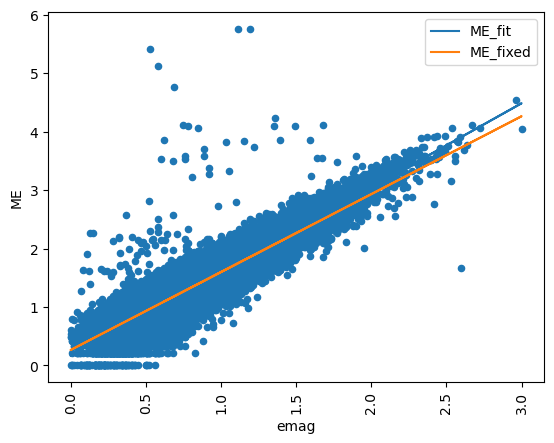

 

 Got 50525 events
emag = 0.79 ML - 0.18
alt: ML = 1.27 emag + 0.228
R-squared value: 0.861
Mean squared error: 0.02
emag_fixed = 1.0 ML - 0.468
alt: ML = 1.0 emag_fixed + 0.468


/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_tools.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col1]=df[col1].astype(float)
/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_tools.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col2]=df[col2].astype(float)
/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_t

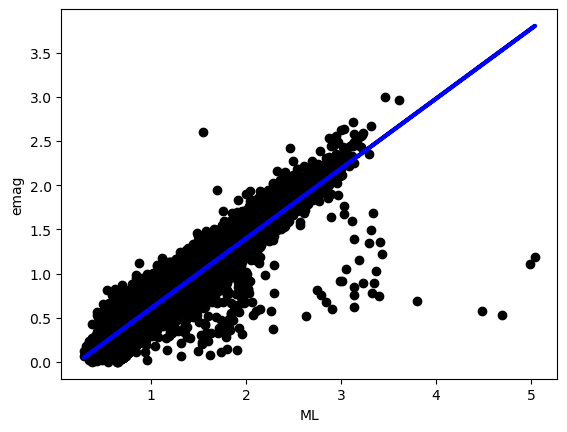

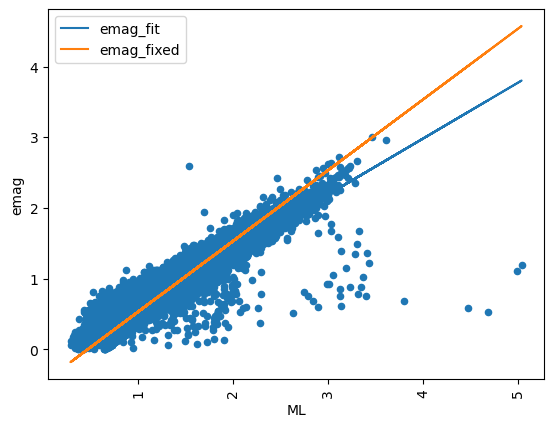

 

 Got 50522 events
ME = 1.3 ML - 0.32
alt: ML = 0.767 ME + 0.245
R-squared value: 0.945
Mean squared error: 0.02
ME_fixed = 1.33 ML - 0.361
alt: ML = 0.75 ME_fixed + 0.271


/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_tools.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col1]=df[col1].astype(float)
/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_tools.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col2]=df[col2].astype(float)
/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_t

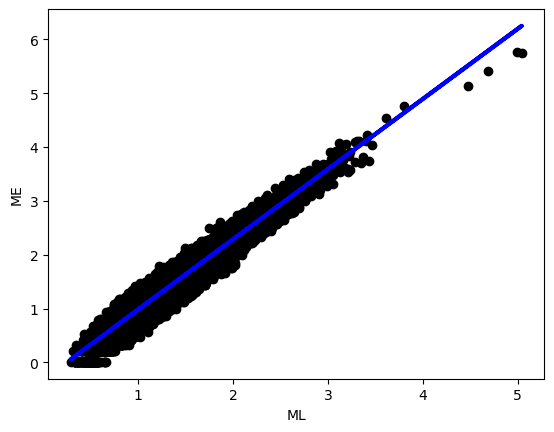

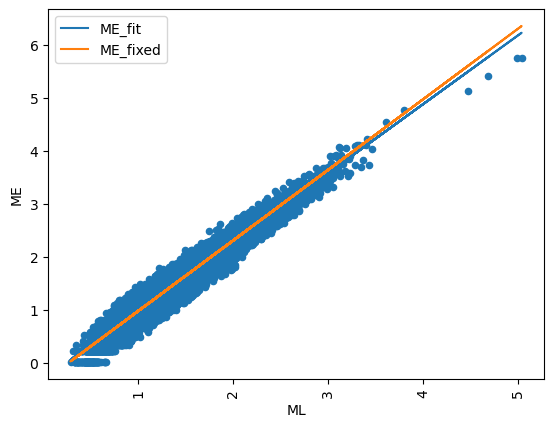

 

 Got 50522 events
emag = 0.581 ME + 0.0503
alt: ME = 1.72 emag - 0.0865
R-squared value: 0.838
Mean squared error: 0.02
emag_fixed = 0.75 ME - 0.198
alt: ME = 1.33 emag_fixed + 0.264


/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_tools.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col1]=df[col1].astype(float)
/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_tools.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col2]=df[col2].astype(float)
/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_t

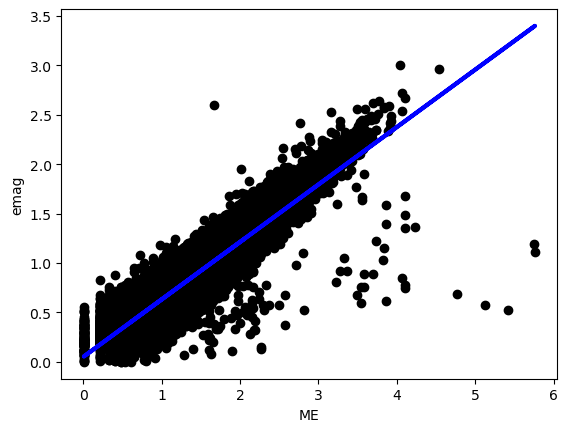

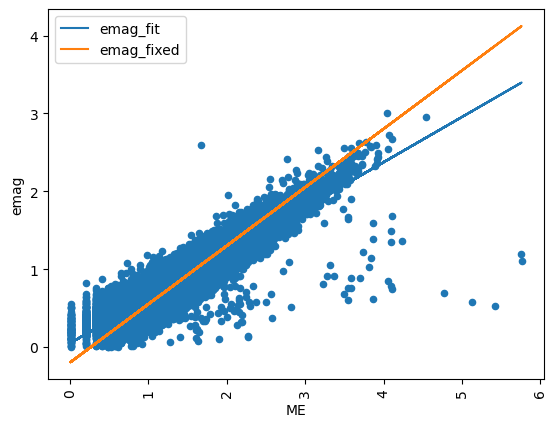

 

 Got 50522 events
ML = 0.725 ME + 0.307
alt: ME = 1.38 ML - 0.424
R-squared value: 0.945
Mean squared error: 0.01
ML_fixed = 0.75 ME + 0.27
alt: ME = 1.33 ML_fixed - 0.36


/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_tools.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col1]=df[col1].astype(float)
/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_tools.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col2]=df[col2].astype(float)
/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_t

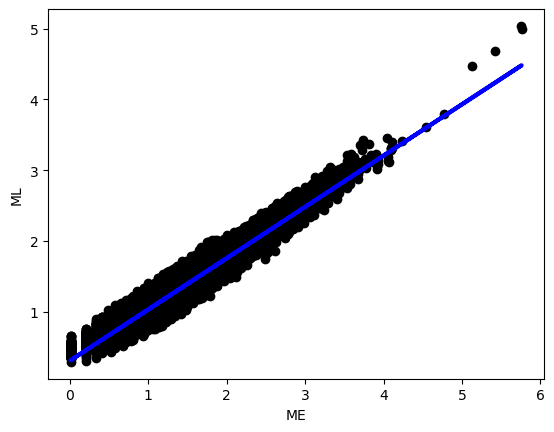

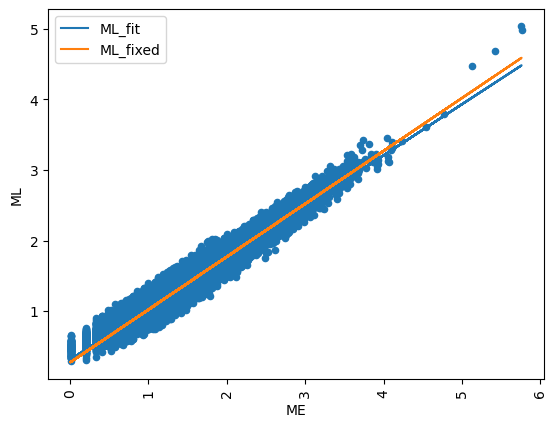

# events of e = 4180
 

 Got 4049 events
ML = 1.03 emag + 0.487
alt: emag = 0.968 ML - 0.471
R-squared value: 0.874
Mean squared error: 0.02
ML_fixed = 1.0 emag + 0.524
alt: emag = 1.0 ML_fixed - 0.524


/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_tools.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col1]=df[col1].astype(float)
/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_tools.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col2]=df[col2].astype(float)
/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_t

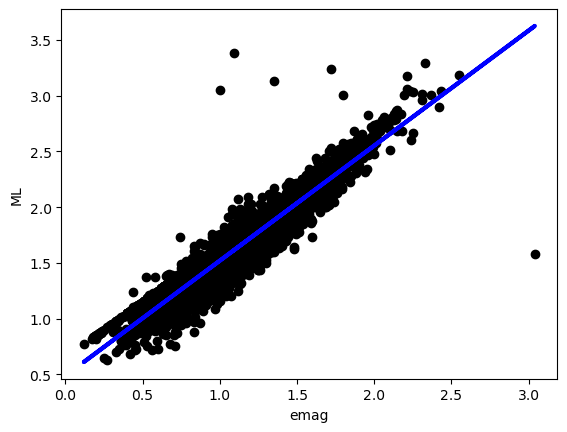

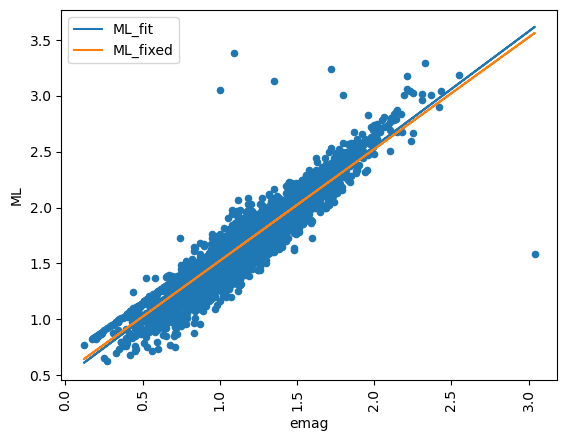

 

 Got 4049 events
ME = 1.38 emag + 0.273
alt: emag = 0.722 ME - 0.197
R-squared value: 0.887
Mean squared error: 0.03
ME_fixed = 1.33 emag + 0.331
alt: emag = 0.75 ME_fixed - 0.248


/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_tools.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col1]=df[col1].astype(float)
/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_tools.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col2]=df[col2].astype(float)
/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_t

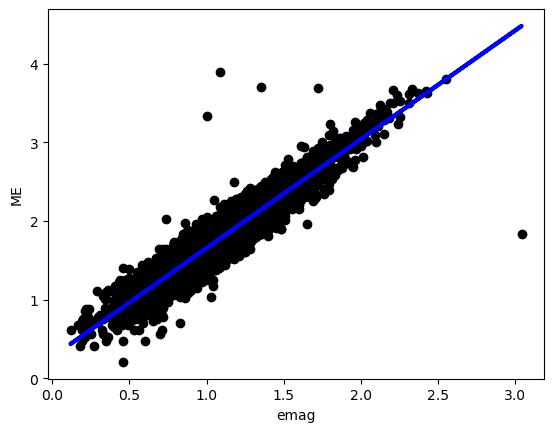

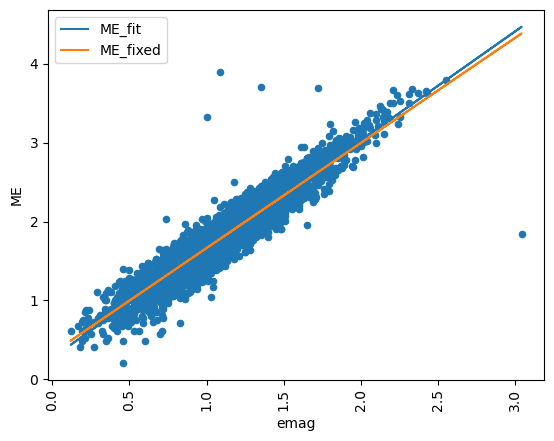

 

 Got 4049 events
emag = 0.846 ML - 0.268
alt: ML = 1.18 emag + 0.317
R-squared value: 0.874
Mean squared error: 0.02
emag_fixed = 1.0 ML - 0.524
alt: ML = 1.0 emag_fixed + 0.524


/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_tools.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col1]=df[col1].astype(float)
/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_tools.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col2]=df[col2].astype(float)
/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_t

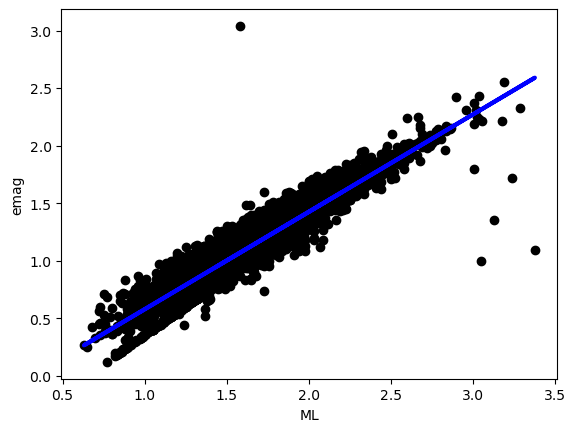

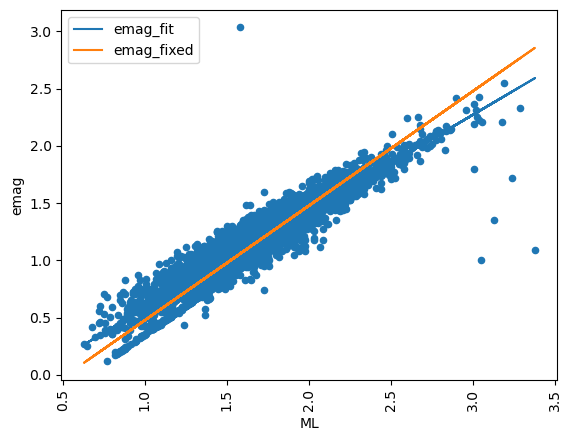

 

 Got 4049 events
ME = 1.29 ML - 0.289
alt: ML = 0.778 ME + 0.225
R-squared value: 0.935
Mean squared error: 0.02
ME_fixed = 1.33 ML - 0.368
alt: ML = 0.75 ME_fixed + 0.276


/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_tools.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col1]=df[col1].astype(float)
/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_tools.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col2]=df[col2].astype(float)
/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_t

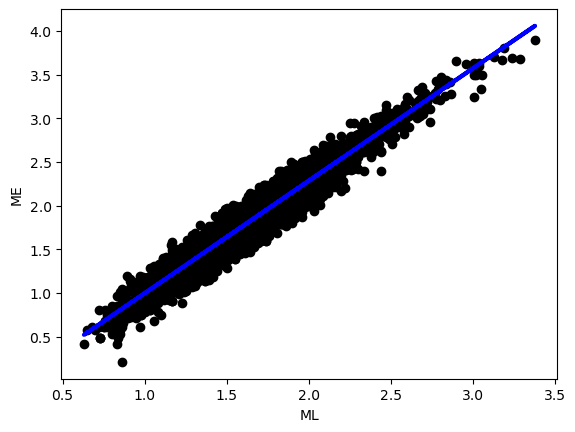

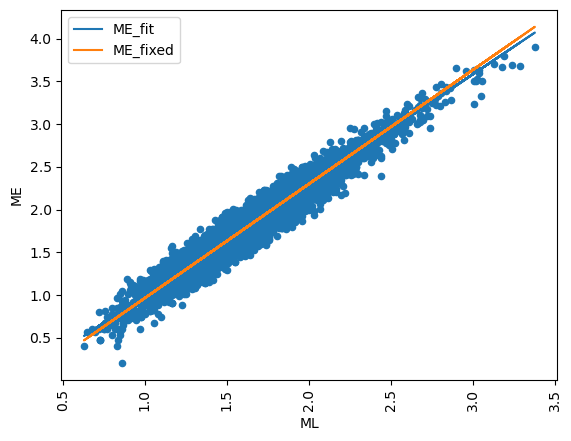

 

 Got 4049 events
emag = 0.641 ME - 0.0464
alt: ME = 1.56 emag + 0.0725
R-squared value: 0.887
Mean squared error: 0.01
emag_fixed = 0.75 ME - 0.248
alt: ME = 1.33 emag_fixed + 0.331


/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_tools.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col1]=df[col1].astype(float)
/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_tools.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col2]=df[col2].astype(float)
/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_t

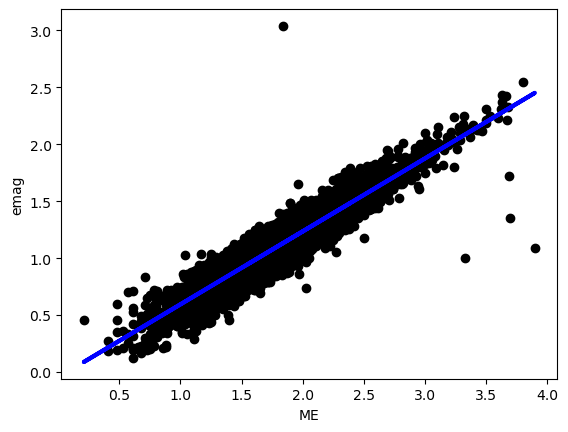

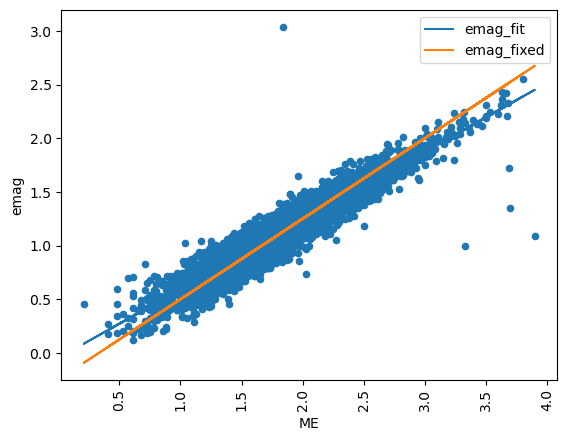

 

 Got 4049 events
ML = 0.727 ME + 0.319
alt: ME = 1.38 ML - 0.438
R-squared value: 0.935
Mean squared error: 0.01
ML_fixed = 0.75 ME + 0.276
alt: ME = 1.33 ML_fixed - 0.368


/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_tools.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col1]=df[col1].astype(float)
/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_tools.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col2]=df[col2].astype(float)
/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_t

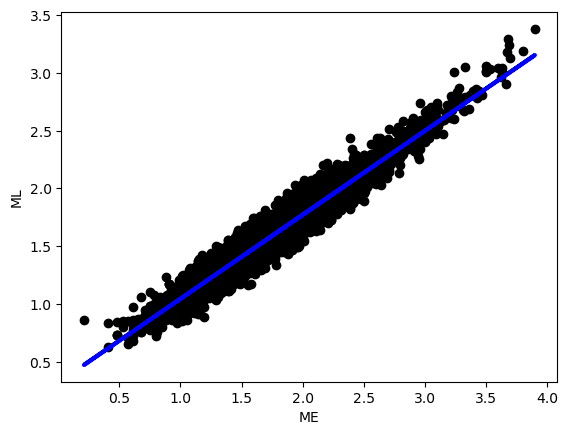

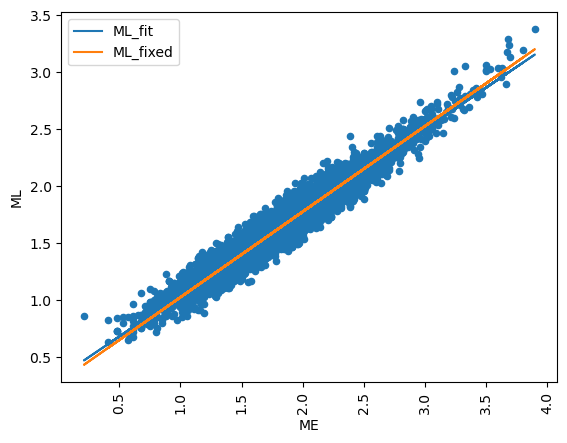

# events of l = 7128
 

 Got 6993 events
ML = 1.01 emag + 0.568
alt: emag = 0.992 ML - 0.564
R-squared value: 0.846
Mean squared error: 0.02
ML_fixed = 1.0 emag + 0.574
alt: emag = 1.0 ML_fixed - 0.574


/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_tools.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col1]=df[col1].astype(float)
/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_tools.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col2]=df[col2].astype(float)
/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_t

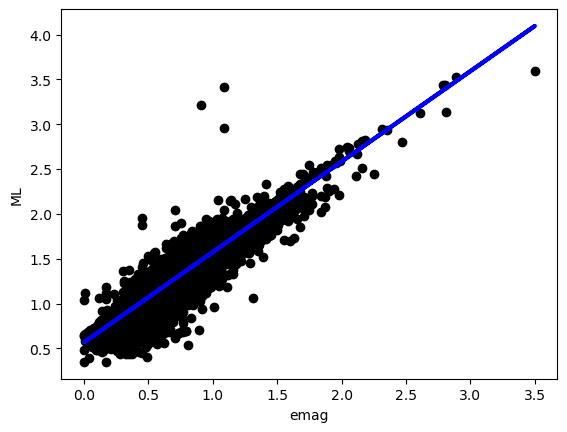

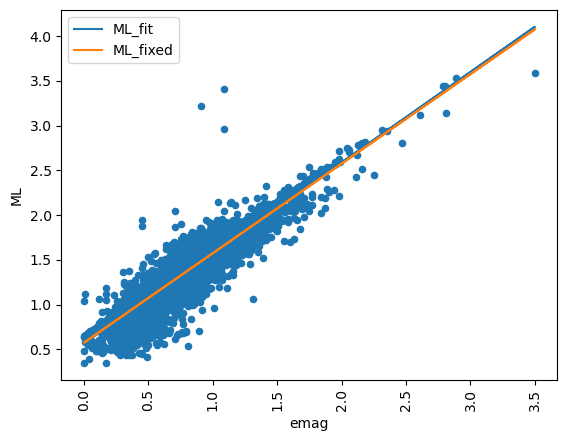

 

 Got 6993 events
ME = 1.35 emag + 0.152
alt: emag = 0.739 ME - 0.112
R-squared value: 0.869
Mean squared error: 0.03
ME_fixed = 1.33 emag + 0.168
alt: emag = 0.75 ME_fixed - 0.126


/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_tools.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col1]=df[col1].astype(float)
/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_tools.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col2]=df[col2].astype(float)
/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_t

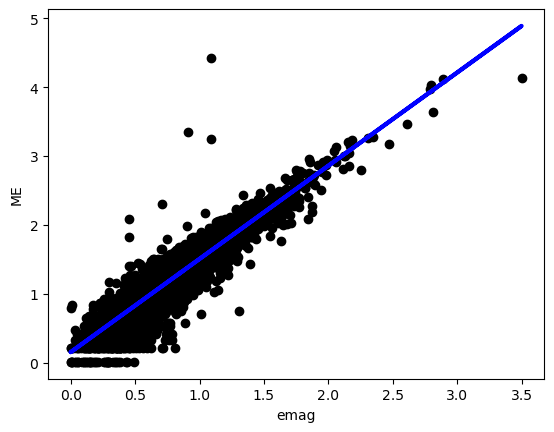

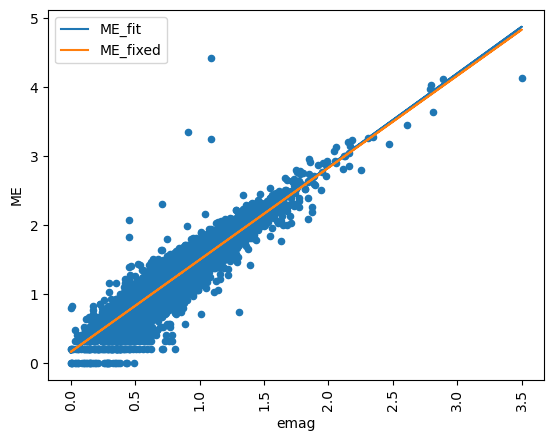

 

 Got 6993 events
emag = 0.839 ML - 0.362
alt: ML = 1.19 emag + 0.431
R-squared value: 0.846
Mean squared error: 0.02
emag_fixed = 1.0 ML - 0.574
alt: ML = 1.0 emag_fixed + 0.574


/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_tools.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col1]=df[col1].astype(float)
/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_tools.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col2]=df[col2].astype(float)
/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_t

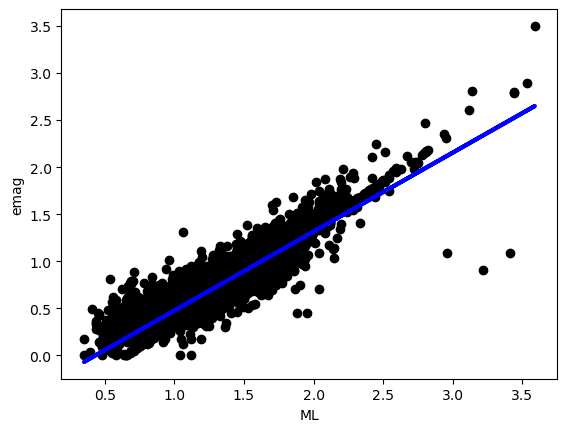

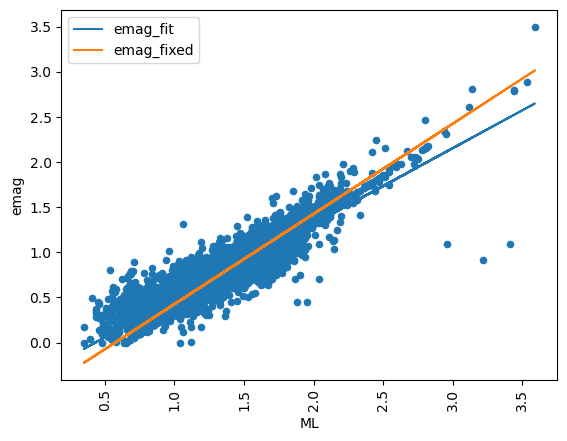

 

 Got 6993 events
ME = 1.3 ML - 0.549
alt: ML = 0.771 ME + 0.424
R-squared value: 0.957
Mean squared error: 0.01
ME_fixed = 1.33 ML - 0.598
alt: ML = 0.75 ME_fixed + 0.448


/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_tools.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col1]=df[col1].astype(float)
/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_tools.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col2]=df[col2].astype(float)
/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_t

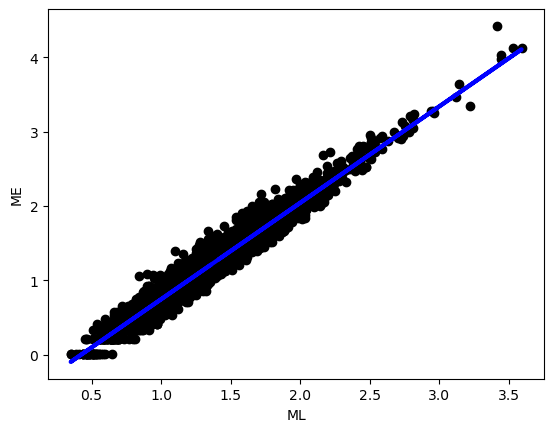

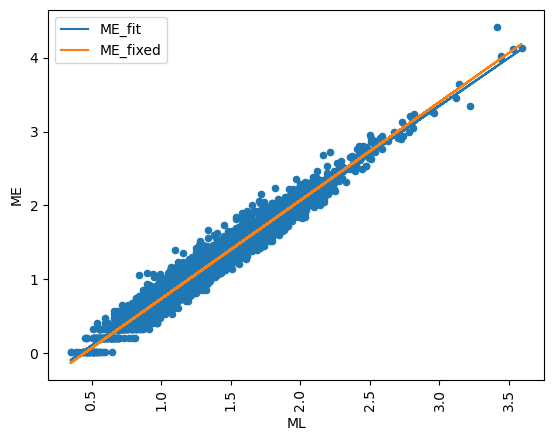

 

 Got 6993 events
emag = 0.642 ME + 4.9e-06
alt: ME = 1.56 emag - 7.63e-06
R-squared value: 0.869
Mean squared error: 0.01
emag_fixed = 0.75 ME - 0.126
alt: ME = 1.33 emag_fixed + 0.168


/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_tools.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col1]=df[col1].astype(float)
/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_tools.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col2]=df[col2].astype(float)
/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_t

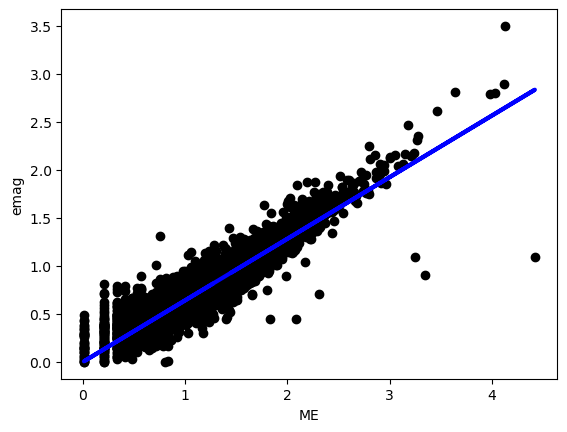

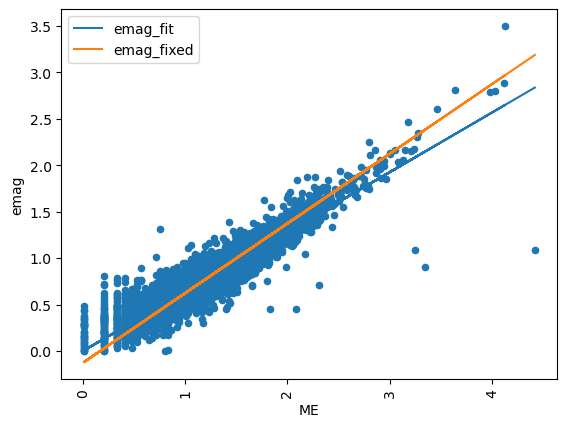

 

 Got 6993 events
ML = 0.738 ME + 0.462
alt: ME = 1.35 ML - 0.626
R-squared value: 0.957
Mean squared error: 0.01
ML_fixed = 0.75 ME + 0.448
alt: ME = 1.33 ML_fixed - 0.597


/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_tools.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col1]=df[col1].astype(float)
/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_tools.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col2]=df[col2].astype(float)
/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_t

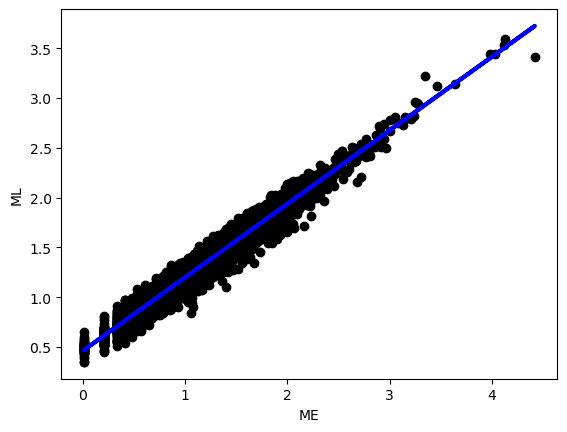

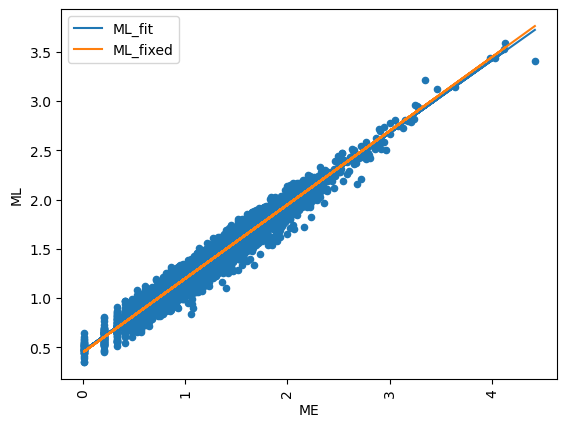

# events of h = 29730
 

 Got 29639 events
ML = 0.975 emag + 0.544
alt: emag = 1.03 ML - 0.558
R-squared value: 0.929
Mean squared error: 0.02
ML_fixed = 1.0 emag + 0.516
alt: emag = 1.0 ML_fixed - 0.516


/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_tools.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col1]=df[col1].astype(float)
/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_tools.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col2]=df[col2].astype(float)
/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_t

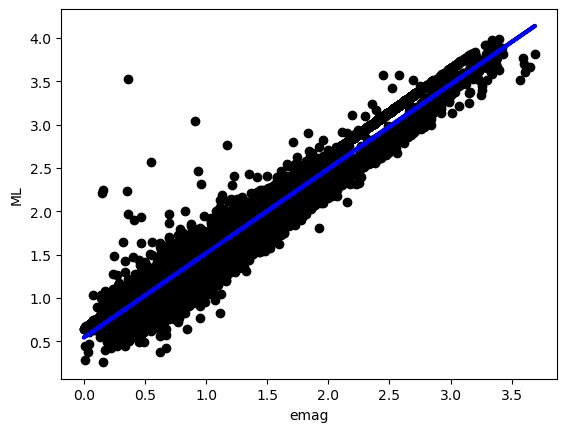

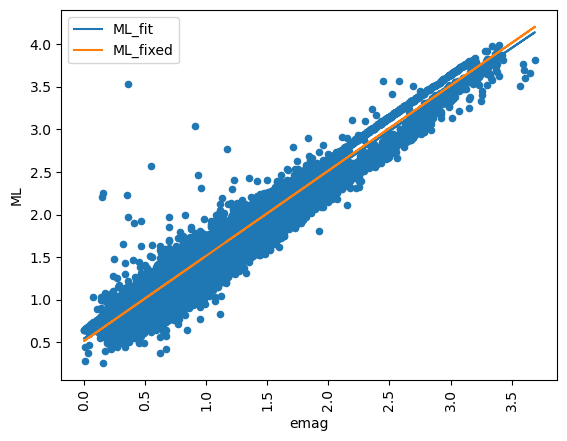

 

 Got 29637 events
ME = 1.29 emag + 0.161
alt: emag = 0.776 ME - 0.125
R-squared value: 0.933
Mean squared error: 0.04
ME_fixed = 1.33 emag + 0.112
alt: emag = 0.75 ME_fixed - 0.084


/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_tools.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col1]=df[col1].astype(float)
/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_tools.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col2]=df[col2].astype(float)
/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_t

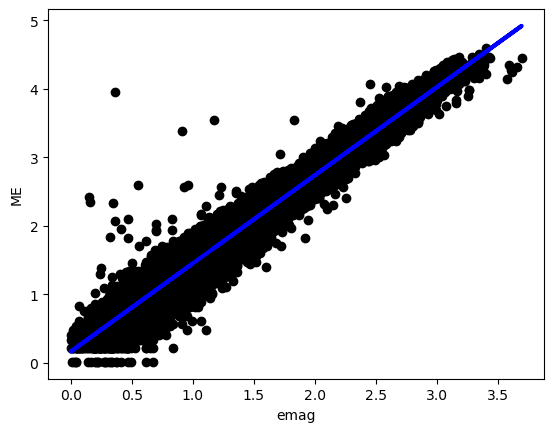

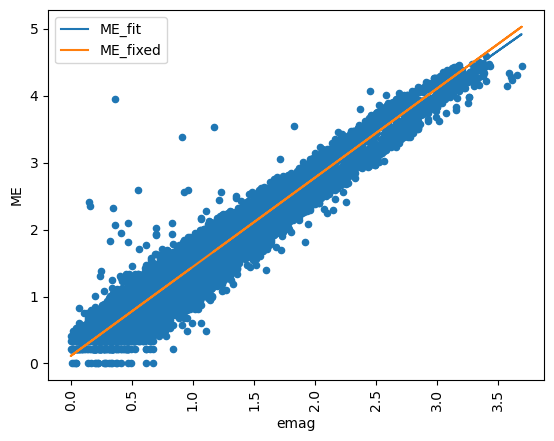

 

 Got 29639 events
emag = 0.953 ML - 0.44
alt: ML = 1.05 emag + 0.462
R-squared value: 0.929
Mean squared error: 0.02
emag_fixed = 1.0 ML - 0.516
alt: ML = 1.0 emag_fixed + 0.516


/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_tools.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col1]=df[col1].astype(float)
/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_tools.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col2]=df[col2].astype(float)
/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_t

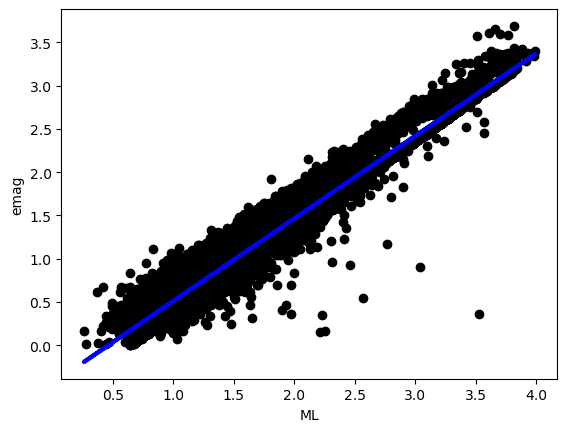

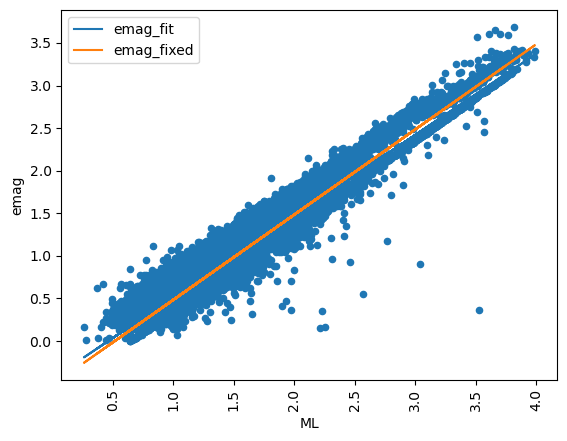

 

 Got 29637 events
ME = 1.31 ML - 0.537
alt: ML = 0.764 ME + 0.41
R-squared value: 0.985
Mean squared error: 0.01
ME_fixed = 1.33 ML - 0.575
alt: ML = 0.75 ME_fixed + 0.431


/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_tools.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col1]=df[col1].astype(float)
/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_tools.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col2]=df[col2].astype(float)
/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_t

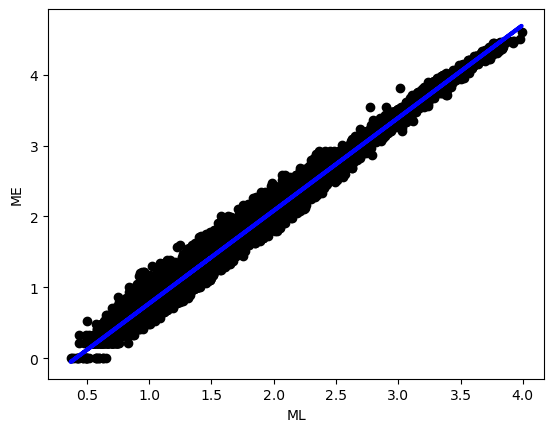

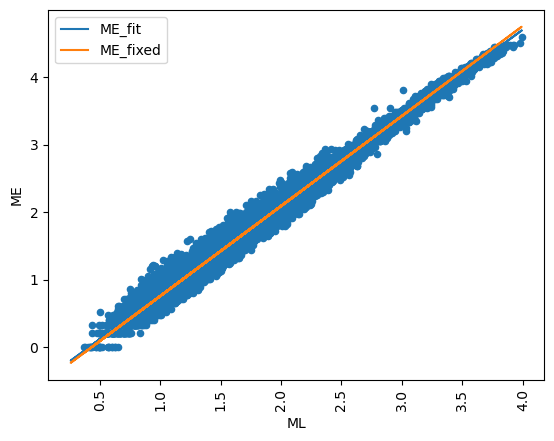

 

 Got 29637 events
emag = 0.724 ME - 0.0434
alt: ME = 1.38 emag + 0.0599
R-squared value: 0.933
Mean squared error: 0.02
emag_fixed = 0.75 ME - 0.0842
alt: ME = 1.33 emag_fixed + 0.112


/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_tools.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col1]=df[col1].astype(float)
/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_tools.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col2]=df[col2].astype(float)
/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_t

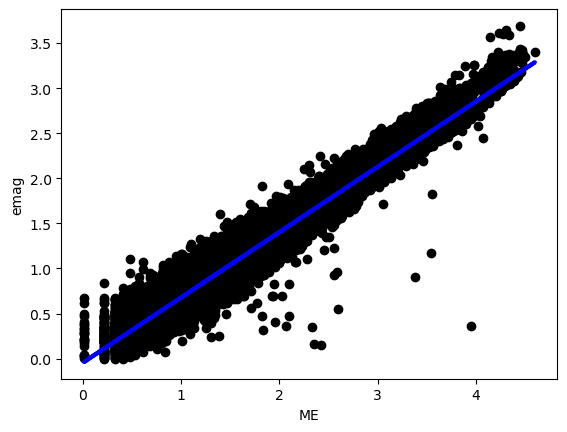

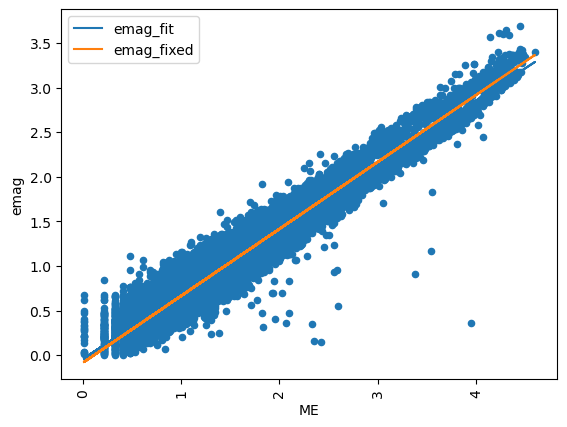

 

 Got 29637 events
ML = 0.752 ME + 0.428
alt: ME = 1.33 ML - 0.57
R-squared value: 0.985
Mean squared error: 0.01
ML_fixed = 0.75 ME + 0.431
alt: ME = 1.33 ML_fixed - 0.575


/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_tools.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col1]=df[col1].astype(float)
/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_tools.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col2]=df[col2].astype(float)
/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_t

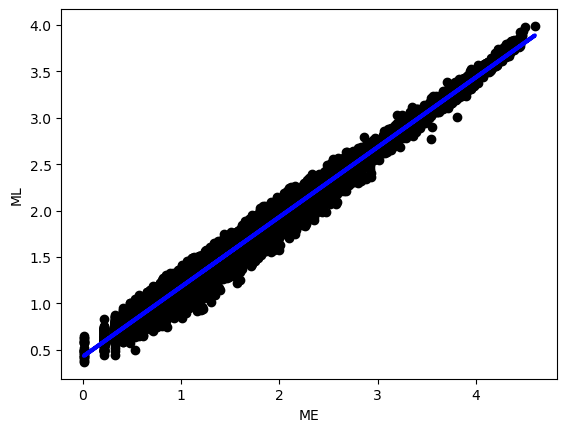

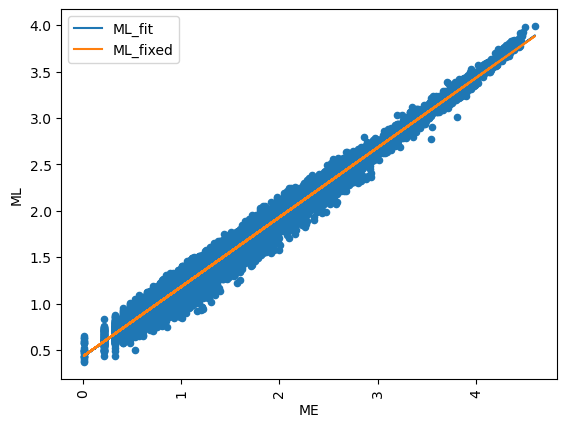

# events of t = 5241
 

 Got 5179 events
ML = 1.0 emag + 0.414
alt: emag = 0.998 ML - 0.413
R-squared value: 0.82
Mean squared error: 0.04
ML_fixed = 1.0 emag + 0.415
alt: emag = 1.0 ML_fixed - 0.415


/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_tools.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col1]=df[col1].astype(float)
/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_tools.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col2]=df[col2].astype(float)
/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_t

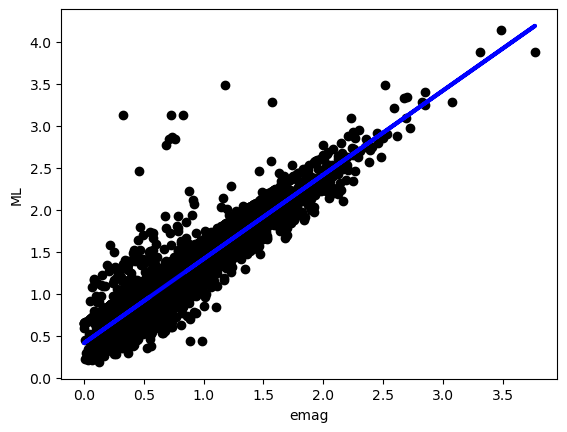

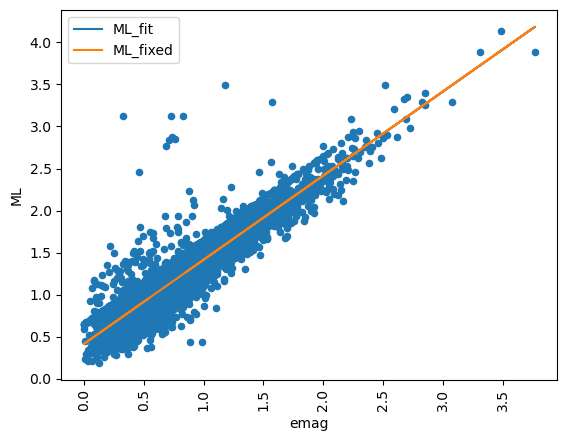

 

 Got 5166 events
ME = 1.3 emag - 0.12
alt: emag = 0.772 ME + 0.0922
R-squared value: 0.817
Mean squared error: 0.07
ME_fixed = 1.33 emag - 0.148
alt: emag = 0.75 ME_fixed + 0.111


/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_tools.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col1]=df[col1].astype(float)
/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_tools.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col2]=df[col2].astype(float)
/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_t

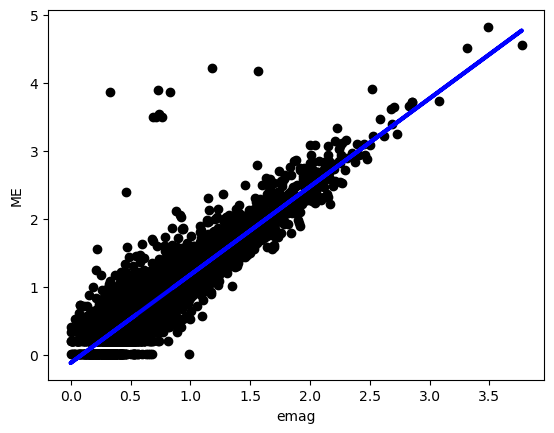

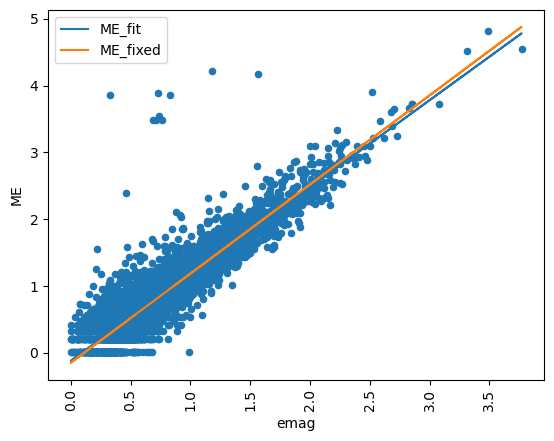

 

 Got 5179 events
emag = 0.818 ML - 0.204
alt: ML = 1.22 emag + 0.249
R-squared value: 0.82
Mean squared error: 0.03
emag_fixed = 1.0 ML - 0.415
alt: ML = 1.0 emag_fixed + 0.415


/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_tools.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col1]=df[col1].astype(float)
/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_tools.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col2]=df[col2].astype(float)
/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_t

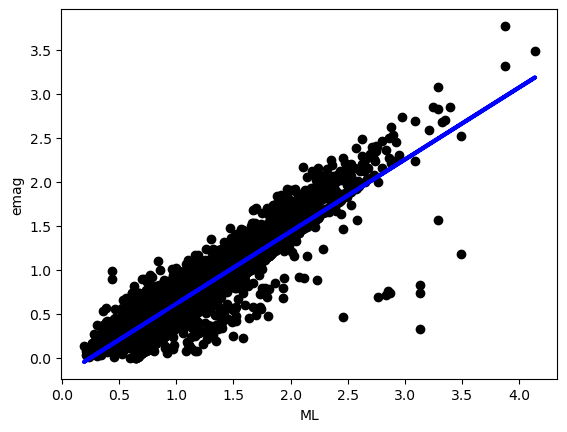

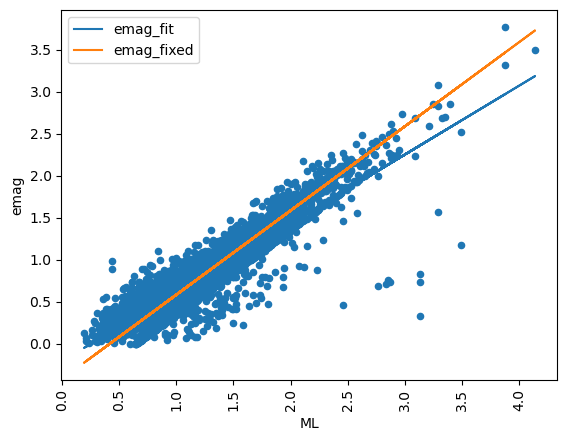

 

 Got 5166 events
ME = 1.28 ML - 0.638
alt: ML = 0.783 ME + 0.499
R-squared value: 0.969
Mean squared error: 0.01
ME_fixed = 1.33 ML - 0.703
alt: ML = 0.75 ME_fixed + 0.527


/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_tools.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col1]=df[col1].astype(float)
/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_tools.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col2]=df[col2].astype(float)
/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_t

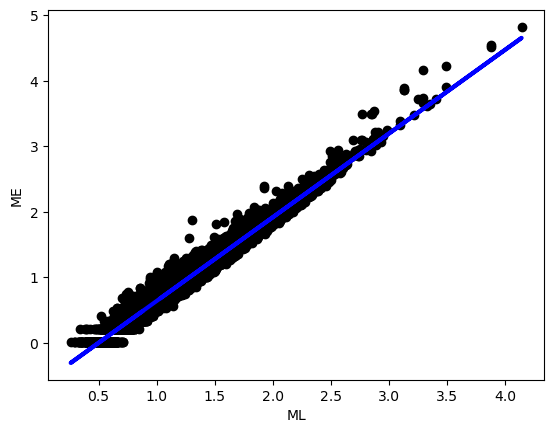

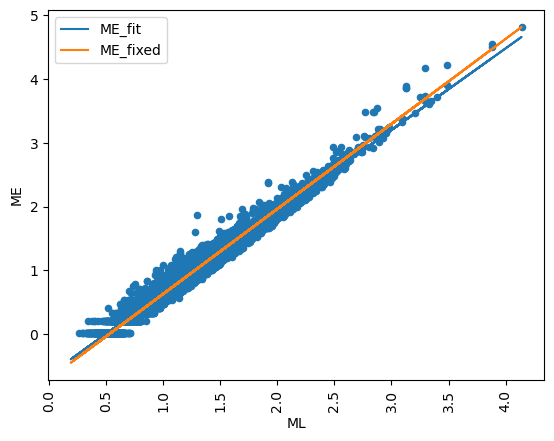

 

 Got 5166 events
emag = 0.63 ME + 0.213
alt: ME = 1.59 emag - 0.338
R-squared value: 0.817
Mean squared error: 0.03
emag_fixed = 0.75 ME + 0.111
alt: ME = 1.33 emag_fixed - 0.148


/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_tools.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col1]=df[col1].astype(float)
/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_tools.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col2]=df[col2].astype(float)
/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_t

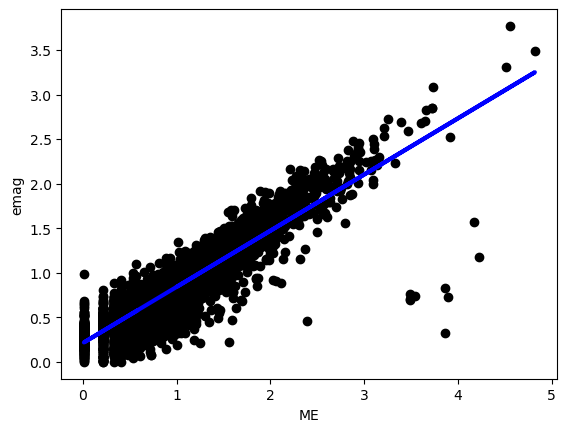

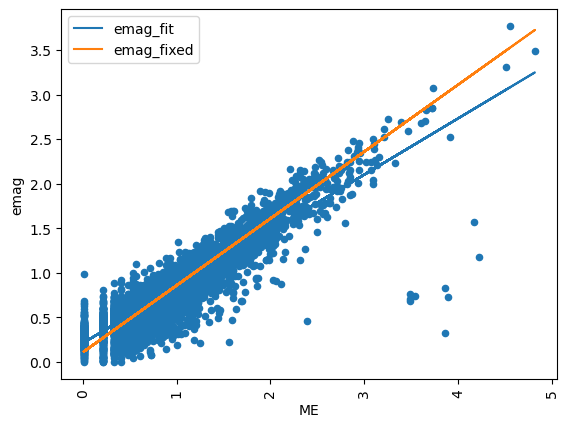

 

 Got 5166 events
ML = 0.758 ME + 0.52
alt: ME = 1.32 ML - 0.685
R-squared value: 0.969
Mean squared error: 0.01
ML_fixed = 0.75 ME + 0.527
alt: ME = 1.33 ML_fixed - 0.703


/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_tools.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col1]=df[col1].astype(float)
/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_tools.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col2]=df[col2].astype(float)
/mnt/RAIDZ/home3/thompsong/Dropbox/BRIEFCASE/MESS2024/skience2024_GTplus/02 Volcano Monitoring/lib/dataframe_t

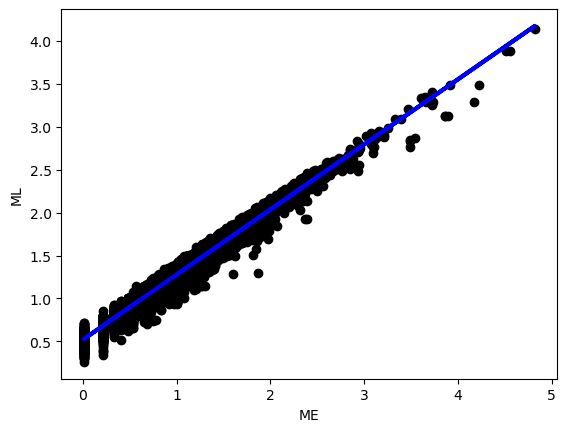

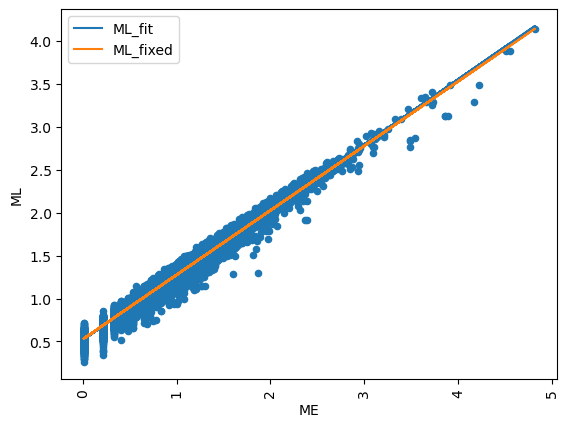

In [24]:
DFT.linearRegressMagnitudesBySubclass(mergedcat2, subclass_col='subclass_x', mag_columns=['emag', 'ML', 'ME'], \
                                      subclasses=['r', 'e', 'l', 'h', 't'], plot=True, print_stats=True, mfixed=[1, 1, 4/3, 4/3])

# 5. Load Machine Learning catalog

I don't think the amplitude or energy values here have been gain or response corrected, so this is a bit pointless as far as a poster tomorrow is concerned, unless i just want to plot relative sizes and rates by subclass

In [8]:
MLcsvfile = '/home/thompsong/Developer/kitchensinkGT/PROJECTS/MVOcatalog/to_dataframes/mvo_catalog_stats.csv'
MLcat0 = pd.read_csv(MLcsvfile)

filetime     starttime      Fs  calib  quality  \
0       1996-10-23T16:08:00.040000Z  8.460869e+08   75.19    1.0    5.315   
1       1996-10-23T20:07:11.040000Z  8.461012e+08   75.19    1.0    5.455   
2       1996-10-23T22:35:49.040000Z  8.461101e+08   75.19    1.0    5.490   
3       1996-10-23T23:42:17.040000Z  8.461141e+08   75.19    1.0    5.265   
4       1996-10-23T23:51:04.040000Z  8.461147e+08   75.19    1.0    5.050   
...                             ...           ...     ...    ...      ...   
388939  2008-05-31T16:28:29.000000Z           NaN  100.00    1.0    4.675   
388940  2008-05-31T16:33:30.000000Z           NaN  100.00    1.0    4.335   
388941  2008-05-31T19:19:38.000000Z           NaN  100.00    1.0    4.220   
388942  2008-05-31T20:11:10.000000Z           NaN  100.00    1.0    4.845   
388943  2008-05-31T23:08:48.000000Z           NaN  100.00    1.0    4.690   

        medianF  peakF       peakA  bw_min  bw_max  ...  coincidence_sum  \
0          7.10    3.9  149.605484    2.45    5.55  ...             10.0   
1          6.10    3.5  359.932970    1.70    4.80  ...             21.0   
2          5.10    2.8  476.035233    1.55    4.30  ...             21.0   
3          6.85    3.9  111.133307    2.40    5.85  ...              NaN   
4          8.15    4.5   73.613827    3.00    6.85  ...              NaN   
...         ...    ...         ...     ...     ...  ...              ...   
388939     7.05    1.0   21.858714    0.40    1.70  ...             12.0   
388940    11.65    6.2  190.174210    3.20   11.90  ...             28.0   
388941    10.55    5.1   50.583352    2.10    8.60  ...             30.0   
388942     8.35    1.2   31.671233    0.45    2.10  ...             23.0   
388943     8.10    1.0   21.779249    0.30    1.80  ...             16.0   

        cft_peak_wmean  cft_std_wmean  detection_quality                sfile  \
0             4.776782       0.844988          40.363227  23-1608-00L.S199610   
1             5.384188       0.951508         107.585042  23-2007-11L.S199610   
2             5.680525       0.985044         117.506903  23-2235-49L.S199610   
3                  NaN            NaN                NaN  23-2342-17L.S199610   
4                  NaN            NaN                NaN  23-2351-04L.S199610   
...                ...            ...                ...                  ...   
388939        5.052195       1.032708          62.609323  31-1628-29L.S200805   
388940        9.100202       2.424018         617.653395  31-1633-30L.S200805   
388941        8.346497       2.111158         528.623281  31-1919-38L.S200805   
388942        6.821127       1.507180         236.455356  31-2011-10L.S200805   
388943        7.070062       1.726620         195.317012  31-2308-48L.S200805   

        mainclass  subclass  MLamp   MLA       ME  
0              LV         r   7.79  6.59  5004.72  
1              LV         r   8.22  6.97  5005.31  
2              LV         e   8.31  7.09  5005.44  
3              LV         r   7.57  6.46  5004.52  
4              LV         r   7.34  6.28  5004.17  
...           ...       ...    ...   ...      ...  
388939         LV         t   6.73  5.75  5003.44  
388940         LV         t   9.02  6.69  5005.79  
388941         LV         t   8.37  6.12  5004.92  
388942         LV         t   7.04  5.91  5003.76  
388943         LV         t   6.86  5.75  5003.53  

[388944 rows x 51 columns]

# events = 388944


columns = Index(['filetime', 'starttime', 'Fs', 'calib', 'quality', 'medianF', 'peakF',
       'peakA', 'bw_min', 'bw_max', 'snr', 'signal_level', 'noise_level',
       'peakamp', 'peaktime', 'energy', 'sample_min', 'sample_max',
       'sample_mean', 'sample_median', 'sample_lower_quartile',
       'sample_upper_quartile', 'sample_rms', 'sample_stdev',
       'percent_availability', 'num_gaps', 'skewness', 'kurtosis',
       'bandratio_[1.0_6.0_11.0]', 'bandratio_[0.8_4.0_16.0]', 'path',
       'num_traces', 'year', 'month', 'day', 'hour', 'minute', 'second',
       'ontime', 'offtime', 'trigger_duration', 'coincidence_sum',
       'cft_peak_wmean', 'cft_std_wmean', 'detection_quality', 'sfile',
       'mainclass', 'subclass', 'MLamp', 'MLA', 'ME'],
      dtype='object')
# events = 388944

 Got 388944 events
MLA = 0.967 MLamp - 0.929
alt: MLamp = 1.03 MLA + 0.961
R-squared value: 0.928
Mean squared error: 0.01


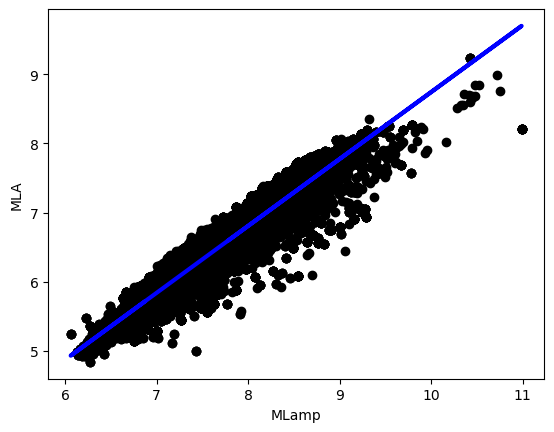


 Got 388944 events
ME = 1.36 MLamp + 4990.0
alt: MLamp = 0.737 ME - 3680.0
R-squared value: 0.971
Mean squared error: 0.01


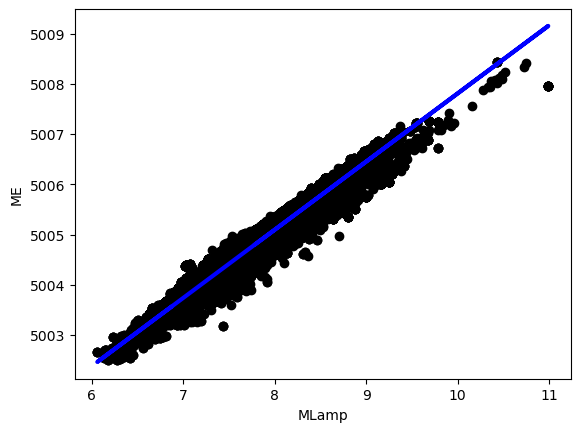


 Got 388944 events
MLamp = 0.96 MLA + 1.43
alt: MLA = 1.04 MLamp - 1.5
R-squared value: 0.928
Mean squared error: 0.01


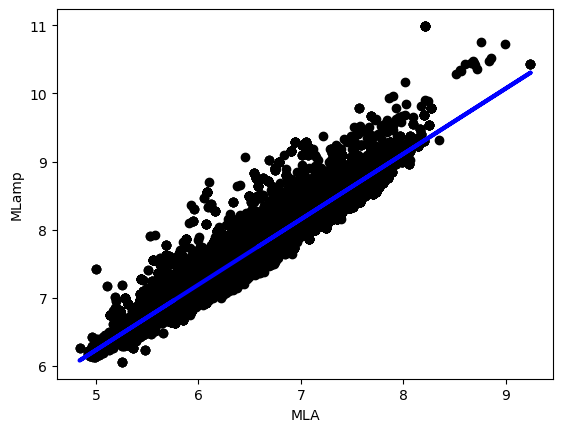


 Got 388944 events
ME = 1.34 MLA + 5000.0
alt: MLA = 0.748 ME - 3740.0
R-squared value: 0.948
Mean squared error: 0.02


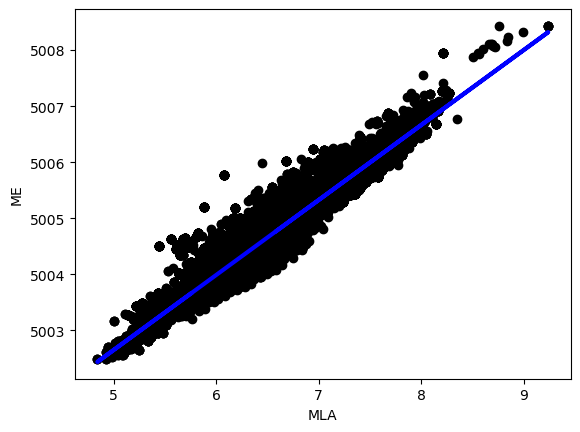


 Got 388944 events
MLamp = 0.715 ME - 3570.0
alt: ME = 1.4 MLamp + 4990.0
R-squared value: 0.971
Mean squared error: 0.01


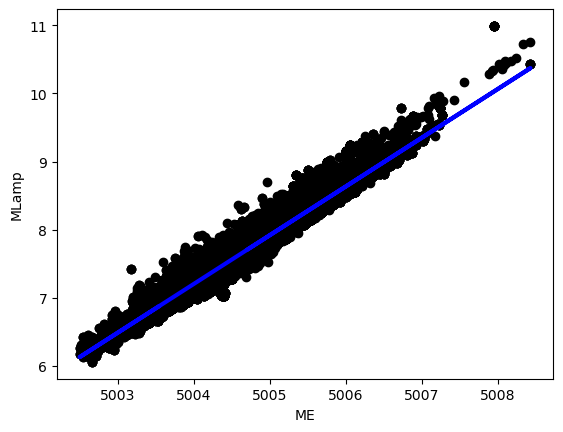


 Got 388944 events
MLA = 0.71 ME - 3540.0
alt: ME = 1.41 MLA + 5000.0
R-squared value: 0.948
Mean squared error: 0.01


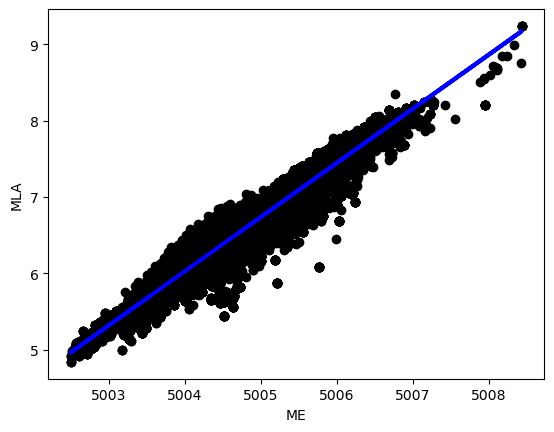

# events of r = 240141
 

 Got 240141 events
MLA = 0.993 MLamp - 1.12
alt: MLamp = 1.01 MLA + 1.13
R-squared value: 0.939
Mean squared error: 0.01


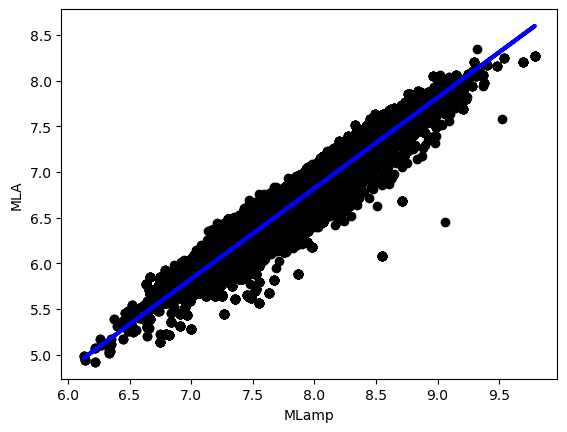

 

 Got 240141 events
ME = 1.35 MLamp + 4990.0
alt: MLamp = 0.741 ME - 3700.0
R-squared value: 0.979
Mean squared error: 0.01


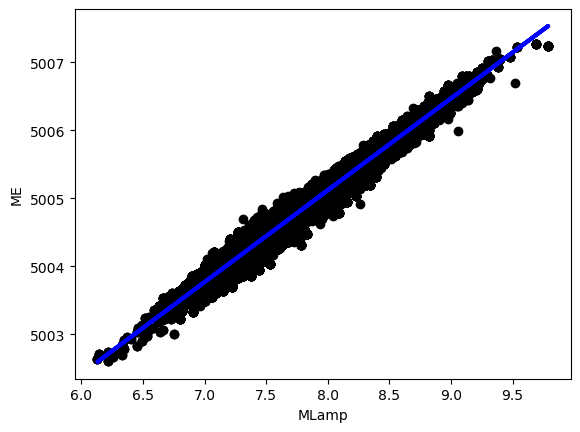

 

 Got 240141 events
MLamp = 0.945 MLA + 1.53
alt: MLA = 1.06 MLamp - 1.62
R-squared value: 0.939
Mean squared error: 0.01


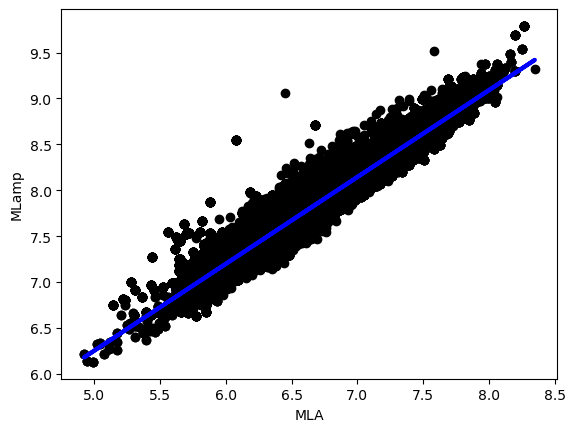

 

 Got 240141 events
ME = 1.3 MLA + 5000.0
alt: MLA = 0.769 ME - 3840.0
R-squared value: 0.956
Mean squared error: 0.02


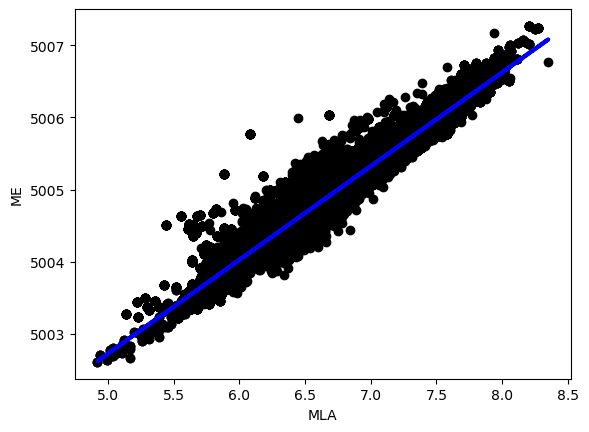

 

 Got 240141 events
MLamp = 0.726 ME - 3620.0
alt: ME = 1.38 MLamp + 4990.0
R-squared value: 0.979
Mean squared error: 0.00


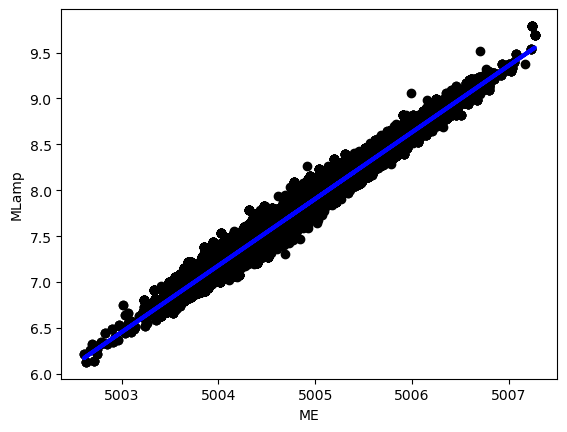

 

 Got 240141 events
MLA = 0.735 ME - 3670.0
alt: ME = 1.36 MLA + 5000.0
R-squared value: 0.956
Mean squared error: 0.01


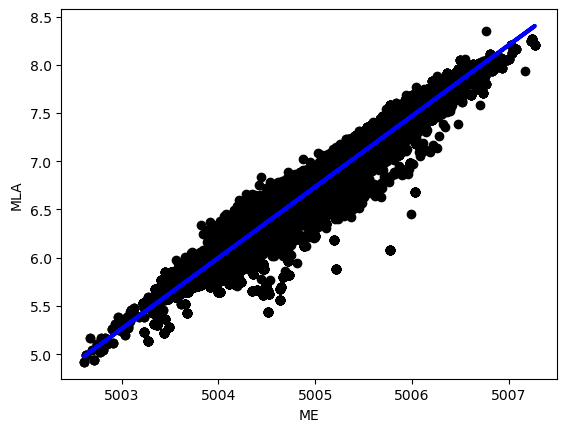

# events of e = 37908
 

 Got 37908 events
MLA = 0.933 MLamp - 0.71
alt: MLamp = 1.07 MLA + 0.761
R-squared value: 0.94
Mean squared error: 0.01


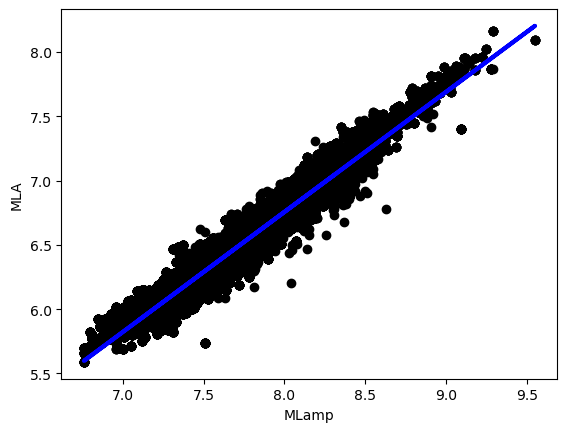

 

 Got 37908 events
ME = 1.38 MLamp + 4990.0
alt: MLamp = 0.726 ME - 3630.0
R-squared value: 0.974
Mean squared error: 0.01


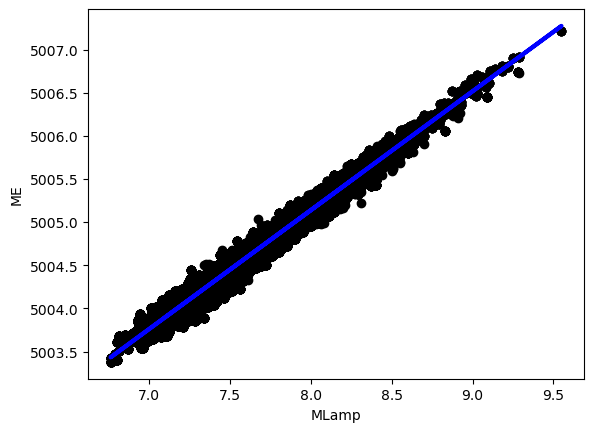

 

 Got 37908 events
MLamp = 1.01 MLA + 1.17
alt: MLA = 0.993 MLamp - 1.17
R-squared value: 0.94
Mean squared error: 0.01


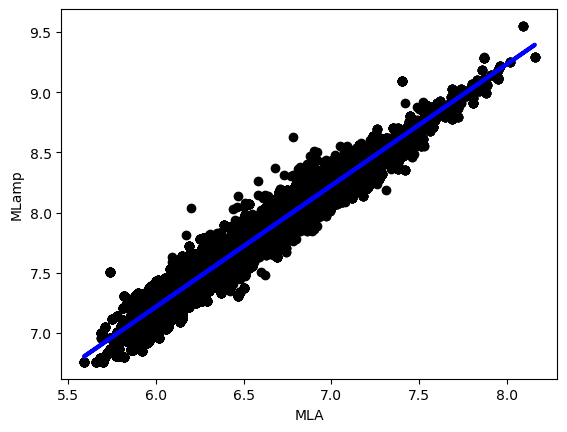

 

 Got 37908 events
ME = 1.41 MLA + 5000.0
alt: MLA = 0.711 ME - 3550.0
R-squared value: 0.942
Mean squared error: 0.02


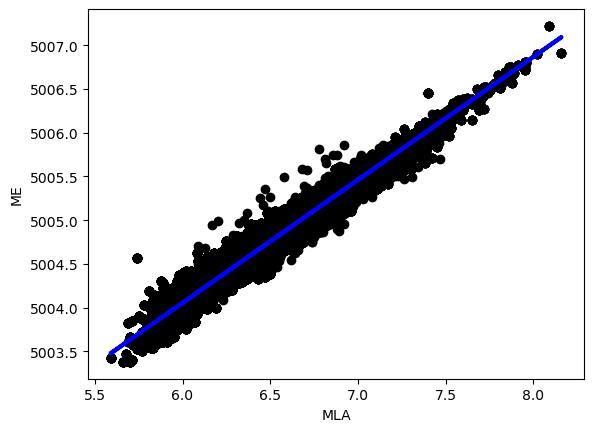

 

 Got 37908 events
MLamp = 0.708 ME - 3530.0
alt: ME = 1.41 MLamp + 4990.0
R-squared value: 0.974
Mean squared error: 0.00


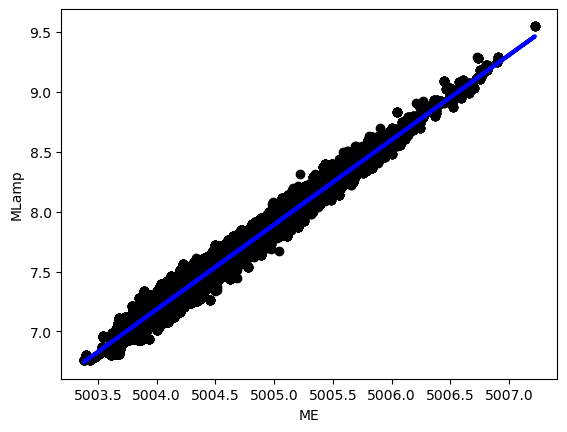

 

 Got 37908 events
MLA = 0.67 ME - 3350.0
alt: ME = 1.49 MLA + 5000.0
R-squared value: 0.942
Mean squared error: 0.01


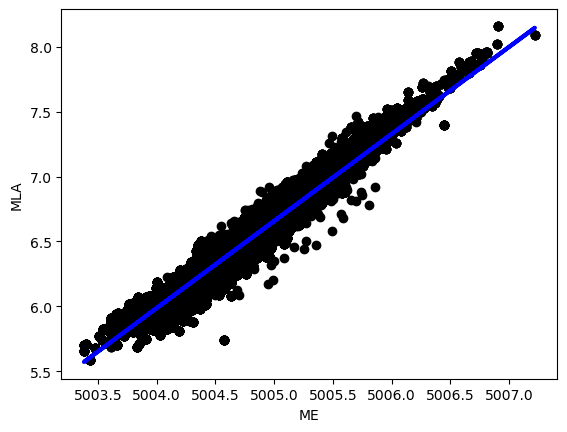

# events of l = 79930
 

 Got 79930 events
MLA = 0.889 MLamp - 0.36
alt: MLamp = 1.13 MLA + 0.405
R-squared value: 0.92
Mean squared error: 0.01


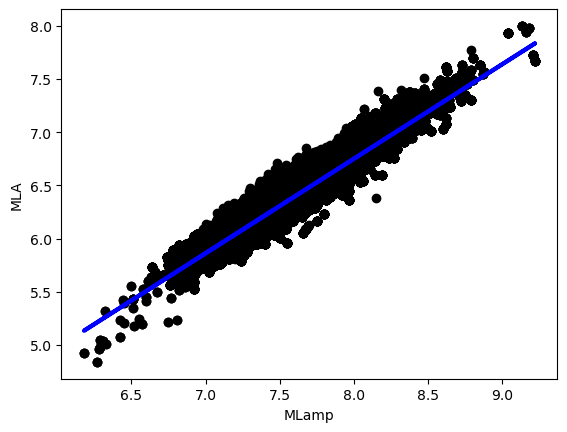

 

 Got 79930 events
ME = 1.29 MLamp + 4990.0
alt: MLamp = 0.774 ME - 3870.0
R-squared value: 0.969
Mean squared error: 0.01


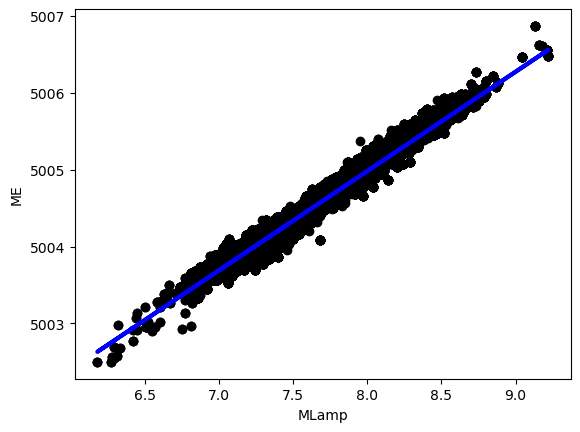

 

 Got 79930 events
MLamp = 1.03 MLA + 0.964
alt: MLA = 0.966 MLamp - 0.932
R-squared value: 0.92
Mean squared error: 0.01


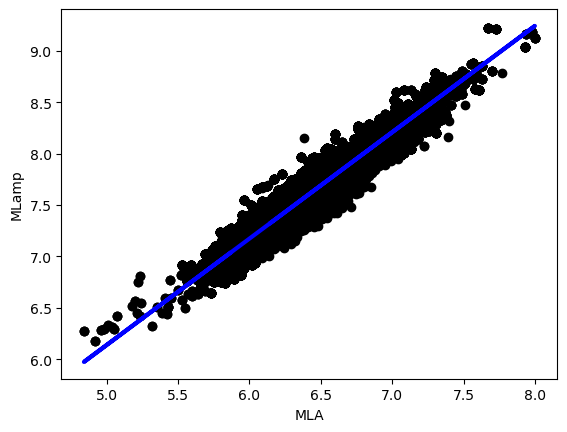

 

 Got 79930 events
ME = 1.39 MLA + 5000.0
alt: MLA = 0.721 ME - 3600.0
R-squared value: 0.96
Mean squared error: 0.01


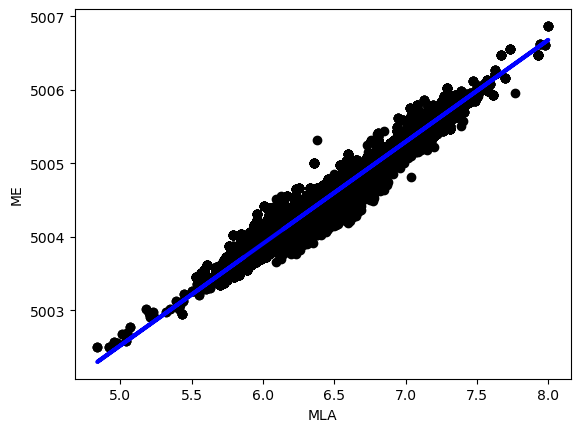

 

 Got 79930 events
MLamp = 0.75 ME - 3750.0
alt: ME = 1.33 MLamp + 4990.0
R-squared value: 0.969
Mean squared error: 0.00


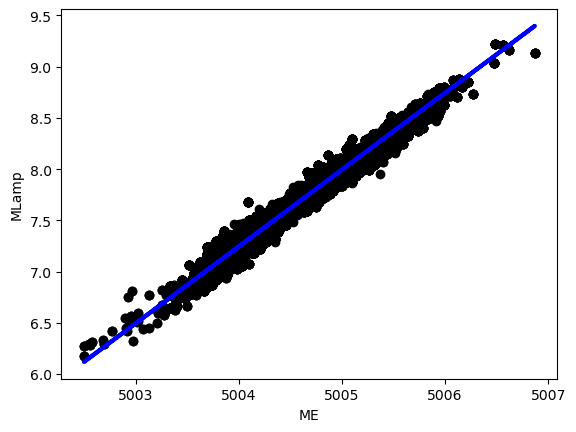

 

 Got 79930 events
MLA = 0.692 ME - 3460.0
alt: ME = 1.44 MLA + 5000.0
R-squared value: 0.96
Mean squared error: 0.00


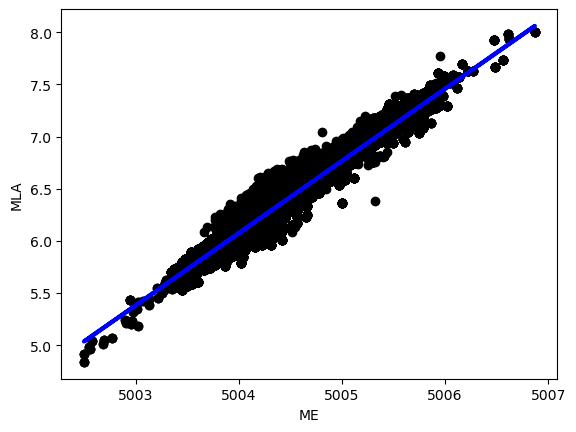

# events of h = 13786
 

 Got 13786 events
MLA = 0.864 MLamp - 0.149
alt: MLamp = 1.16 MLA + 0.172
R-squared value: 0.888
Mean squared error: 0.02


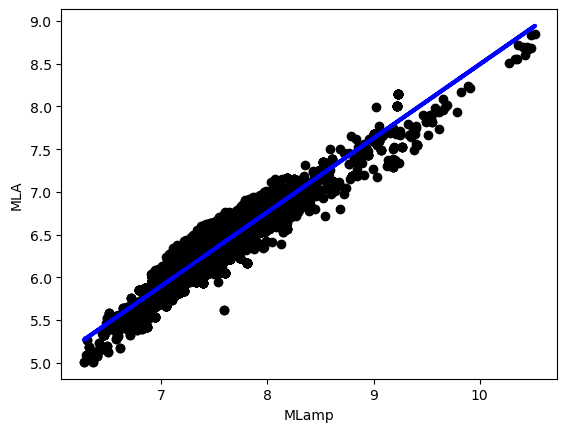

 

 Got 13786 events
ME = 1.24 MLamp + 5000.0
alt: MLamp = 0.805 ME - 4020.0
R-squared value: 0.97
Mean squared error: 0.01


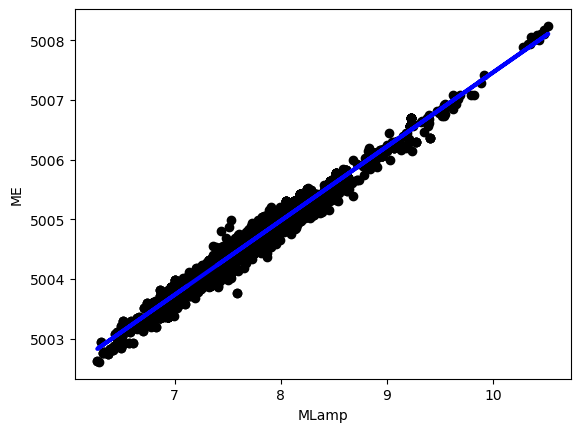

 

 Got 13786 events
MLamp = 1.03 MLA + 0.991
alt: MLA = 0.973 MLamp - 0.964
R-squared value: 0.888
Mean squared error: 0.02


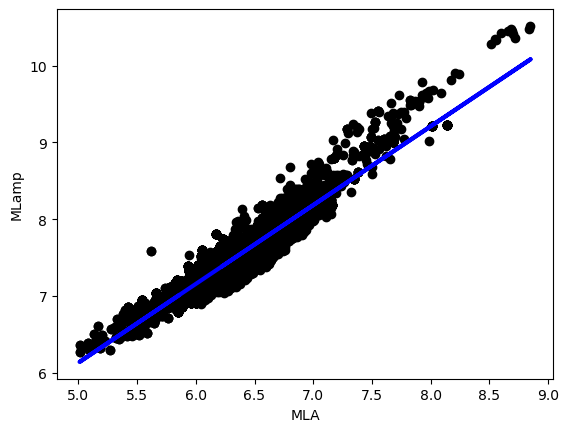

 

 Got 13786 events
ME = 1.33 MLA + 5000.0
alt: MLA = 0.752 ME - 3760.0
R-squared value: 0.934
Mean squared error: 0.02


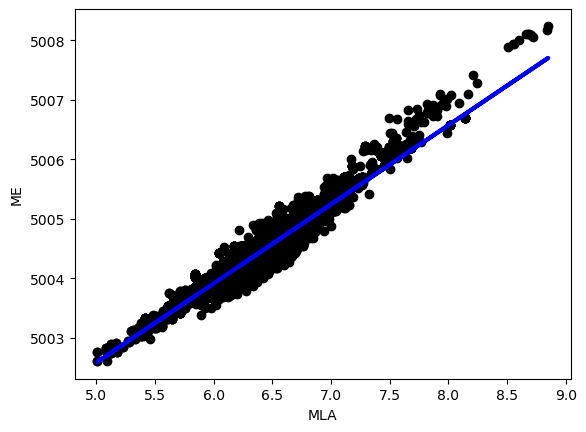

 

 Got 13786 events
MLamp = 0.781 ME - 3900.0
alt: ME = 1.28 MLamp + 4990.0
R-squared value: 0.97
Mean squared error: 0.01


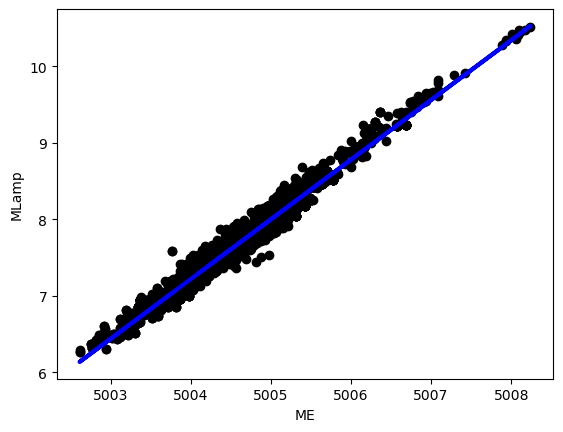

 

 Got 13786 events
MLA = 0.703 ME - 3510.0
alt: ME = 1.42 MLA + 5000.0
R-squared value: 0.934
Mean squared error: 0.01


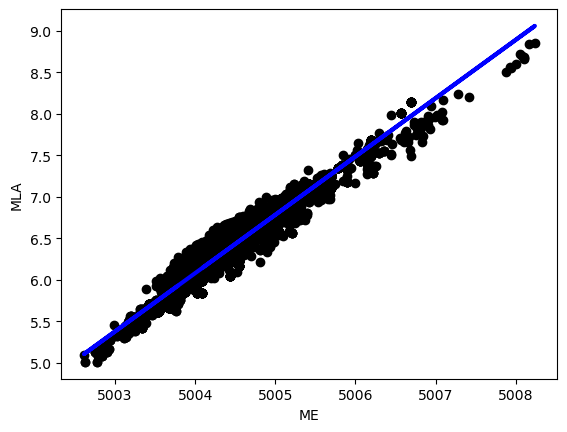

# events of t = 5123
 

 Got 5123 events
MLA = 0.691 MLamp + 0.974
alt: MLamp = 1.45 MLA - 1.41
R-squared value: 0.818
Mean squared error: 0.04


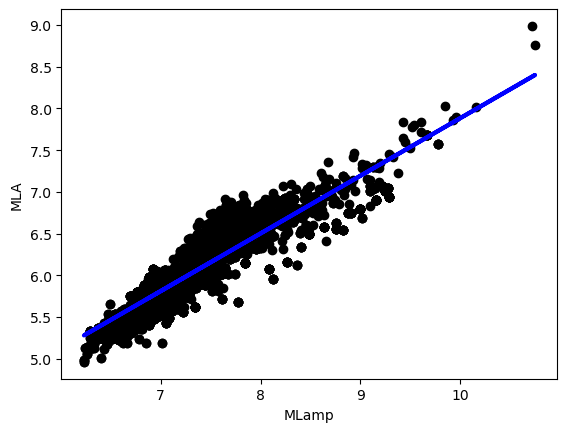

 

 Got 5123 events
ME = 1.13 MLamp + 5000.0
alt: MLamp = 0.883 ME - 4410.0
R-squared value: 0.964
Mean squared error: 0.02


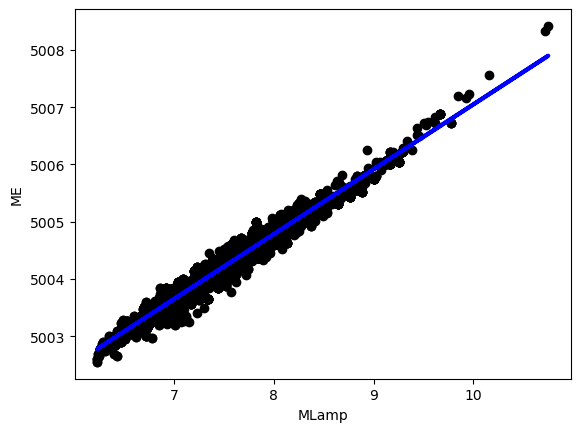

 

 Got 5123 events
MLamp = 1.18 MLA + 0.189
alt: MLA = 0.845 MLamp - 0.16
R-squared value: 0.818
Mean squared error: 0.06


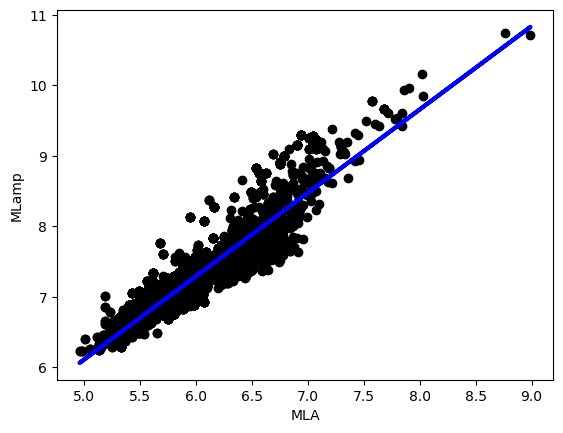

 

 Got 5123 events
ME = 1.42 MLA + 5000.0
alt: MLA = 0.703 ME - 3510.0
R-squared value: 0.886
Mean squared error: 0.05


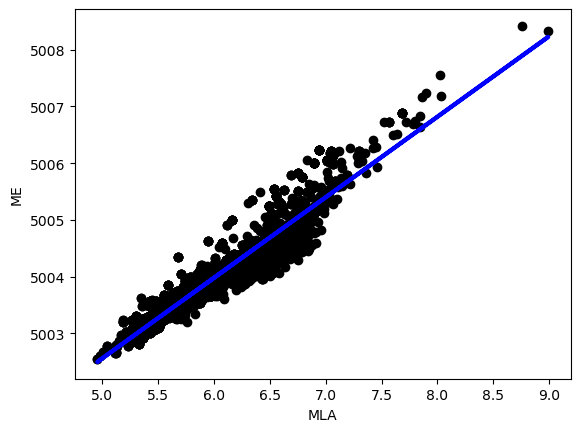

 

 Got 5123 events
MLamp = 0.851 ME - 4250.0
alt: ME = 1.18 MLamp + 5000.0
R-squared value: 0.964
Mean squared error: 0.01


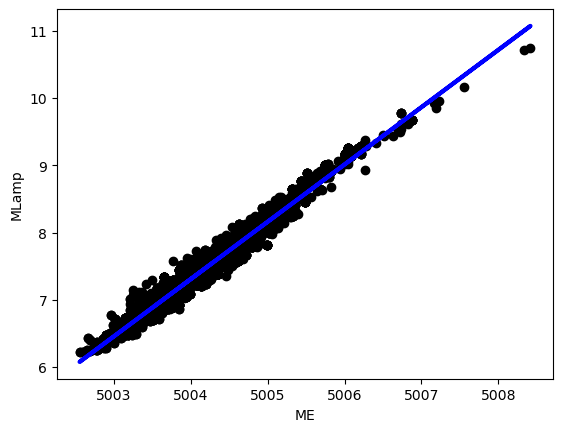

 

 Got 5123 events
MLA = 0.623 ME - 3110.0
alt: ME = 1.6 MLA + 4990.0
R-squared value: 0.886
Mean squared error: 0.02


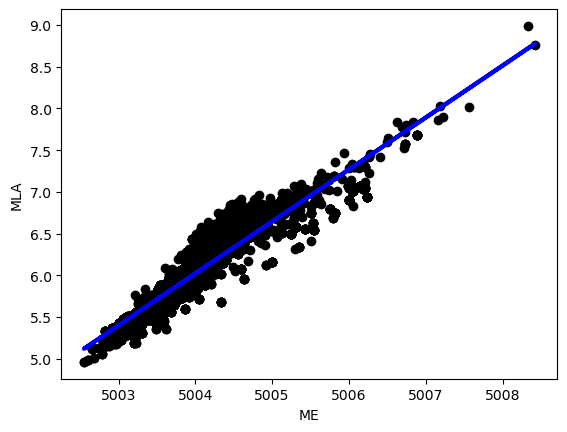

In [9]:
MLcat = MLcat0.copy()

# Compute local magnitude
#MLcat['logamp'] = np.log10(MLcat['peakamp'])
#MLcat['logA'] = np.log10(MLcat['peakA'])
R = 5000 # approx distance of MBWH from "dome" source
MLcat['MLamp'] = DFT.local_magnitude(MLcat['peakamp'], R)
MLcat['MLA'] = DFT.local_magnitude(MLcat['peakA'], R)
#MLcat['logE'] = np.log10(MLcat['energy'])
MLcat['ME'] = DFT.energy_magnitude(MLcat['energy'], R)

'''
# remove rows with NULL values
mergedcat['emag'] = mergedcat['emag'].replace(-99.9, np.nan)
mergedcat['mag'] = mergedcat['mag'].replace(-2.0, np.nan)
'''


DFT.summarize_catdf(MLcat)

DFT.linearRegressMagnitudesBySubclass(MLcat, subclass_col='subclass', mag_columns=['MLamp', 'MLA', 'ME'], \
                                      subclasses=['r', 'e', 'l', 'h', 't'], plot=True, print_stats=True)

filetime     starttime      Fs  calib  quality  \
0       1996-10-23T16:08:00.040000Z  8.460869e+08   75.19    1.0    5.315   
1       1996-10-23T20:07:11.040000Z  8.461012e+08   75.19    1.0    5.455   
2       1996-10-23T22:35:49.040000Z  8.461101e+08   75.19    1.0    5.490   
3       1996-10-23T23:42:17.040000Z  8.461141e+08   75.19    1.0    5.265   
4       1996-10-23T23:51:04.040000Z  8.461147e+08   75.19    1.0    5.050   
...                             ...           ...     ...    ...      ...   
388939  2008-05-31T16:28:29.000000Z           NaN  100.00    1.0    4.675   
388940  2008-05-31T16:33:30.000000Z           NaN  100.00    1.0    4.335   
388941  2008-05-31T19:19:38.000000Z           NaN  100.00    1.0    4.220   
388942  2008-05-31T20:11:10.000000Z           NaN  100.00    1.0    4.845   
388943  2008-05-31T23:08:48.000000Z           NaN  100.00    1.0    4.690   

        medianF  peakF       peakA  bw_min  bw_max  ...  detection_quality  \
0          7.10    3.9  149.605484    2.45    5.55  ...          40.363227   
1          6.10    3.5  359.932970    1.70    4.80  ...         107.585042   
2          5.10    2.8  476.035233    1.55    4.30  ...         117.506903   
3          6.85    3.9  111.133307    2.40    5.85  ...                NaN   
4          8.15    4.5   73.613827    3.00    6.85  ...                NaN   
...         ...    ...         ...     ...     ...  ...                ...   
388939     7.05    1.0   21.858714    0.40    1.70  ...          62.609323   
388940    11.65    6.2  190.174210    3.20   11.90  ...         617.653395   
388941    10.55    5.1   50.583352    2.10    8.60  ...         528.623281   
388942     8.35    1.2   31.671233    0.45    2.10  ...         236.455356   
388943     8.10    1.0   21.779249    0.30    1.80  ...         195.317012   

                      sfile  mainclass  subclass    logamp      logA  \
0       23-1608-00L.S199610         LV         r  3.376007  2.174948   
1       23-2007-11L.S199610         LV         r  3.809069  2.556222   
2       23-2235-49L.S199610         LV         e  3.892717  2.677639   
3       23-2342-17L.S199610         LV         r  3.160434  2.045844   
4       23-2351-04L.S199610         LV         r  2.925450  1.866959   
...                     ...        ...       ...       ...       ...   
388939  31-1628-29L.S200805         LV         t  2.319405  1.339625   
388940  31-1633-30L.S200805         LV         t  4.601368  2.279152   
388941  31-1919-38L.S200805         LV         t  3.953676  1.704008   
388942  31-2011-10L.S200805         LV         t  2.630922  1.500665   
388943  31-2308-48L.S200805         LV         t  2.450603  1.338043   

           MLamp       MLA      logE   ME  
0       7.790027  6.588968  7.072636  3.3  
1       8.223089  6.970242  7.965530  3.9  
2       8.306737  7.091659  8.166425  4.0  
3       7.574454  6.459864  6.786309  3.1  
4       7.339470  6.280979  6.251646  2.8  
...          ...       ...       ...  ...  
388939  6.733425  5.753645  5.163489  2.0  
388940  9.015388  6.693172  8.691769  4.4  
388941  8.367696  6.118028  7.376879  3.5  
388942  7.044942  5.914685  5.638662  2.4  
388943  6.864623  5.752063  5.299002  2.1  

[388944 rows x 54 columns]

# events = 388944


columns = Index(['filetime', 'starttime', 'Fs', 'calib', 'quality', 'medianF', 'peakF',
       'peakA', 'bw_min', 'bw_max', 'snr', 'signal_level', 'noise_level',
       'peakamp', 'peaktime', 'energy', 'sample_min', 'sample_max',
       'sample_mean', 'sample_median', 'sample_lower_quartile',
       'sample_upper_quartile', 'sample_rms', 'sample_stdev',
       'percent_availability', 'num_gaps', 'skewness', 'kurtosis',
       'bandratio_[1.0_6.0_11.0]', 'bandratio_[0.8_4.0_16.0]', 'path',
       'num_traces', 'year', 'month', 'day', 'hour', 'minute', 'second',
       'ontime', 'offtime', 'trigger_duration', 'coincidence_sum',
       'cft_peak_wmean', 'cft_std_wmean', 'detection_quality', 'sfile',
       'mainclass', 'subclass', 'logamp', 'logA', 'MLamp', 'MLA', 'logE',
       'ME'],
      dtype='object')
# events = 388944

 Got 388944 events
MLA = 0.967 MLamp - 0.929
alt: MLamp = 1.03 MLA + 0.961
R-squared value: 0.928
Mean squared error: 0.01


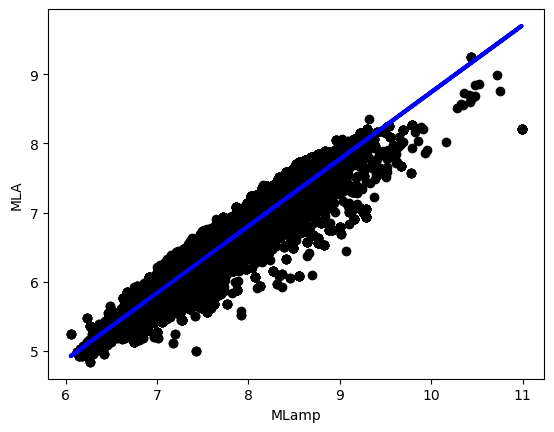


 Got 388944 events
ME = 1.36 MLamp - 7.16
alt: MLamp = 0.737 ME + 5.28
R-squared value: 0.969
Mean squared error: 0.01


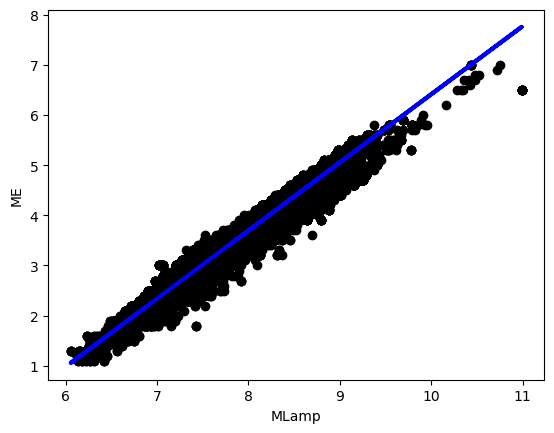


 Got 388944 events
logamp = 1.0 MLamp - 4.41
alt: MLamp = 1.0 logamp + 4.41
R-squared value: 1.0
Mean squared error: 0.00


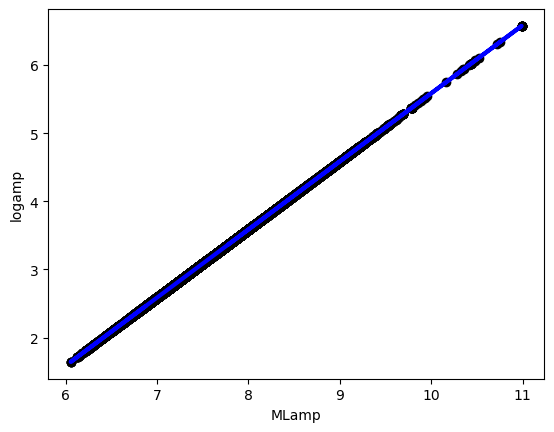


 Got 388944 events
logA = 0.967 MLamp - 5.34
alt: MLamp = 1.03 logA + 5.53
R-squared value: 0.928
Mean squared error: 0.01


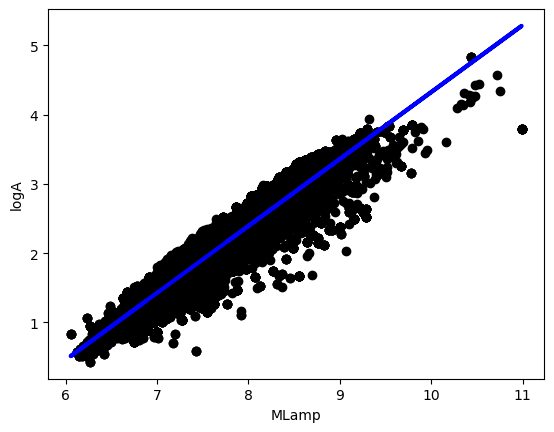


 Got 388944 events
logE = 2.04 MLamp - 8.64
alt: MLamp = 0.491 logE + 4.25
R-squared value: 0.971
Mean squared error: 0.02


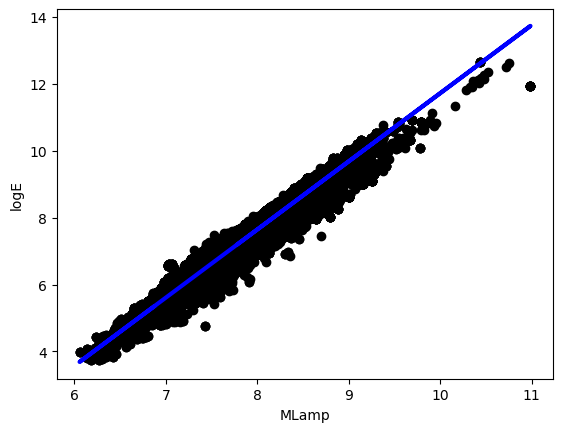


 Got 388944 events
MLamp = 0.96 MLA + 1.43
alt: MLA = 1.04 MLamp - 1.49
R-squared value: 0.928
Mean squared error: 0.01


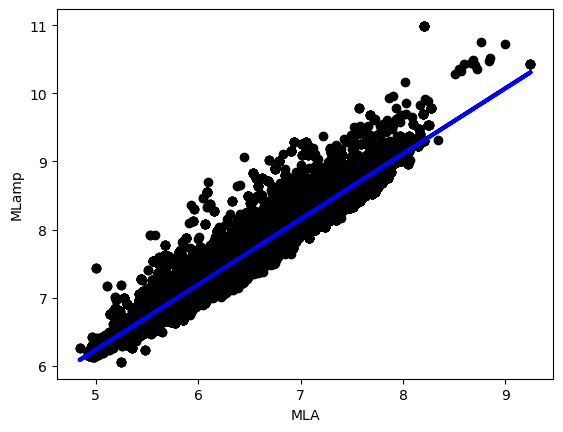


 Got 388944 events
ME = 1.34 MLA - 5.43
alt: MLA = 0.748 ME + 4.06
R-squared value: 0.946
Mean squared error: 0.02


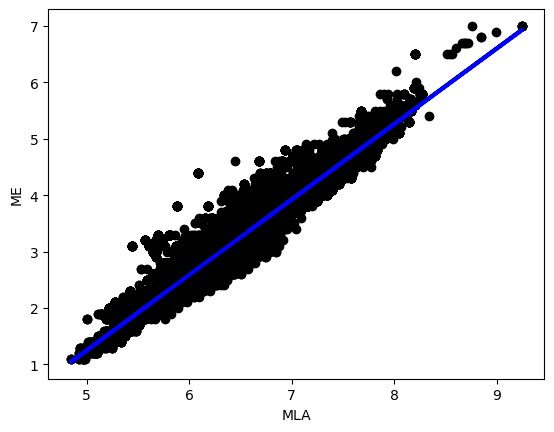


 Got 388944 events
logamp = 0.96 MLA - 2.98
alt: MLA = 1.04 logamp + 3.1
R-squared value: 0.928
Mean squared error: 0.01


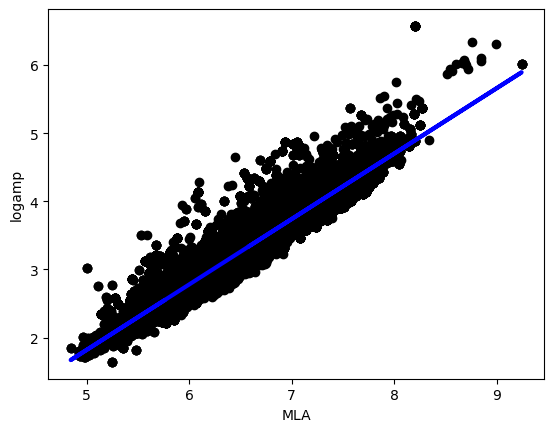


 Got 388944 events
logA = 1.0 MLA - 4.41
alt: MLA = 1.0 logA + 4.41
R-squared value: 1.0
Mean squared error: 0.00


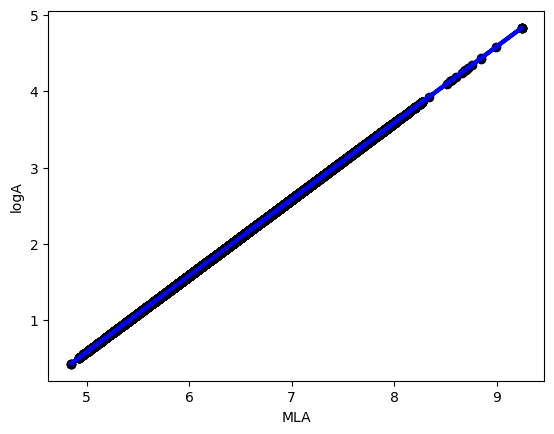


 Got 388944 events
logE = 2.0 MLA - 6.04
alt: MLA = 0.499 logE + 3.01
R-squared value: 0.948
Mean squared error: 0.04


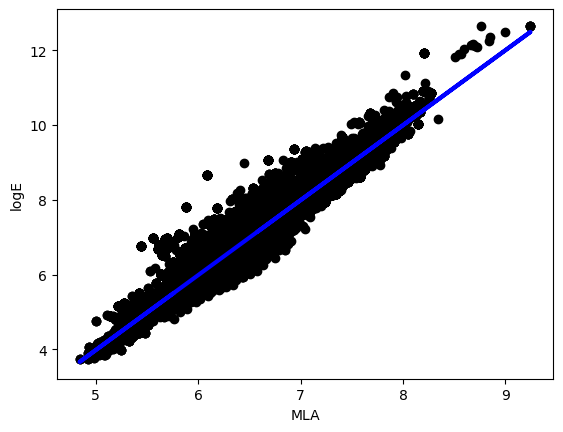


 Got 388944 events
MLamp = 0.714 ME + 5.35
alt: ME = 1.4 MLamp - 7.49
R-squared value: 0.969
Mean squared error: 0.01


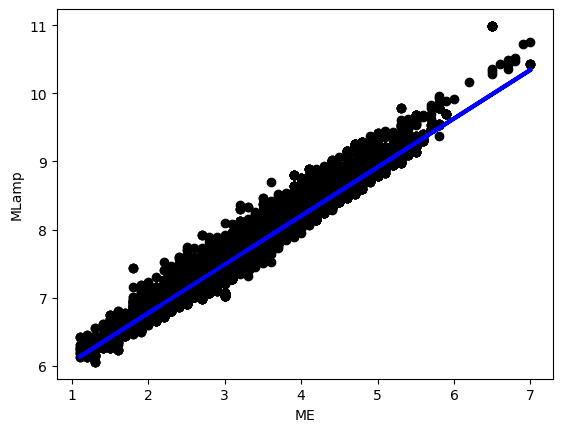


 Got 388944 events
MLA = 0.708 ME + 4.19
alt: ME = 1.41 MLA - 5.92
R-squared value: 0.946
Mean squared error: 0.01


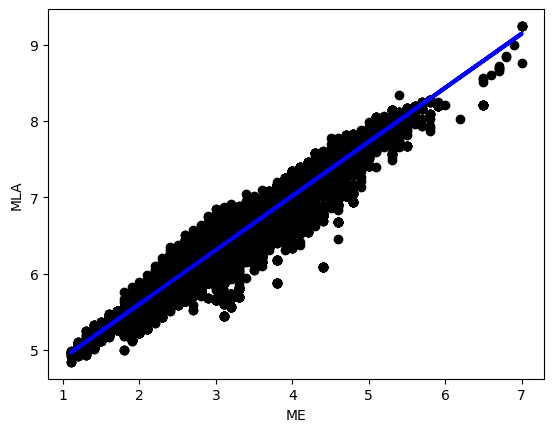


 Got 388944 events
logamp = 0.714 ME + 0.934
alt: ME = 1.4 logamp - 1.31
R-squared value: 0.969
Mean squared error: 0.01


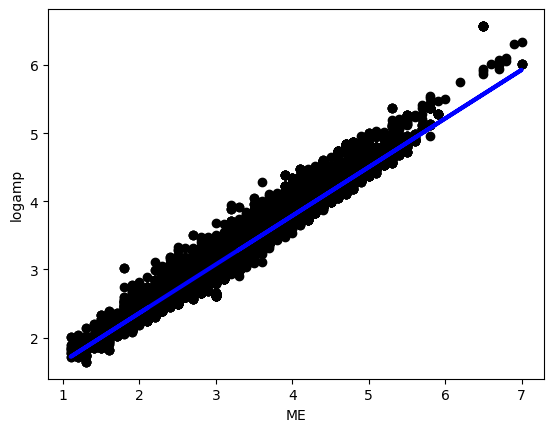


 Got 388944 events
logA = 0.708 ME - 0.227
alt: ME = 1.41 logA + 0.321
R-squared value: 0.946
Mean squared error: 0.01


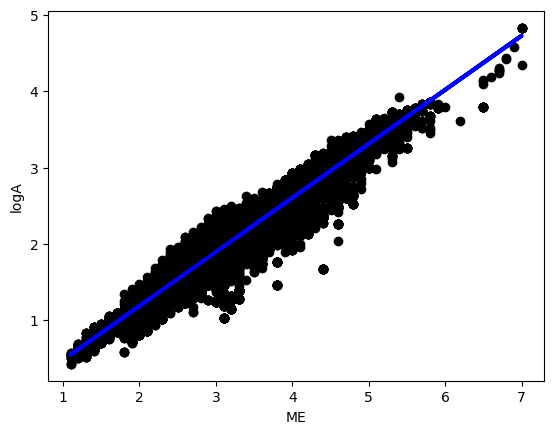


 Got 388944 events
logE = 1.5 ME + 2.11
alt: ME = 0.668 logE - 1.41
R-squared value: 0.998
Mean squared error: 0.00


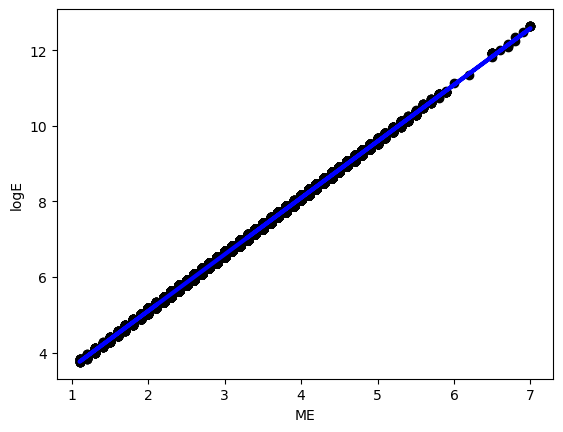


 Got 388944 events
MLamp = 1.0 logamp + 4.41
alt: logamp = 1.0 MLamp - 4.41
R-squared value: 1.0
Mean squared error: 0.00


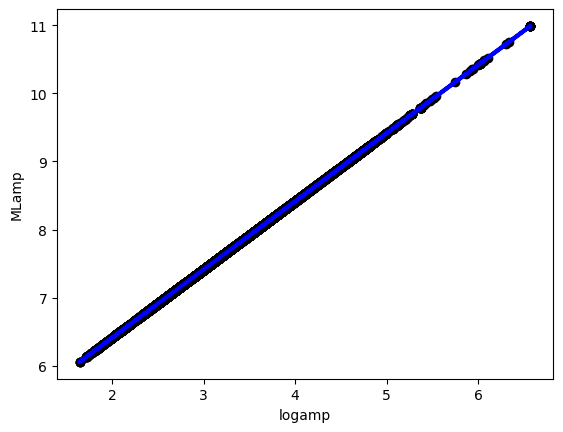


 Got 388944 events
MLA = 0.967 logamp + 3.34
alt: logamp = 1.03 MLA - 3.45
R-squared value: 0.928
Mean squared error: 0.01


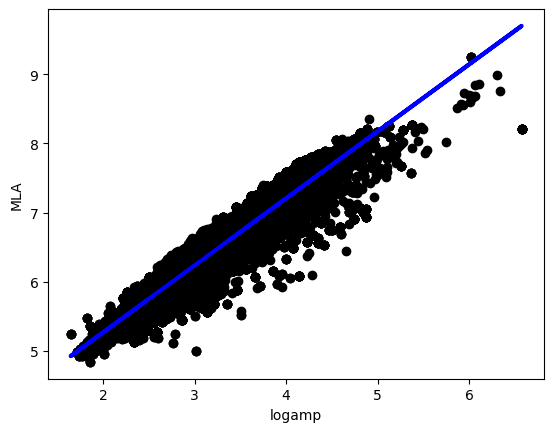


 Got 388944 events
ME = 1.36 logamp - 1.17
alt: logamp = 0.737 ME + 0.862
R-squared value: 0.969
Mean squared error: 0.01


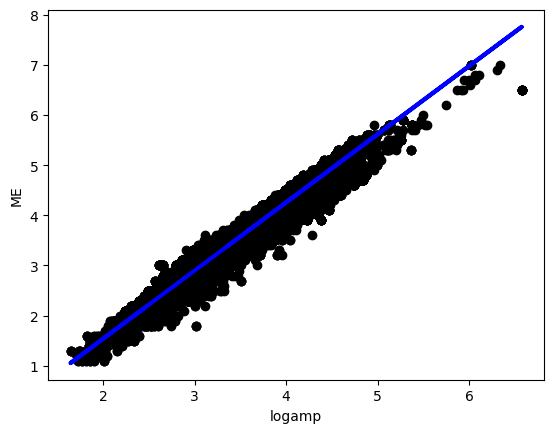


 Got 388944 events
logA = 0.967 logamp - 1.07
alt: logamp = 1.03 logA + 1.11
R-squared value: 0.928
Mean squared error: 0.01


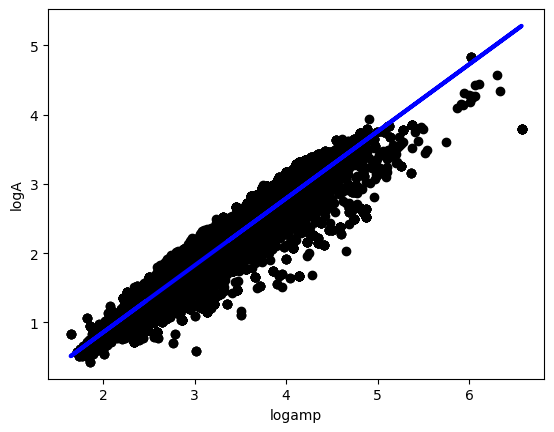


 Got 388944 events
logE = 2.04 logamp + 0.344
alt: logamp = 0.491 logE - 0.169
R-squared value: 0.971
Mean squared error: 0.02


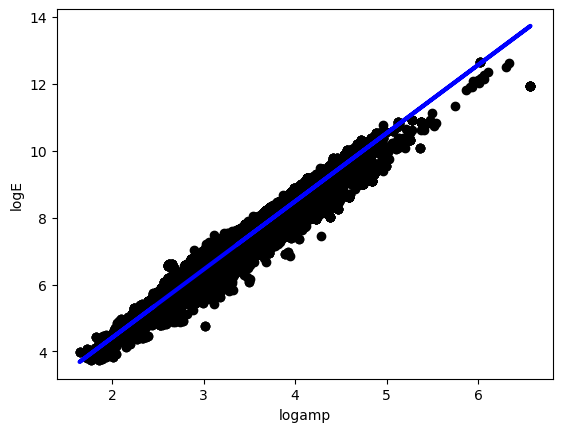


 Got 388944 events
MLamp = 0.96 logA + 5.67
alt: logA = 1.04 MLamp - 5.91
R-squared value: 0.928
Mean squared error: 0.01


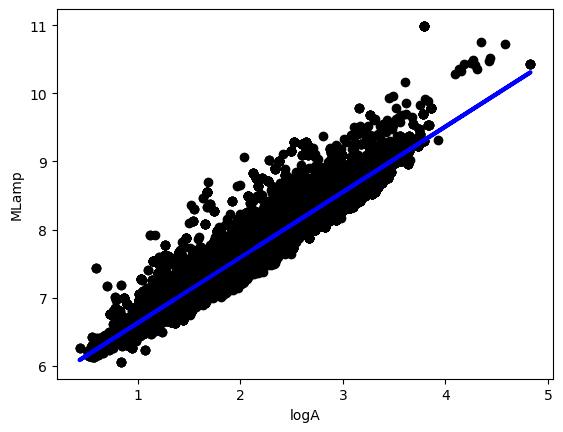


 Got 388944 events
MLA = 1.0 logA + 4.41
alt: logA = 1.0 MLA - 4.41
R-squared value: 1.0
Mean squared error: 0.00


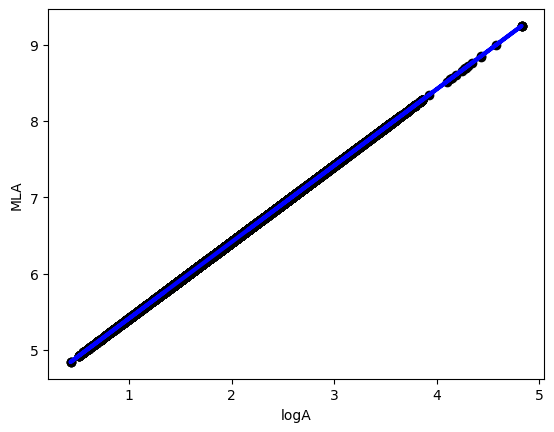


 Got 388944 events
ME = 1.34 logA + 0.47
alt: logA = 0.748 ME - 0.352
R-squared value: 0.946
Mean squared error: 0.02


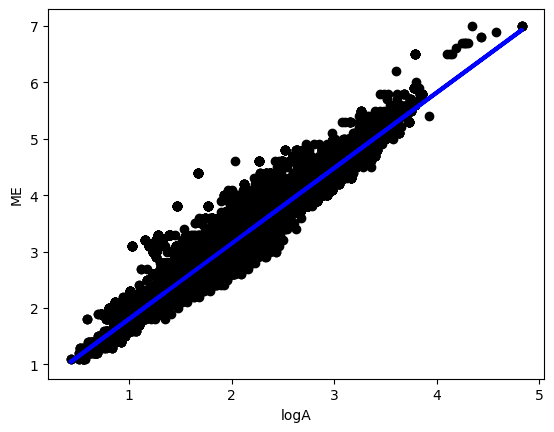


 Got 388944 events
logamp = 0.96 logA + 1.26
alt: logA = 1.04 logamp - 1.31
R-squared value: 0.928
Mean squared error: 0.01


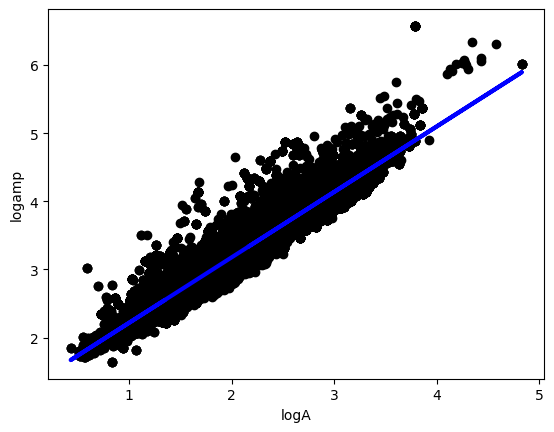


 Got 388944 events
logE = 2.0 logA + 2.81
alt: logA = 0.499 logE - 1.4
R-squared value: 0.948
Mean squared error: 0.04


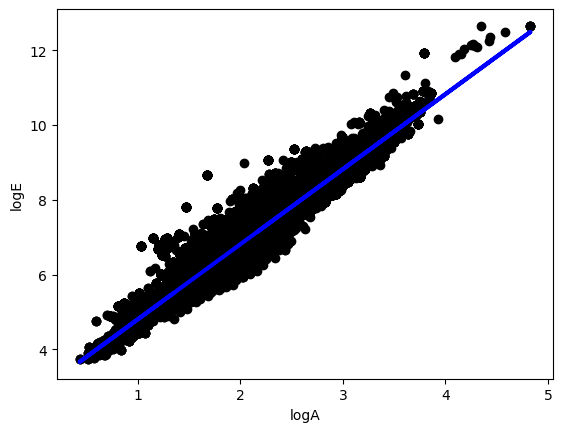


 Got 388944 events
MLamp = 0.477 logE + 4.34
alt: logE = 2.1 MLamp - 9.1
R-squared value: 0.971
Mean squared error: 0.01


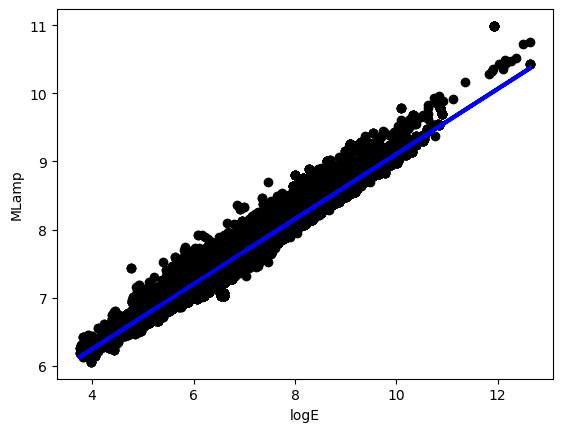


 Got 388944 events
MLA = 0.473 logE + 3.19
alt: logE = 2.11 MLA - 6.74
R-squared value: 0.948
Mean squared error: 0.01


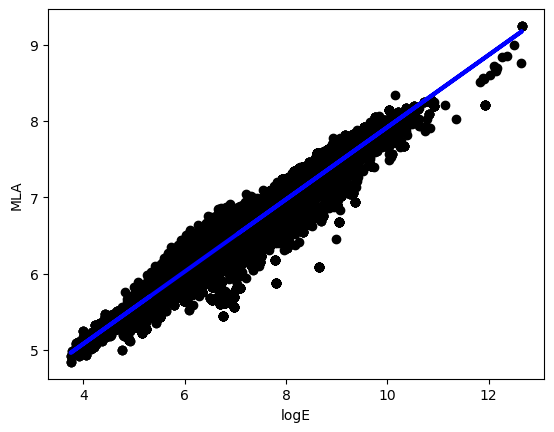


 Got 388944 events
ME = 0.667 logE - 1.4
alt: logE = 1.5 ME + 2.1
R-squared value: 0.998
Mean squared error: 0.00


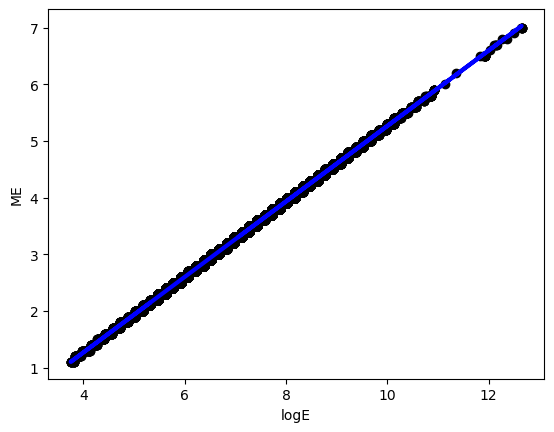


 Got 388944 events
logamp = 0.477 logE - 0.0727
alt: logE = 2.1 logamp + 0.152
R-squared value: 0.971
Mean squared error: 0.01


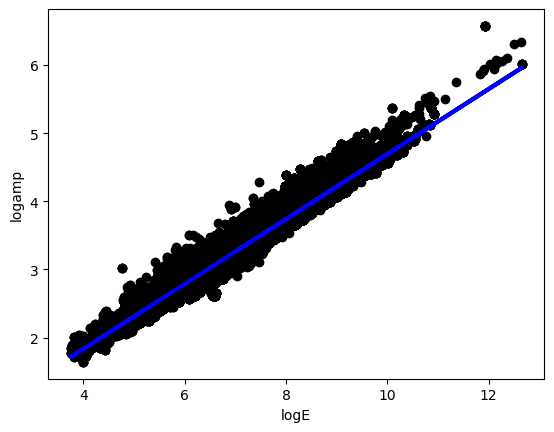


 Got 388944 events
logA = 0.473 logE - 1.23
alt: logE = 2.11 logA + 2.59
R-squared value: 0.948
Mean squared error: 0.01


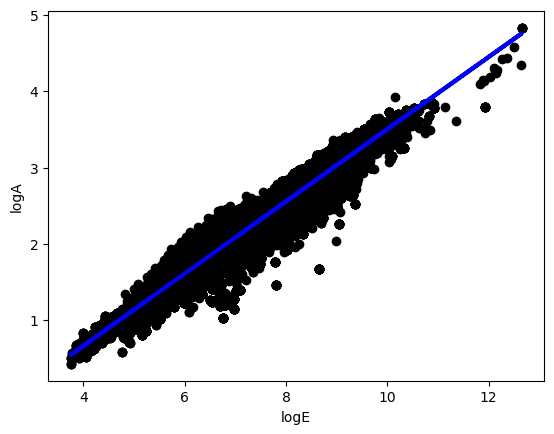

# events of r = 240141
 

 Got 240141 events
MLA = 0.993 MLamp - 1.13
alt: MLamp = 1.01 MLA + 1.13
R-squared value: 0.939
Mean squared error: 0.01


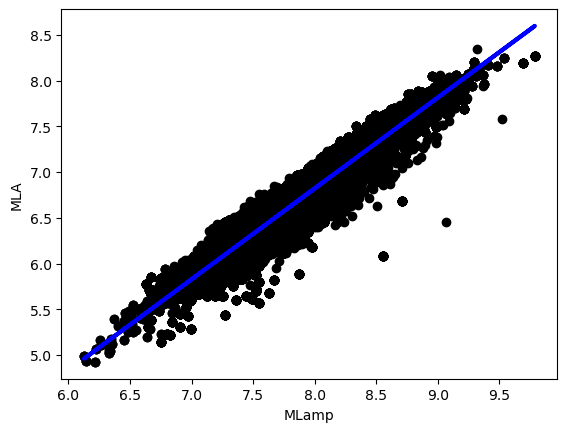

 

 Got 240141 events
ME = 1.35 MLamp - 7.08
alt: MLamp = 0.741 ME + 5.25
R-squared value: 0.977
Mean squared error: 0.01


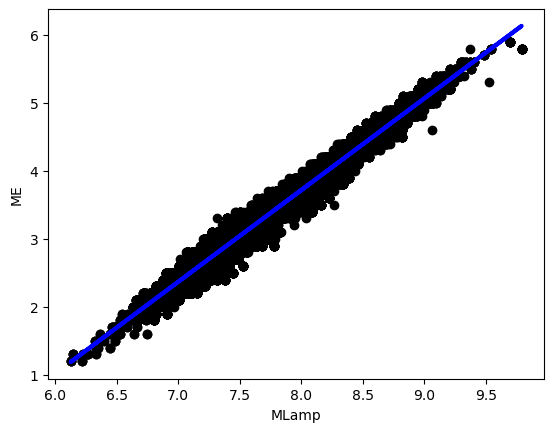

 

 Got 240141 events
logamp = 1.0 MLamp - 4.41
alt: MLamp = 1.0 logamp + 4.41
R-squared value: 1.0
Mean squared error: 0.00


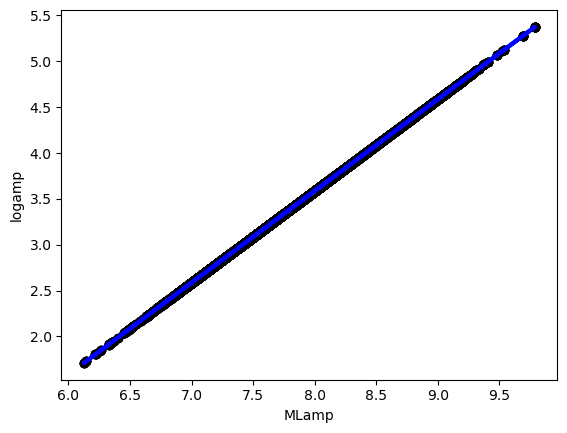

 

 Got 240141 events
logA = 0.993 MLamp - 5.54
alt: MLamp = 1.01 logA + 5.58
R-squared value: 0.939
Mean squared error: 0.01


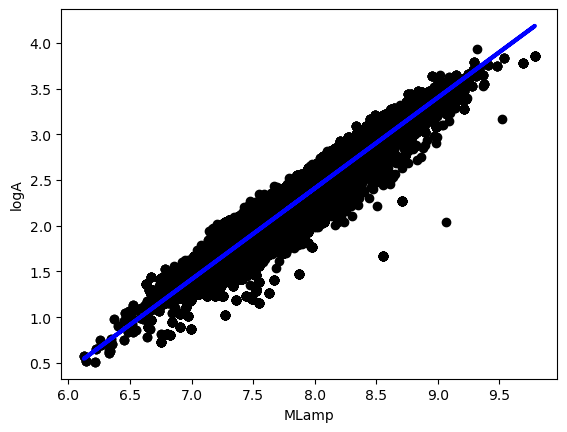

 

 Got 240141 events
logE = 2.02 MLamp - 8.52
alt: MLamp = 0.494 logE + 4.21
R-squared value: 0.979
Mean squared error: 0.02


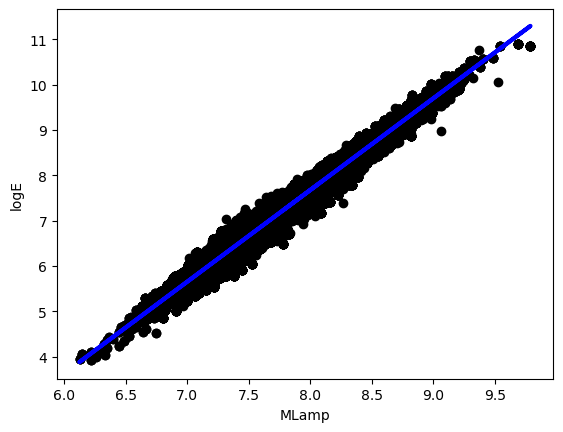

 

 Got 240141 events
MLamp = 0.945 MLA + 1.53
alt: MLA = 1.06 MLamp - 1.62
R-squared value: 0.939
Mean squared error: 0.01


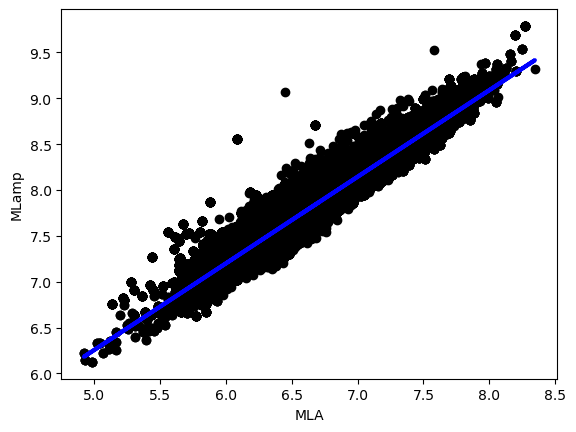

 

 Got 240141 events
ME = 1.3 MLA - 5.18
alt: MLA = 0.769 ME + 3.98
R-squared value: 0.954
Mean squared error: 0.02


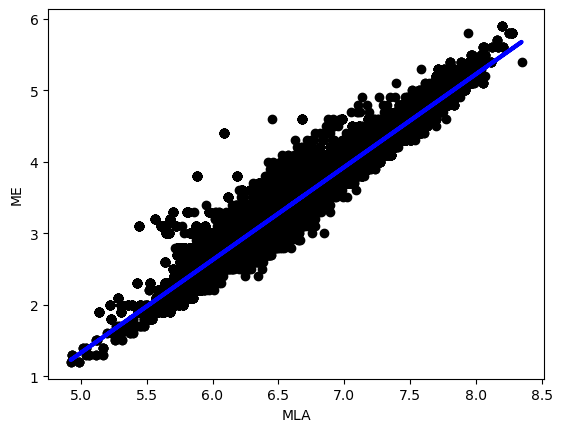

 

 Got 240141 events
logamp = 0.945 MLA - 2.89
alt: MLA = 1.06 logamp + 3.05
R-squared value: 0.939
Mean squared error: 0.01


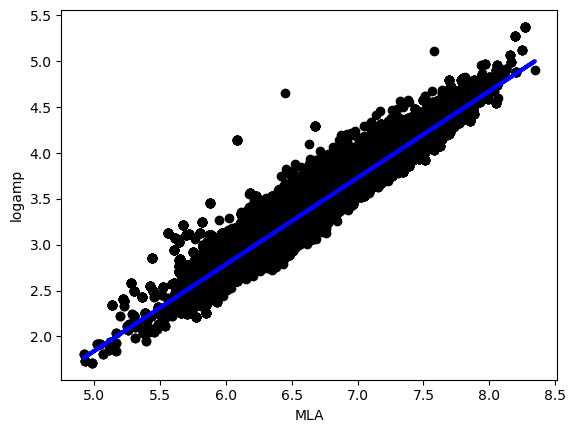

 

 Got 240141 events
logA = 1.0 MLA - 4.41
alt: MLA = 1.0 logA + 4.41
R-squared value: 1.0
Mean squared error: 0.00


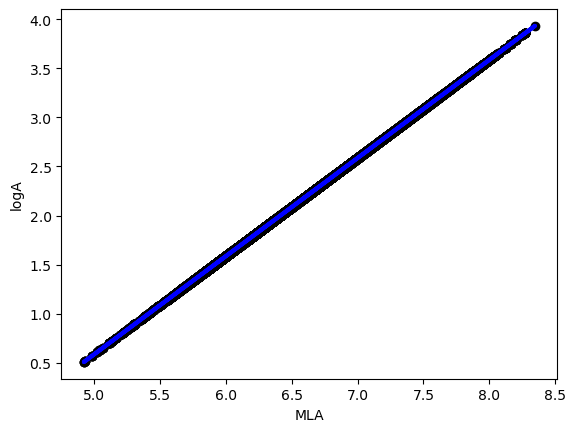

 

 Got 240141 events
logE = 1.95 MLA - 5.67
alt: MLA = 0.513 logE + 2.9
R-squared value: 0.956
Mean squared error: 0.03


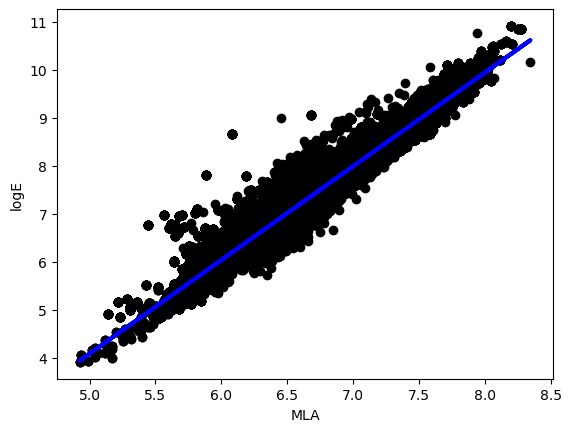

 

 Got 240141 events
MLamp = 0.724 ME + 5.3
alt: ME = 1.38 MLamp - 7.32
R-squared value: 0.977
Mean squared error: 0.00


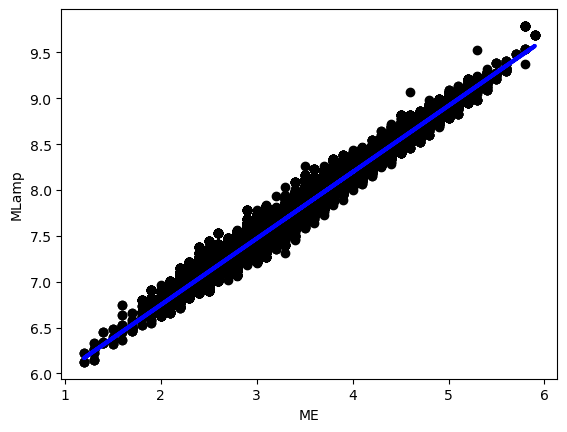

 

 Got 240141 events
MLA = 0.733 ME + 4.09
alt: ME = 1.36 MLA - 5.58
R-squared value: 0.954
Mean squared error: 0.01


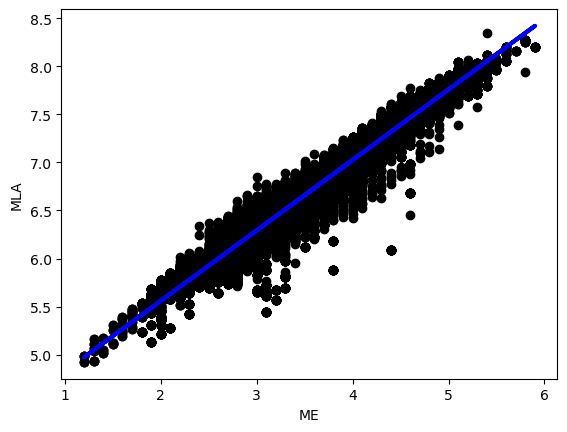

 

 Got 240141 events
logamp = 0.724 ME + 0.885
alt: ME = 1.38 logamp - 1.22
R-squared value: 0.977
Mean squared error: 0.00


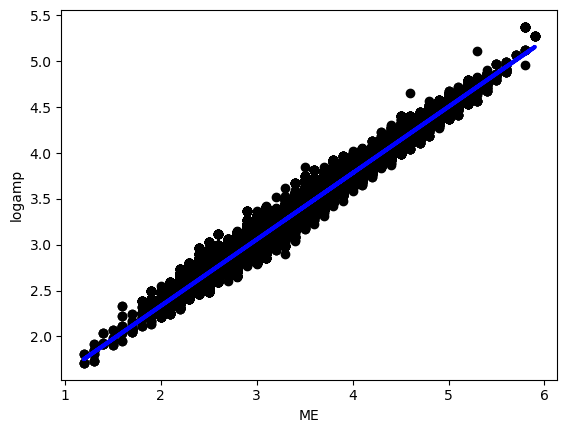

 

 Got 240141 events
logA = 0.733 ME - 0.321
alt: ME = 1.36 logA + 0.437
R-squared value: 0.954
Mean squared error: 0.01


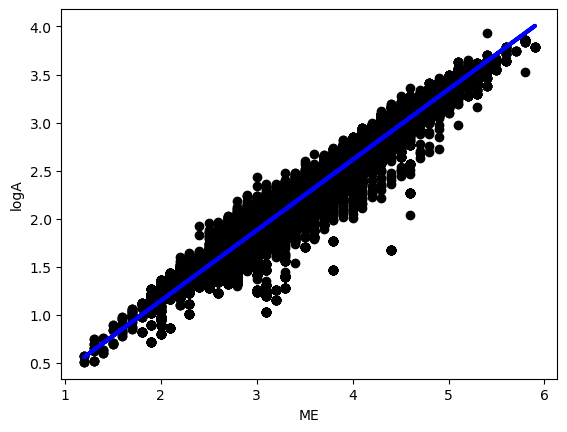

 

 Got 240141 events
logE = 1.5 ME + 2.11
alt: ME = 0.668 logE - 1.41
R-squared value: 0.998
Mean squared error: 0.00


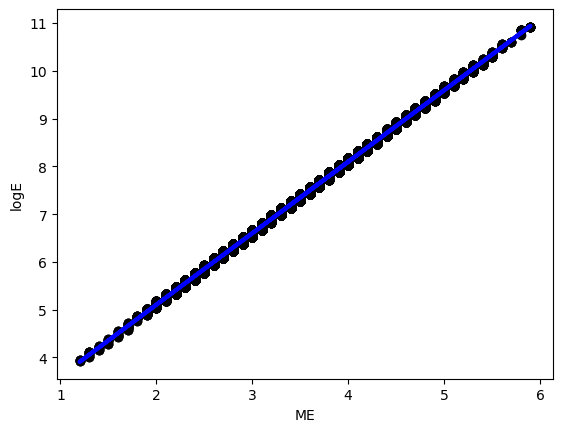

 

 Got 240141 events
MLamp = 1.0 logamp + 4.41
alt: logamp = 1.0 MLamp - 4.41
R-squared value: 1.0
Mean squared error: 0.00


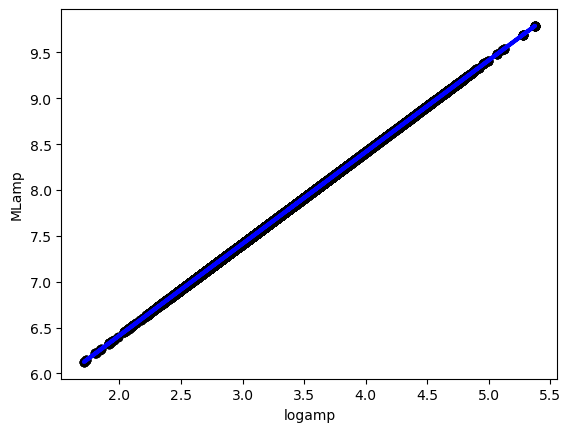

 

 Got 240141 events
MLA = 0.993 logamp + 3.26
alt: logamp = 1.01 MLA - 3.28
R-squared value: 0.939
Mean squared error: 0.01


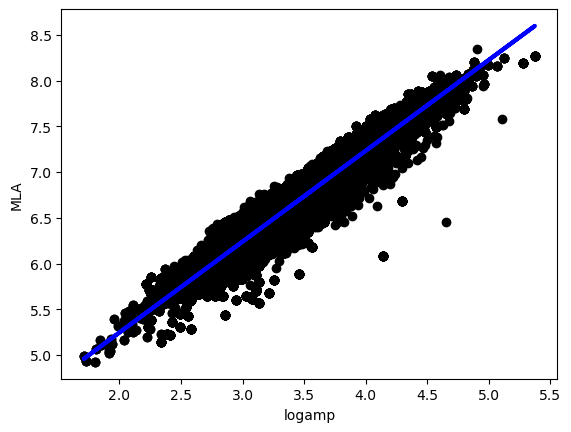

 

 Got 240141 events
ME = 1.35 logamp - 1.12
alt: logamp = 0.741 ME + 0.831
R-squared value: 0.977
Mean squared error: 0.01


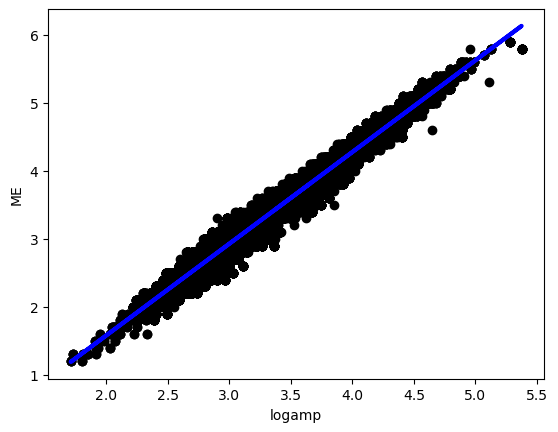

 

 Got 240141 events
logA = 0.993 logamp - 1.15
alt: logamp = 1.01 logA + 1.16
R-squared value: 0.939
Mean squared error: 0.01


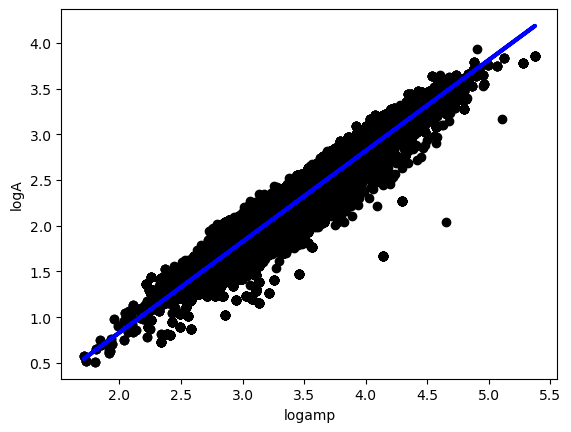

 

 Got 240141 events
logE = 2.02 logamp + 0.417
alt: logamp = 0.494 logE - 0.206
R-squared value: 0.979
Mean squared error: 0.02


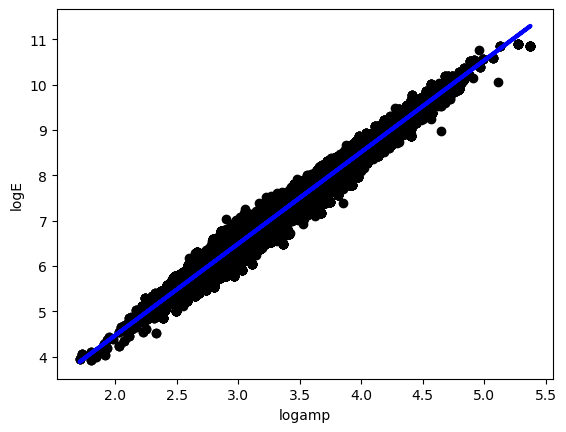

 

 Got 240141 events
MLamp = 0.945 logA + 5.7
alt: logA = 1.06 MLamp - 6.03
R-squared value: 0.939
Mean squared error: 0.01


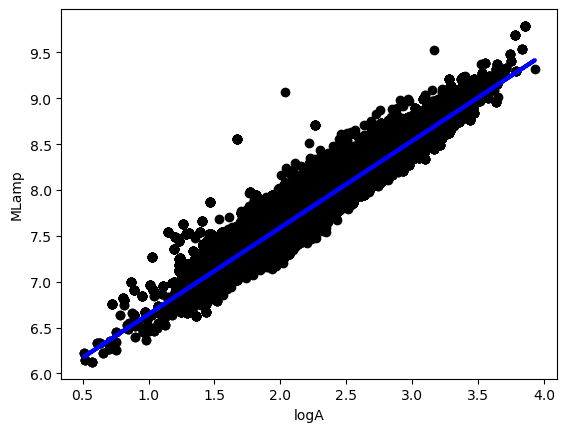

 

 Got 240141 events
MLA = 1.0 logA + 4.41
alt: logA = 1.0 MLA - 4.41
R-squared value: 1.0
Mean squared error: 0.00


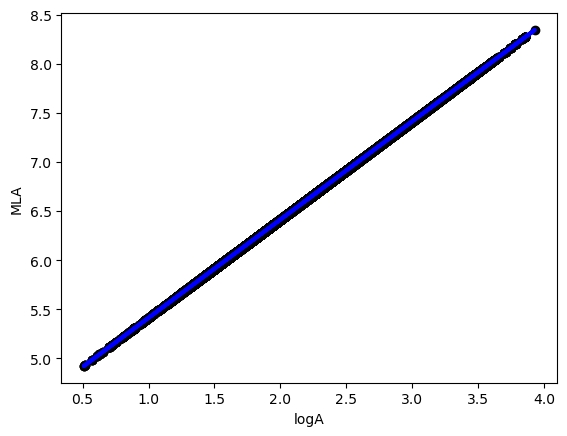

 

 Got 240141 events
ME = 1.3 logA + 0.564
alt: logA = 0.769 ME - 0.434
R-squared value: 0.954
Mean squared error: 0.02


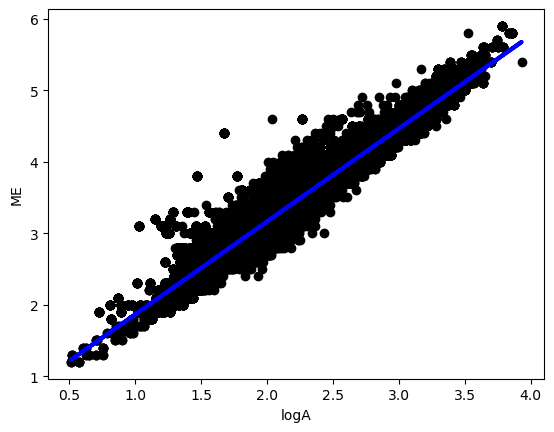

 

 Got 240141 events
logamp = 0.945 logA + 1.29
alt: logA = 1.06 logamp - 1.36
R-squared value: 0.939
Mean squared error: 0.01


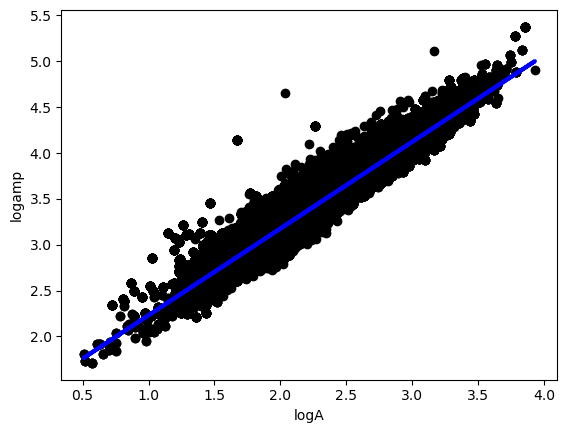

 

 Got 240141 events
logE = 1.95 logA + 2.95
alt: logA = 0.513 logE - 1.51
R-squared value: 0.956
Mean squared error: 0.03


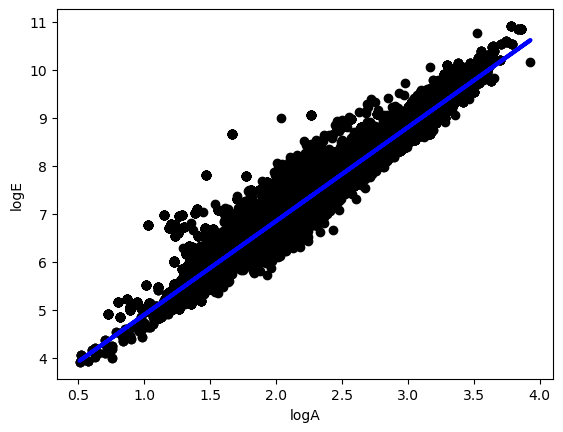

 

 Got 240141 events
MLamp = 0.484 logE + 4.28
alt: logE = 2.07 MLamp - 8.84
R-squared value: 0.979
Mean squared error: 0.00


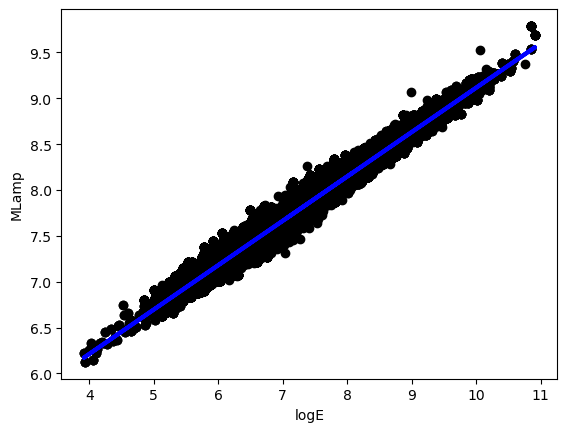

 

 Got 240141 events
MLA = 0.49 logE + 3.06
alt: logE = 2.04 MLA - 6.24
R-squared value: 0.956
Mean squared error: 0.01


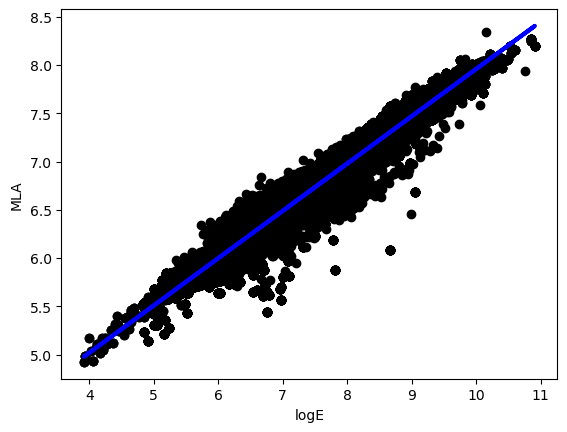

 

 Got 240141 events
ME = 0.667 logE - 1.4
alt: logE = 1.5 ME + 2.1
R-squared value: 0.998
Mean squared error: 0.00


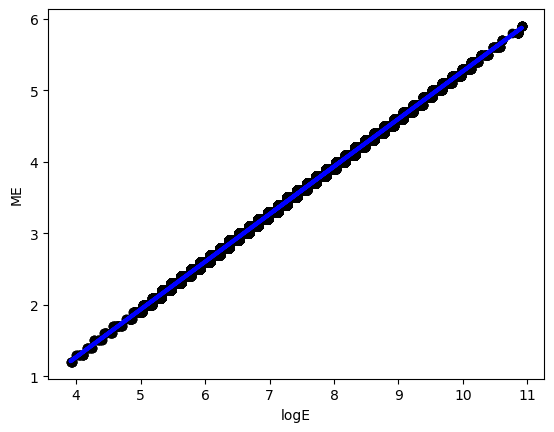

 

 Got 240141 events
logamp = 0.484 logE - 0.136
alt: logE = 2.07 logamp + 0.281
R-squared value: 0.979
Mean squared error: 0.00


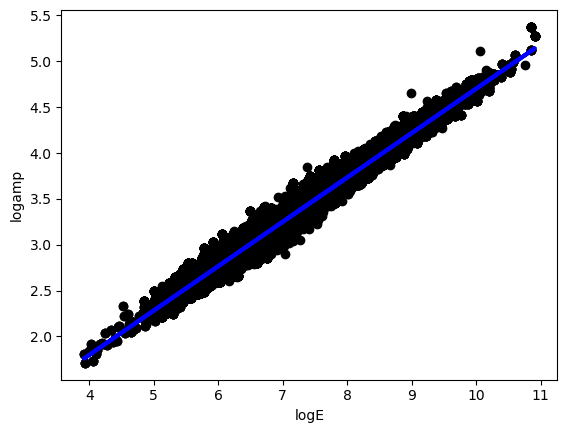

 

 Got 240141 events
logA = 0.49 logE - 1.35
alt: logE = 2.04 logA + 2.76
R-squared value: 0.956
Mean squared error: 0.01


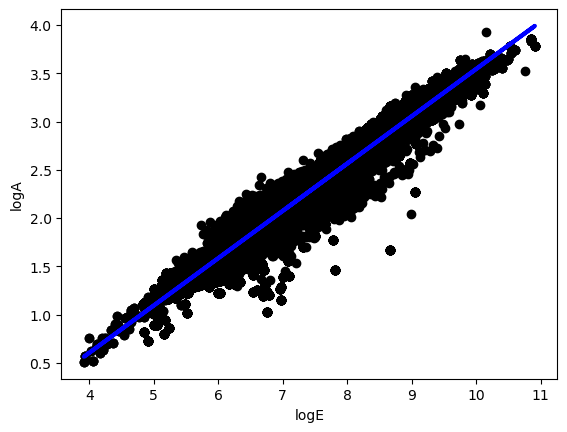

# events of e = 37908
 

 Got 37908 events
MLA = 0.933 MLamp - 0.709
alt: MLamp = 1.07 MLA + 0.76
R-squared value: 0.94
Mean squared error: 0.01


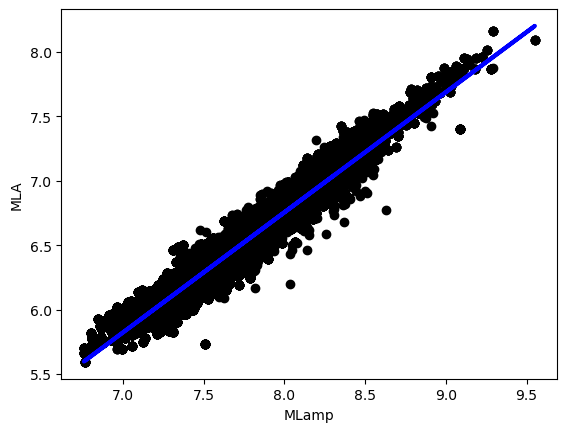

 

 Got 37908 events
ME = 1.38 MLamp - 7.27
alt: MLamp = 0.726 ME + 5.28
R-squared value: 0.972
Mean squared error: 0.01


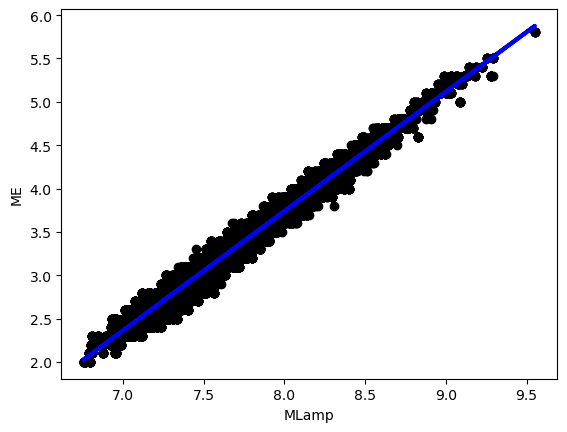

 

 Got 37908 events
logamp = 1.0 MLamp - 4.41
alt: MLamp = 1.0 logamp + 4.41
R-squared value: 1.0
Mean squared error: 0.00


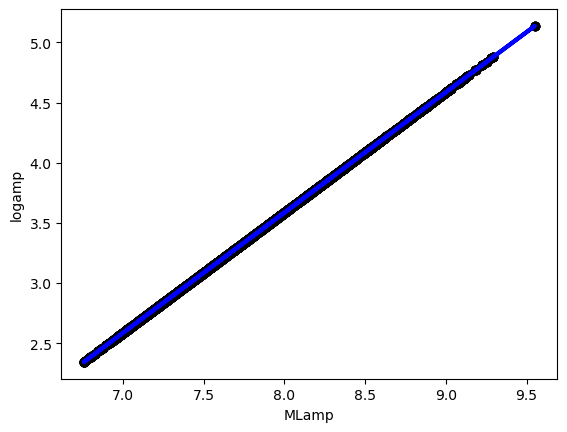

 

 Got 37908 events
logA = 0.933 MLamp - 5.12
alt: MLamp = 1.07 logA + 5.49
R-squared value: 0.94
Mean squared error: 0.01


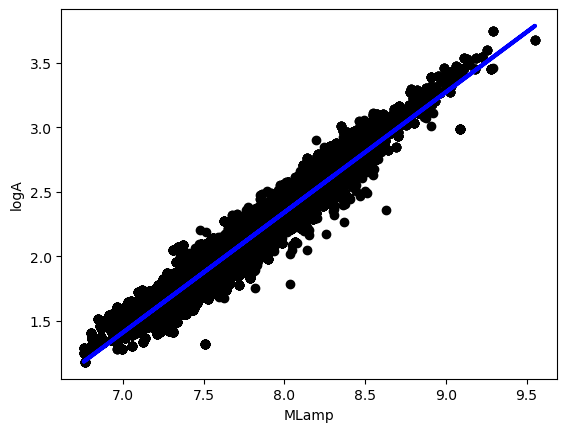

 

 Got 37908 events
logE = 2.06 MLamp - 8.81
alt: MLamp = 0.484 logE + 4.27
R-squared value: 0.974
Mean squared error: 0.02


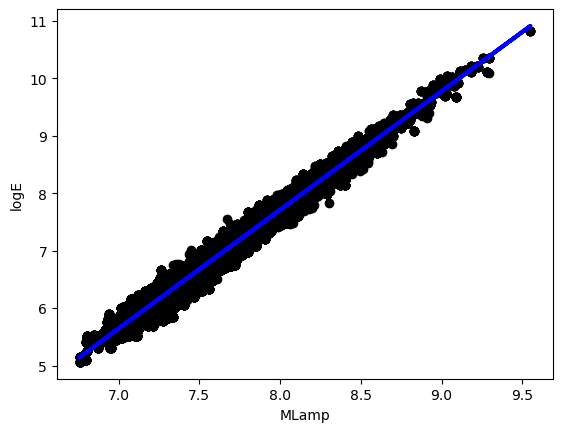

 

 Got 37908 events
MLamp = 1.01 MLA + 1.17
alt: MLA = 0.993 MLamp - 1.16
R-squared value: 0.94
Mean squared error: 0.01


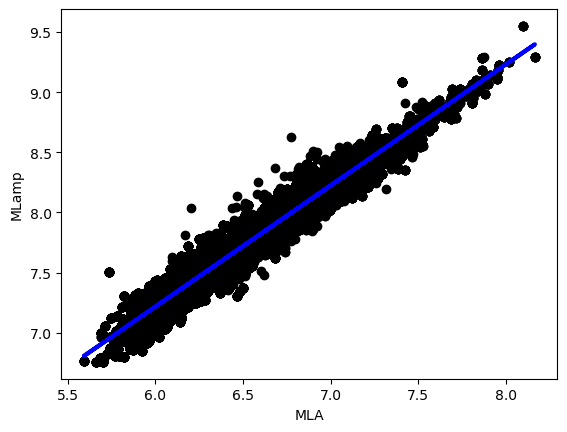

 

 Got 37908 events
ME = 1.41 MLA - 5.79
alt: MLA = 0.711 ME + 4.11
R-squared value: 0.941
Mean squared error: 0.02


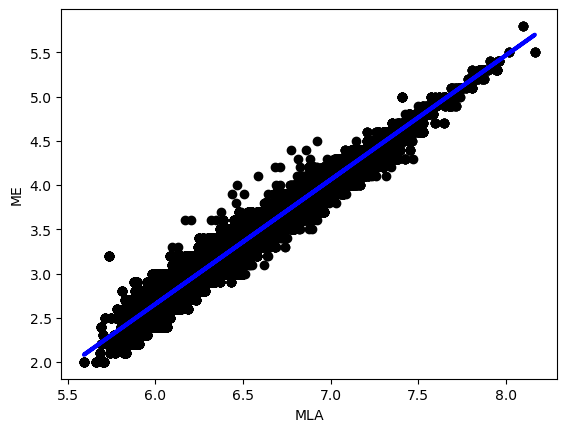

 

 Got 37908 events
logamp = 1.01 MLA - 3.24
alt: MLA = 0.993 logamp + 3.22
R-squared value: 0.94
Mean squared error: 0.01


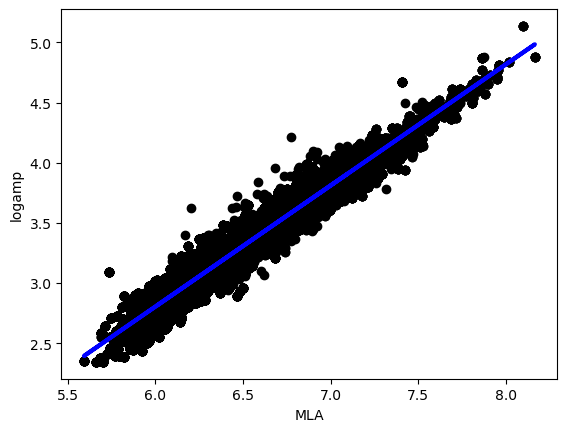

 

 Got 37908 events
logA = 1.0 MLA - 4.41
alt: MLA = 1.0 logA + 4.41
R-squared value: 1.0
Mean squared error: 0.00


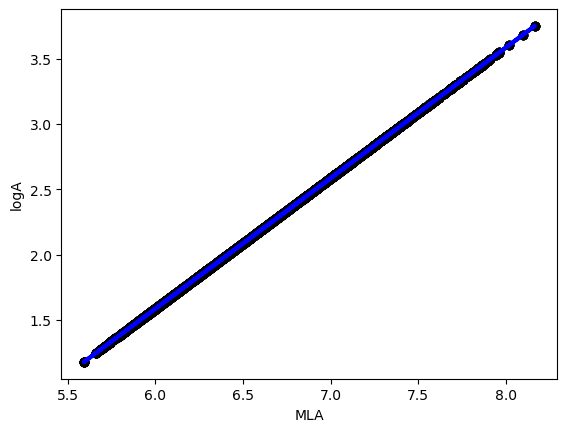

 

 Got 37908 events
logE = 2.11 MLA - 6.58
alt: MLA = 0.474 logE + 3.12
R-squared value: 0.943
Mean squared error: 0.05


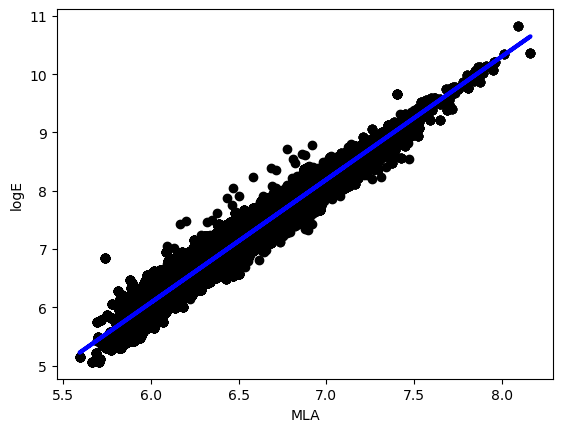

 

 Got 37908 events
MLamp = 0.706 ME + 5.35
alt: ME = 1.42 MLamp - 7.58
R-squared value: 0.972
Mean squared error: 0.01


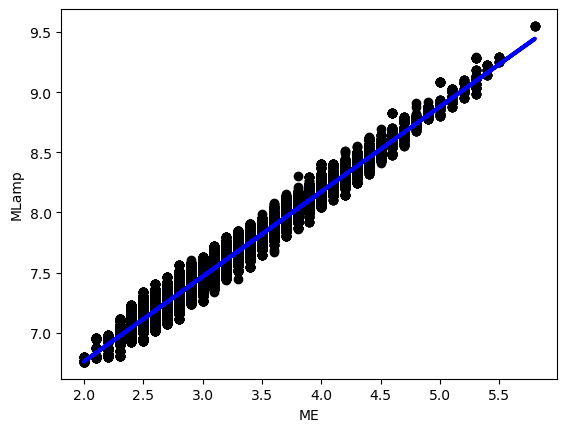

 

 Got 37908 events
MLA = 0.668 ME + 4.25
alt: ME = 1.5 MLA - 6.36
R-squared value: 0.941
Mean squared error: 0.01


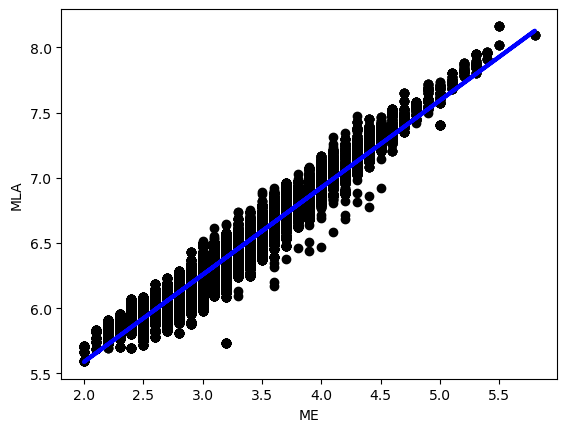

 

 Got 37908 events
logamp = 0.706 ME + 0.935
alt: ME = 1.42 logamp - 1.32
R-squared value: 0.972
Mean squared error: 0.01


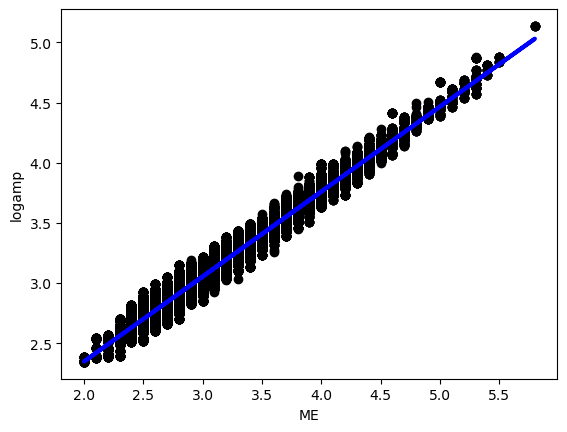

 

 Got 37908 events
logA = 0.668 ME - 0.163
alt: ME = 1.5 logA + 0.244
R-squared value: 0.941
Mean squared error: 0.01


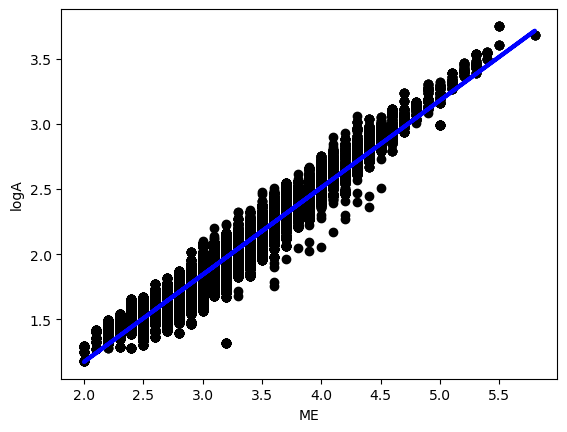

 

 Got 37908 events
logE = 1.5 ME + 2.11
alt: ME = 0.668 logE - 1.41
R-squared value: 0.998
Mean squared error: 0.00


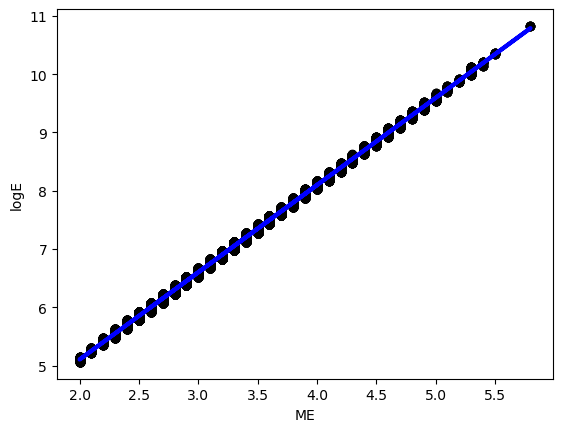

 

 Got 37908 events
MLamp = 1.0 logamp + 4.41
alt: logamp = 1.0 MLamp - 4.41
R-squared value: 1.0
Mean squared error: 0.00


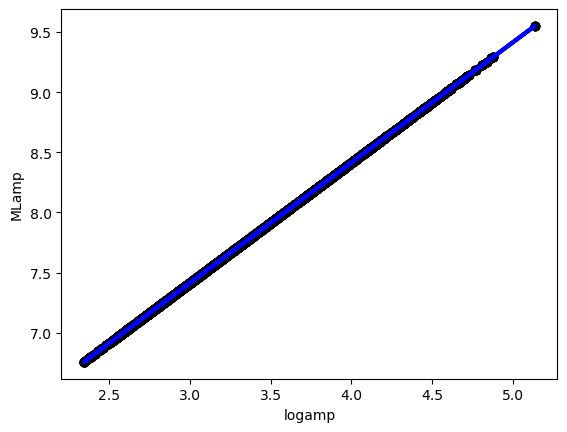

 

 Got 37908 events
MLA = 0.933 logamp + 3.41
alt: logamp = 1.07 MLA - 3.65
R-squared value: 0.94
Mean squared error: 0.01


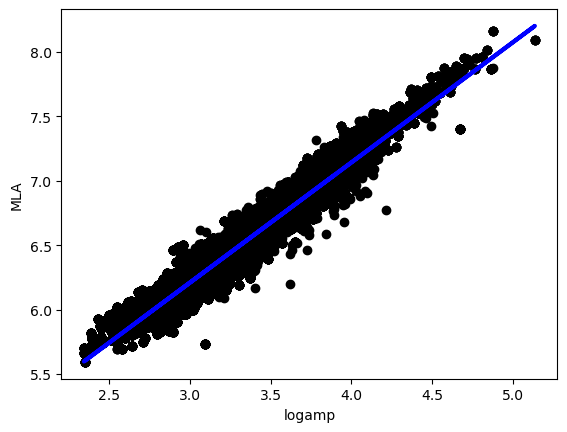

 

 Got 37908 events
ME = 1.38 logamp - 1.2
alt: logamp = 0.726 ME + 0.869
R-squared value: 0.972
Mean squared error: 0.01


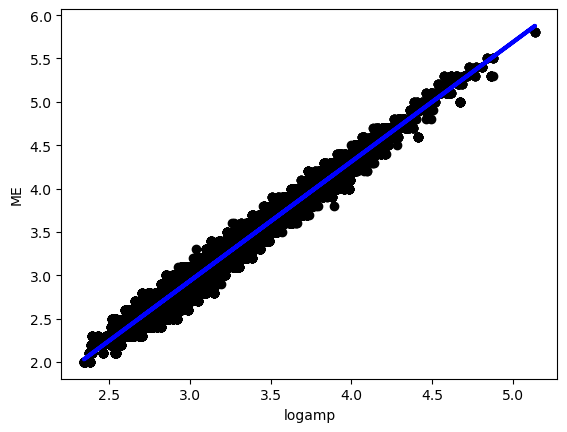

 

 Got 37908 events
logA = 0.933 logamp - 1.0
alt: logamp = 1.07 logA + 1.08
R-squared value: 0.94
Mean squared error: 0.01


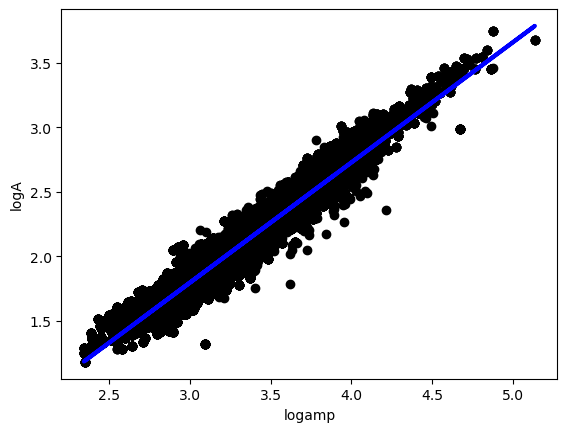

 

 Got 37908 events
logE = 2.06 logamp + 0.305
alt: logamp = 0.484 logE - 0.148
R-squared value: 0.974
Mean squared error: 0.02


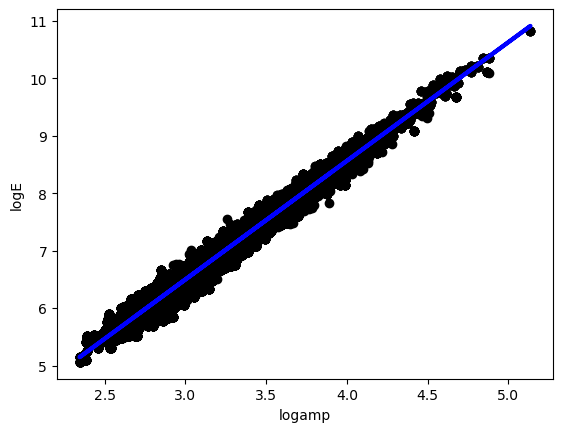

 

 Got 37908 events
MLamp = 1.01 logA + 5.62
alt: logA = 0.993 MLamp - 5.58
R-squared value: 0.94
Mean squared error: 0.01


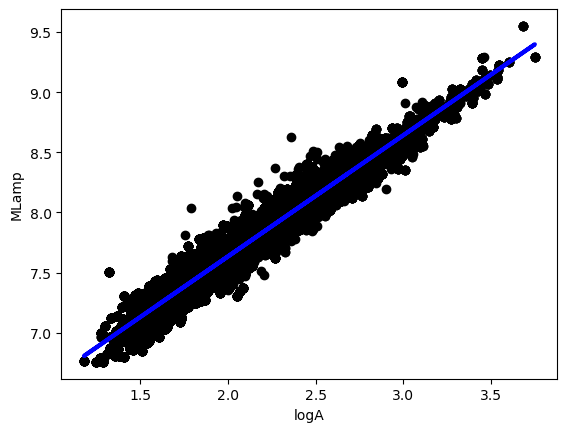

 

 Got 37908 events
MLA = 1.0 logA + 4.41
alt: logA = 1.0 MLA - 4.41
R-squared value: 1.0
Mean squared error: 0.00


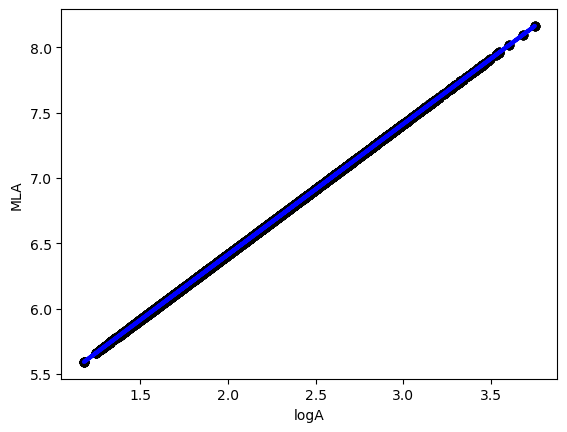

 

 Got 37908 events
ME = 1.41 logA + 0.422
alt: logA = 0.711 ME - 0.3
R-squared value: 0.941
Mean squared error: 0.02


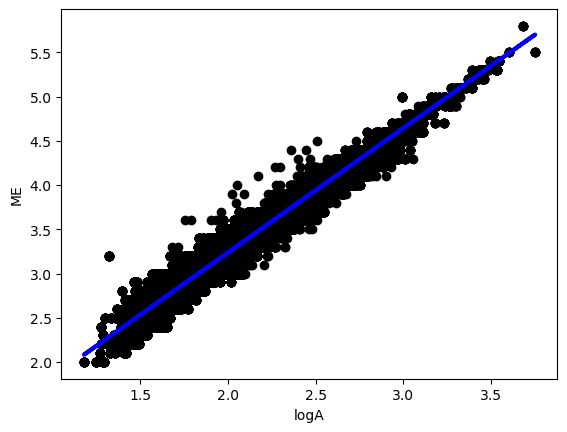

 

 Got 37908 events
logamp = 1.01 logA + 1.21
alt: logA = 0.993 logamp - 1.2
R-squared value: 0.94
Mean squared error: 0.01


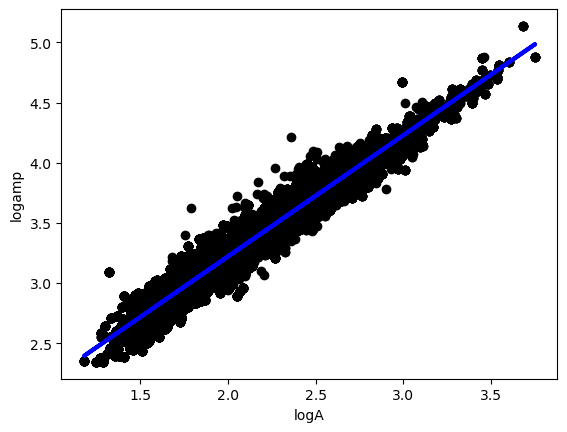

 

 Got 37908 events
logE = 2.11 logA + 2.73
alt: logA = 0.474 logE - 1.29
R-squared value: 0.943
Mean squared error: 0.05


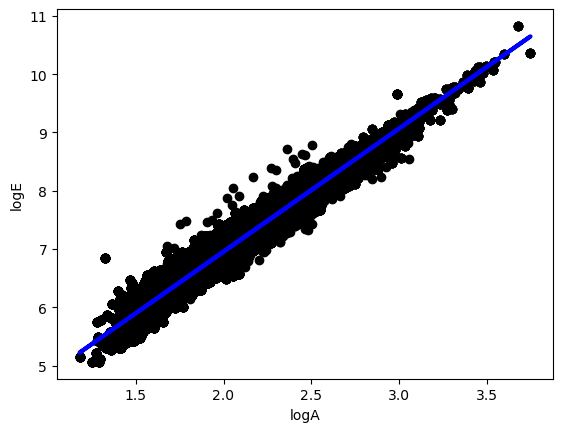

 

 Got 37908 events
MLamp = 0.472 logE + 4.35
alt: logE = 2.12 MLamp - 9.23
R-squared value: 0.974
Mean squared error: 0.00


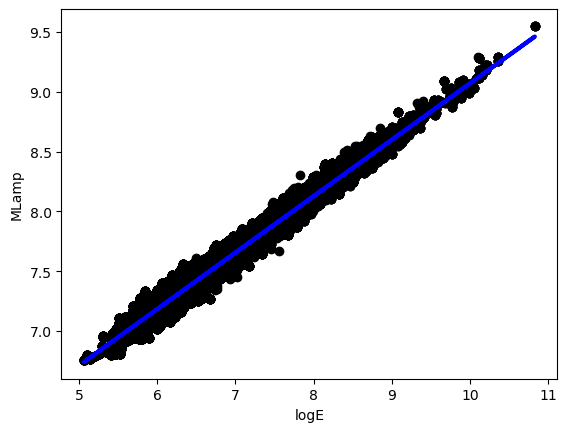

 

 Got 37908 events
MLA = 0.447 logE + 3.31
alt: logE = 2.24 MLA - 7.41
R-squared value: 0.943
Mean squared error: 0.01


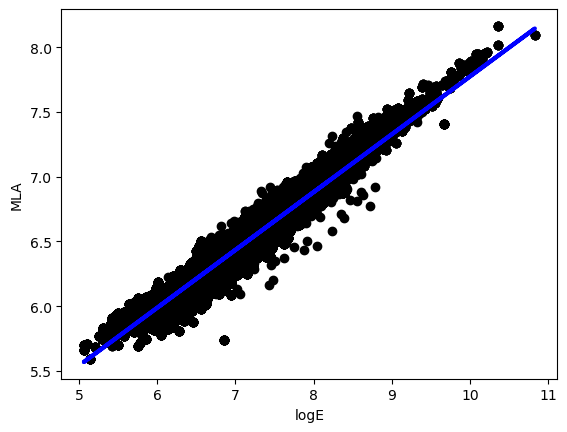

 

 Got 37908 events
ME = 0.667 logE - 1.4
alt: logE = 1.5 ME + 2.1
R-squared value: 0.998
Mean squared error: 0.00


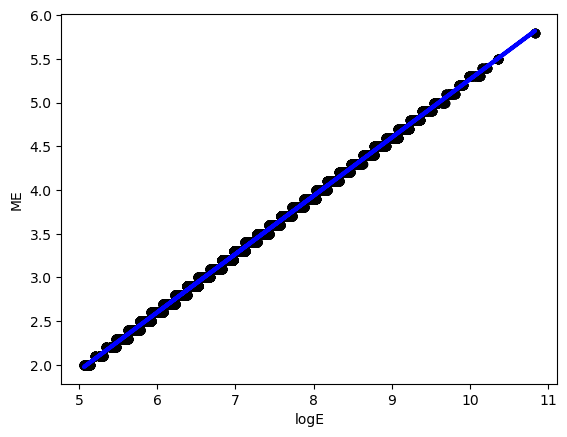

 

 Got 37908 events
logamp = 0.472 logE - 0.0603
alt: logE = 2.12 logamp + 0.128
R-squared value: 0.974
Mean squared error: 0.00


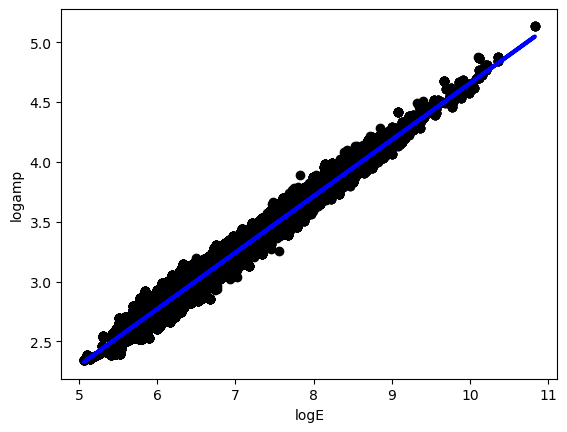

 

 Got 37908 events
logA = 0.447 logE - 1.11
alt: logE = 2.24 logA + 2.48
R-squared value: 0.943
Mean squared error: 0.01


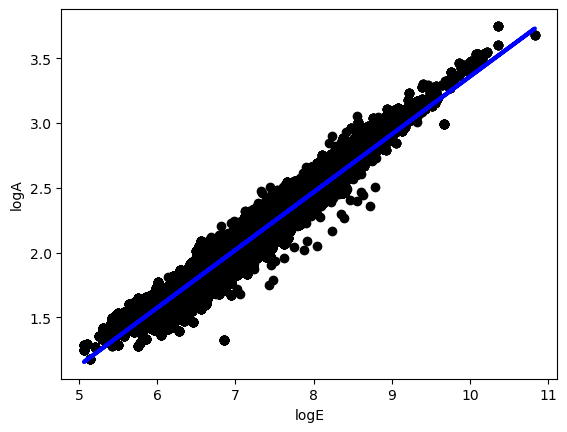

# events of l = 79930
 

 Got 79930 events
MLA = 0.889 MLamp - 0.359
alt: MLamp = 1.13 MLA + 0.404
R-squared value: 0.92
Mean squared error: 0.01


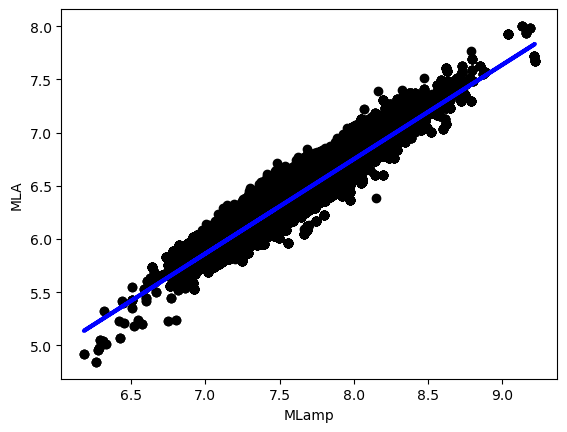

 

 Got 79930 events
ME = 1.29 MLamp - 6.75
alt: MLamp = 0.774 ME + 5.23
R-squared value: 0.966
Mean squared error: 0.01


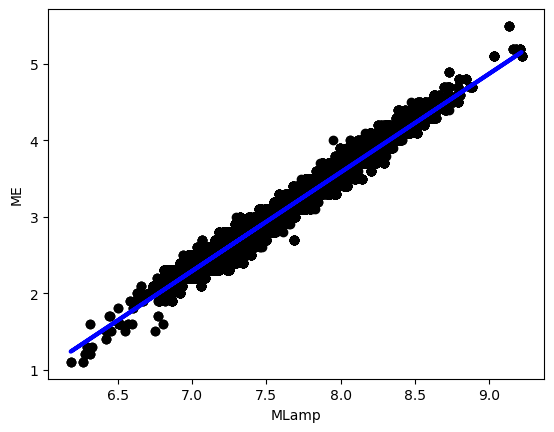

 

 Got 79930 events
logamp = 1.0 MLamp - 4.41
alt: MLamp = 1.0 logamp + 4.41
R-squared value: 1.0
Mean squared error: 0.00


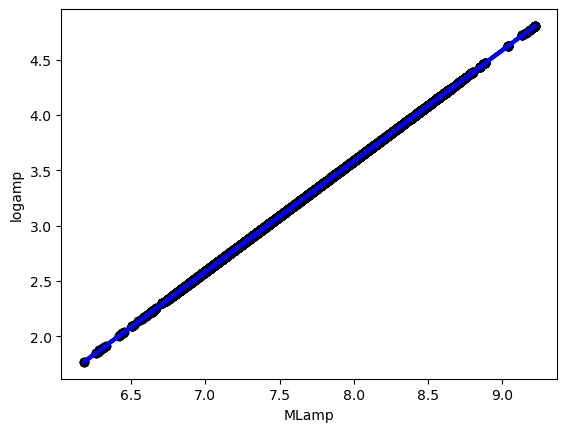

 

 Got 79930 events
logA = 0.889 MLamp - 4.77
alt: MLamp = 1.13 logA + 5.37
R-squared value: 0.92
Mean squared error: 0.01


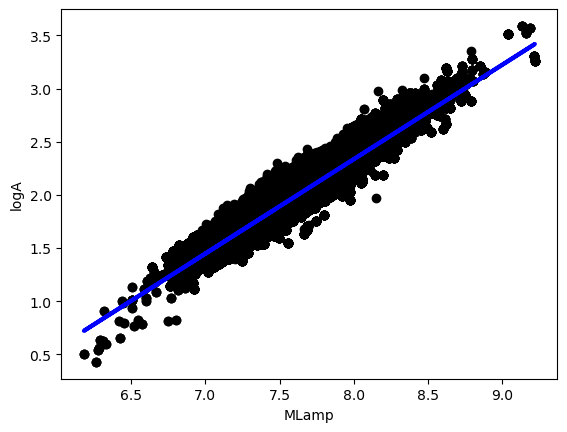

 

 Got 79930 events
logE = 1.94 MLamp - 8.03
alt: MLamp = 0.516 logE + 4.14
R-squared value: 0.969
Mean squared error: 0.02


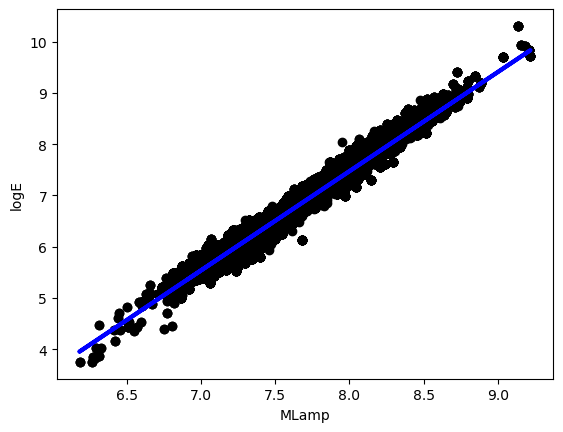

 

 Got 79930 events
MLamp = 1.04 MLA + 0.963
alt: MLA = 0.966 MLamp - 0.931
R-squared value: 0.92
Mean squared error: 0.01


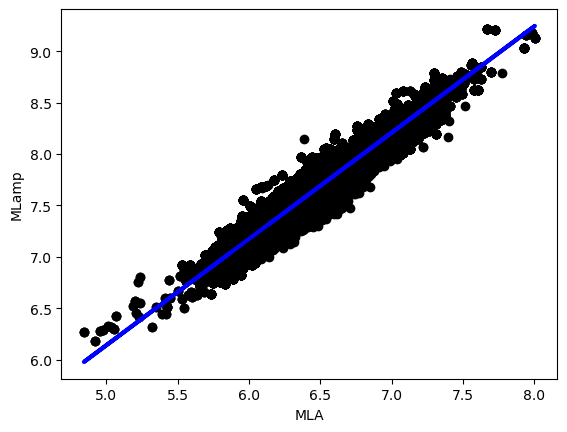

 

 Got 79930 events
ME = 1.39 MLA - 5.82
alt: MLA = 0.721 ME + 4.2
R-squared value: 0.957
Mean squared error: 0.01


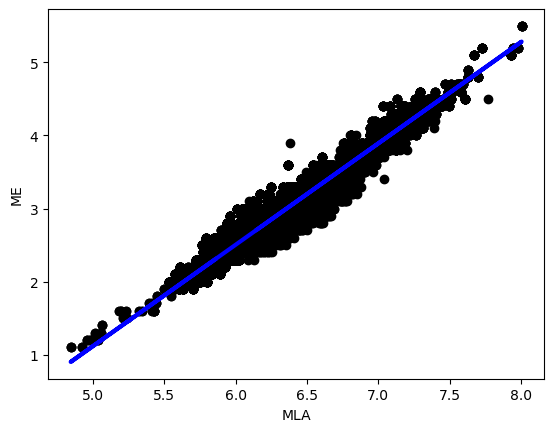

 

 Got 79930 events
logamp = 1.04 MLA - 3.45
alt: MLA = 0.966 logamp + 3.33
R-squared value: 0.92
Mean squared error: 0.01


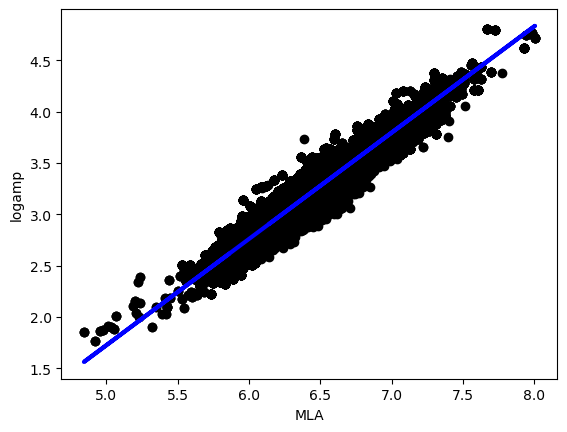

 

 Got 79930 events
logA = 1.0 MLA - 4.41
alt: MLA = 1.0 logA + 4.41
R-squared value: 1.0
Mean squared error: 0.00


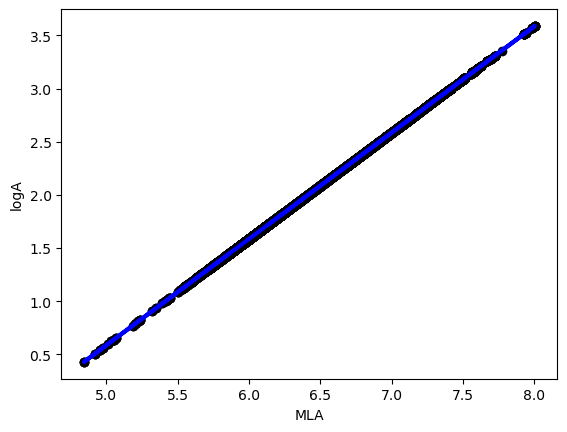

 

 Got 79930 events
logE = 2.08 MLA - 6.63
alt: MLA = 0.48 logE + 3.19
R-squared value: 0.96
Mean squared error: 0.02


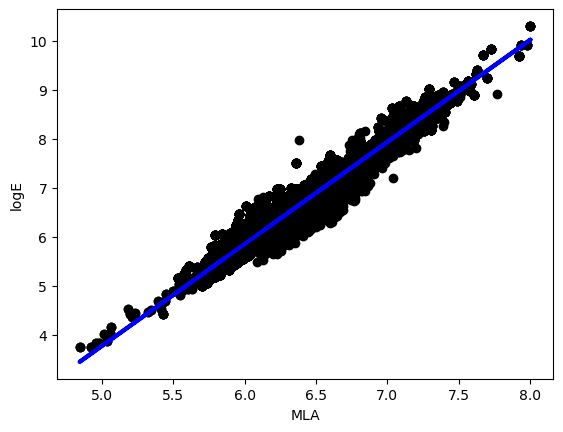

 

 Got 79930 events
MLamp = 0.747 ME + 5.3
alt: ME = 1.34 MLamp - 7.09
R-squared value: 0.966
Mean squared error: 0.00


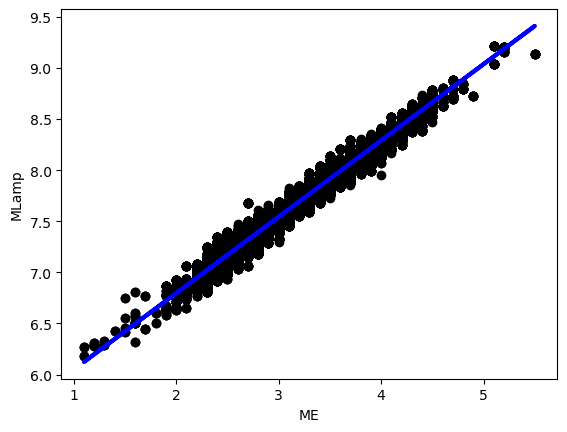

 

 Got 79930 events
MLA = 0.689 ME + 4.28
alt: ME = 1.45 MLA - 6.21
R-squared value: 0.957
Mean squared error: 0.00


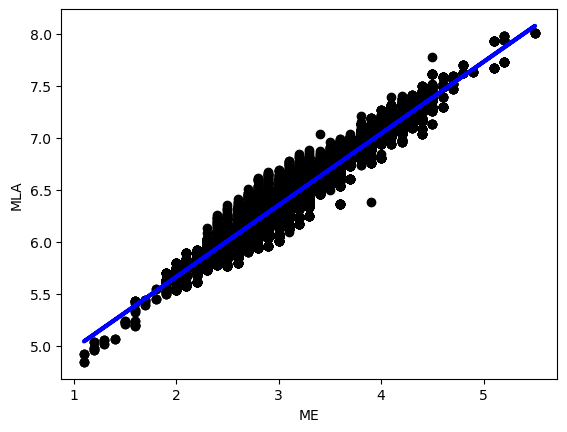

 

 Got 79930 events
logamp = 0.747 ME + 0.888
alt: ME = 1.34 logamp - 1.19
R-squared value: 0.966
Mean squared error: 0.00


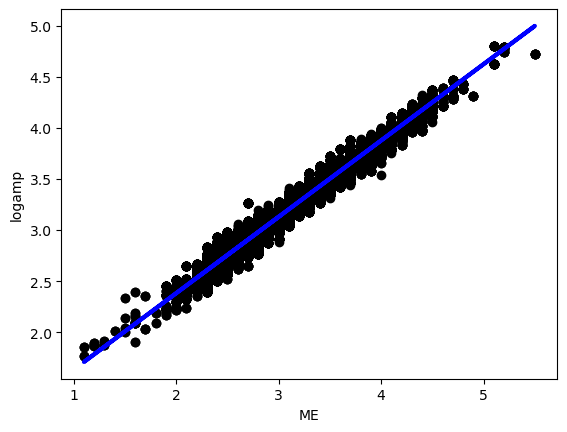

 

 Got 79930 events
logA = 0.689 ME - 0.132
alt: ME = 1.45 logA + 0.191
R-squared value: 0.957
Mean squared error: 0.00


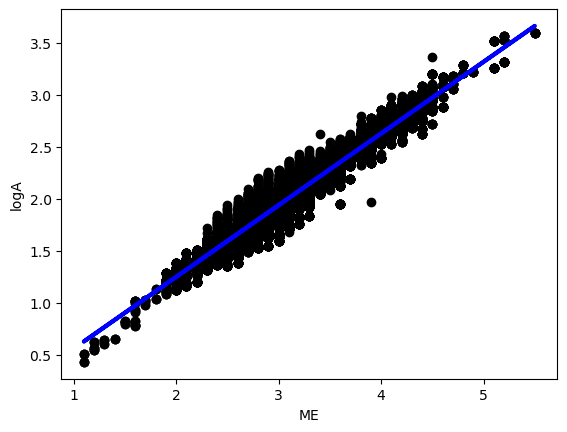

 

 Got 79930 events
logE = 1.49 ME + 2.12
alt: ME = 0.669 logE - 1.42
R-squared value: 0.996
Mean squared error: 0.00


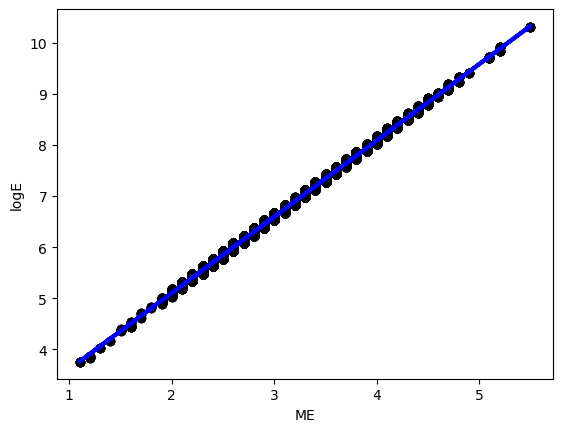

 

 Got 79930 events
MLamp = 1.0 logamp + 4.41
alt: logamp = 1.0 MLamp - 4.41
R-squared value: 1.0
Mean squared error: 0.00


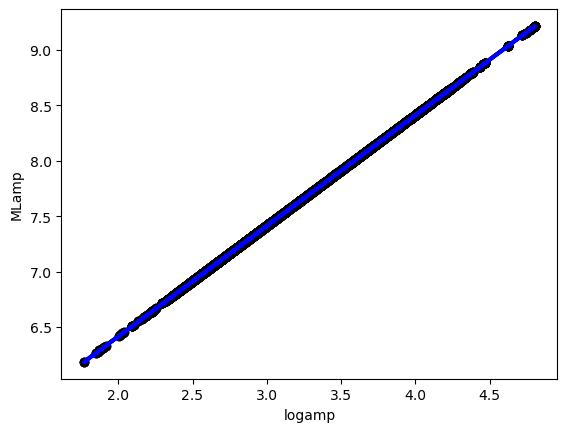

 

 Got 79930 events
MLA = 0.889 logamp + 3.56
alt: logamp = 1.13 MLA - 4.01
R-squared value: 0.92
Mean squared error: 0.01


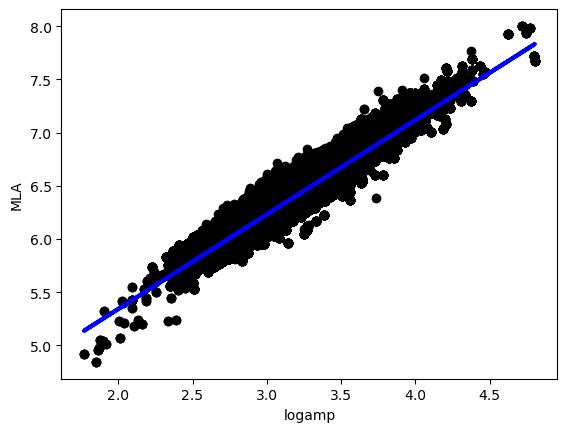

 

 Got 79930 events
ME = 1.29 logamp - 1.05
alt: logamp = 0.774 ME + 0.813
R-squared value: 0.966
Mean squared error: 0.01


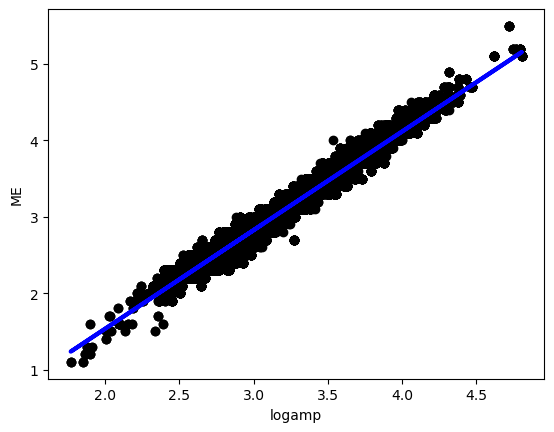

 

 Got 79930 events
logA = 0.889 logamp - 0.85
alt: logamp = 1.13 logA + 0.957
R-squared value: 0.92
Mean squared error: 0.01


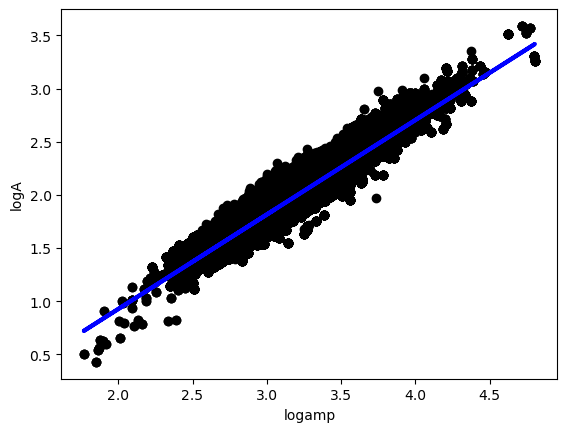

 

 Got 79930 events
logE = 1.94 logamp + 0.526
alt: logamp = 0.516 logE - 0.271
R-squared value: 0.969
Mean squared error: 0.02


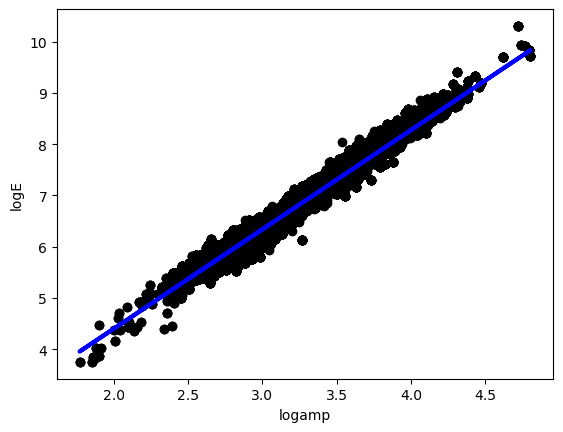

 

 Got 79930 events
MLamp = 1.04 logA + 5.53
alt: logA = 0.966 MLamp - 5.34
R-squared value: 0.92
Mean squared error: 0.01


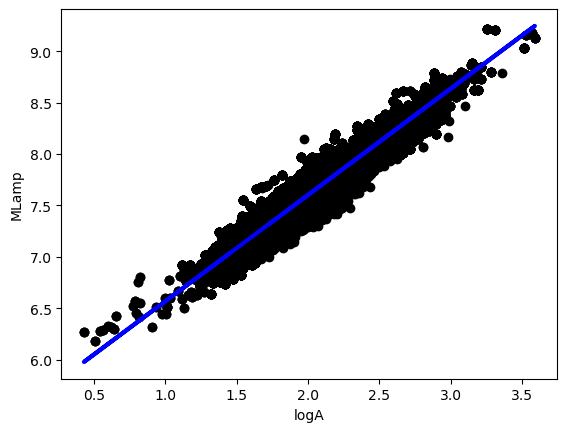

 

 Got 79930 events
MLA = 1.0 logA + 4.41
alt: logA = 1.0 MLA - 4.41
R-squared value: 1.0
Mean squared error: 0.00


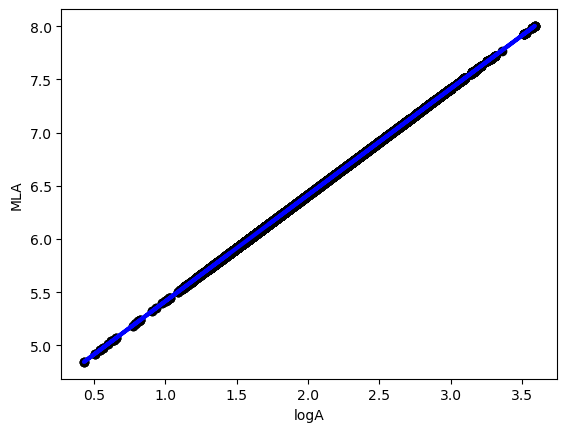

 

 Got 79930 events
ME = 1.39 logA + 0.303
alt: logA = 0.721 ME - 0.219
R-squared value: 0.957
Mean squared error: 0.01


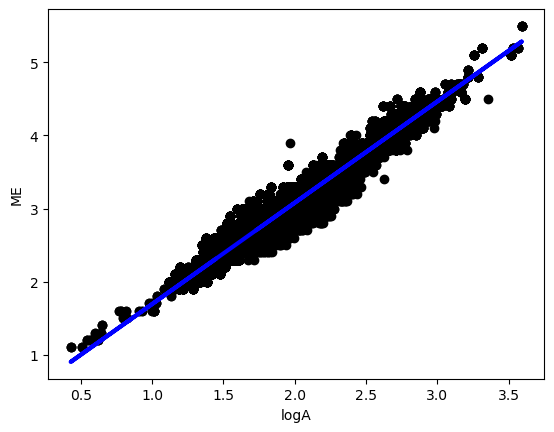

 

 Got 79930 events
logamp = 1.04 logA + 1.12
alt: logA = 0.966 logamp - 1.08
R-squared value: 0.92
Mean squared error: 0.01


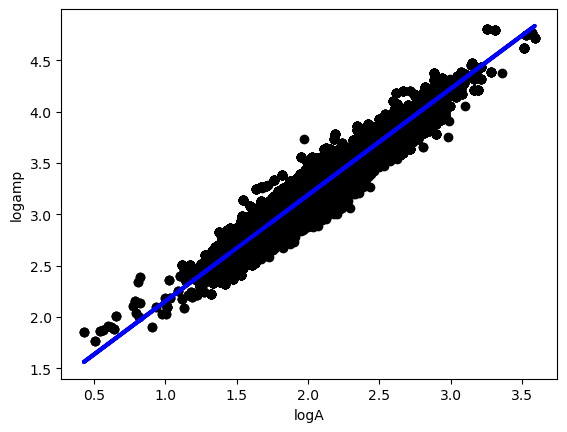

 

 Got 79930 events
logE = 2.08 logA + 2.56
alt: logA = 0.48 logE - 1.23
R-squared value: 0.96
Mean squared error: 0.02


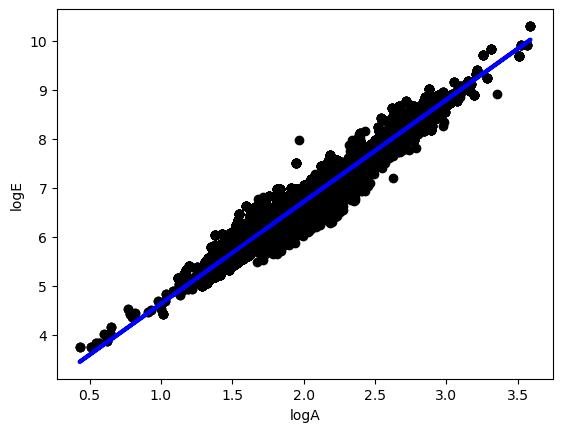

 

 Got 79930 events
MLamp = 0.5 logE + 4.24
alt: logE = 2.0 MLamp - 8.48
R-squared value: 0.969
Mean squared error: 0.00


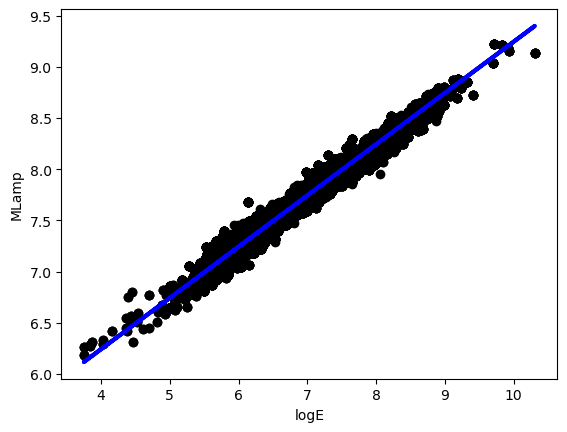

 

 Got 79930 events
MLA = 0.461 logE + 3.31
alt: logE = 2.17 MLA - 7.16
R-squared value: 0.96
Mean squared error: 0.00


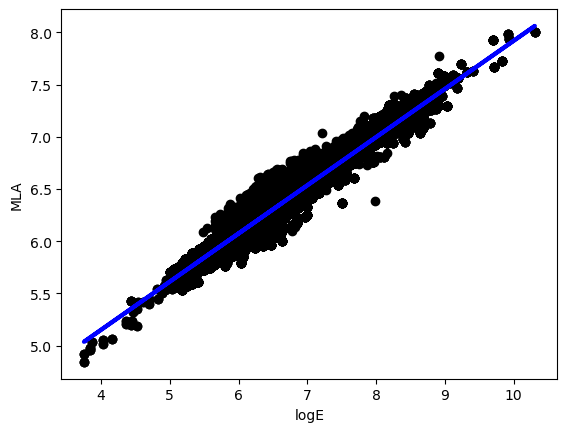

 

 Got 79930 events
ME = 0.667 logE - 1.4
alt: logE = 1.5 ME + 2.1
R-squared value: 0.996
Mean squared error: 0.00


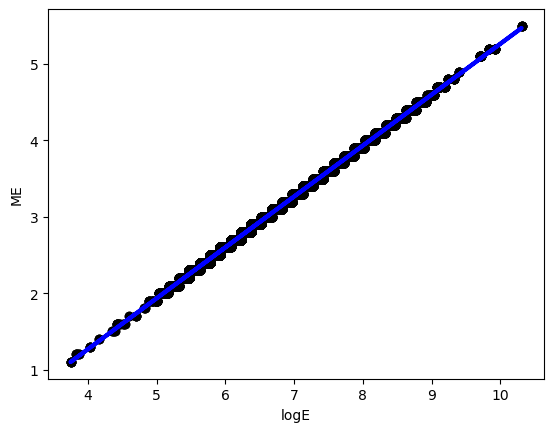

 

 Got 79930 events
logamp = 0.5 logE - 0.172
alt: logE = 2.0 logamp + 0.343
R-squared value: 0.969
Mean squared error: 0.00


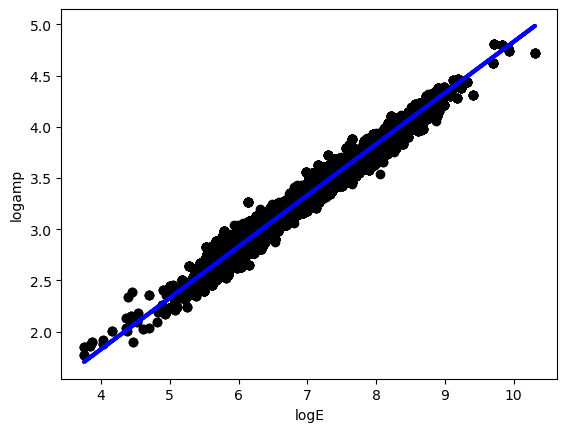

 

 Got 79930 events
logA = 0.461 logE - 1.11
alt: logE = 2.17 logA + 2.4
R-squared value: 0.96
Mean squared error: 0.00


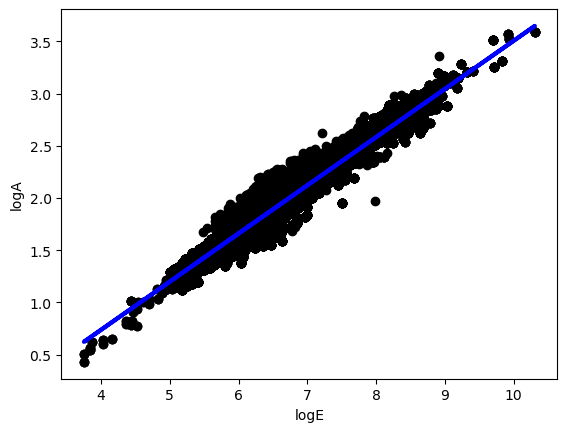

# events of h = 13786
 

 Got 13786 events
MLA = 0.864 MLamp - 0.15
alt: MLamp = 1.16 MLA + 0.173
R-squared value: 0.888
Mean squared error: 0.02


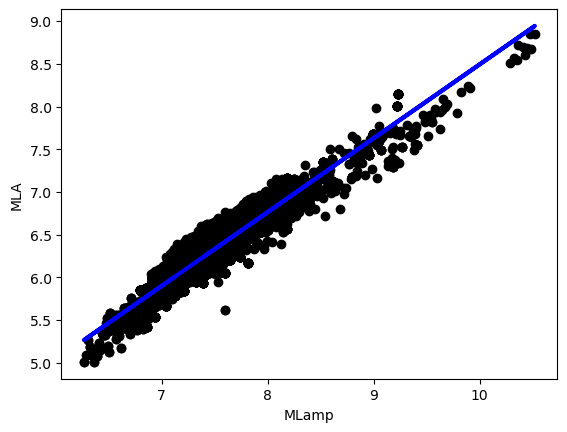

 

 Got 13786 events
ME = 1.24 MLamp - 6.35
alt: MLamp = 0.806 ME + 5.12
R-squared value: 0.966
Mean squared error: 0.01


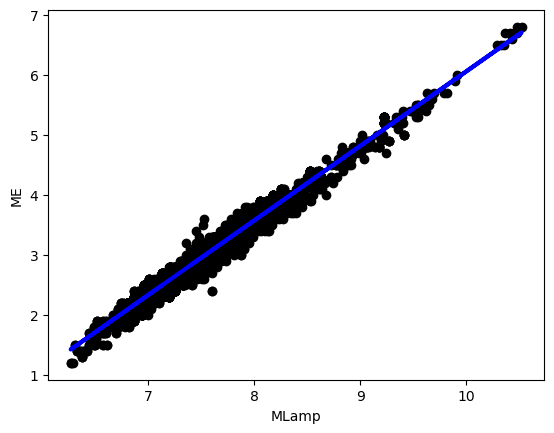

 

 Got 13786 events
logamp = 1.0 MLamp - 4.41
alt: MLamp = 1.0 logamp + 4.41
R-squared value: 1.0
Mean squared error: 0.00


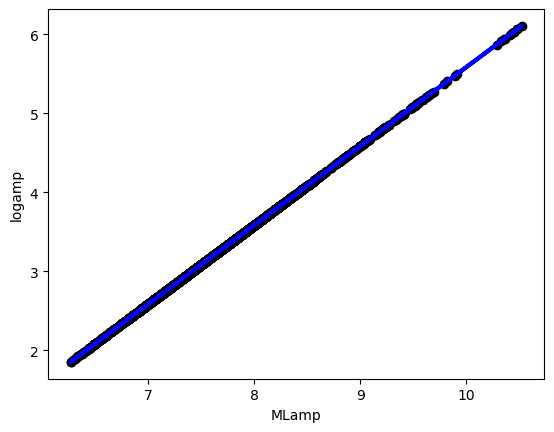

 

 Got 13786 events
logA = 0.864 MLamp - 4.56
alt: MLamp = 1.16 logA + 5.28
R-squared value: 0.888
Mean squared error: 0.02


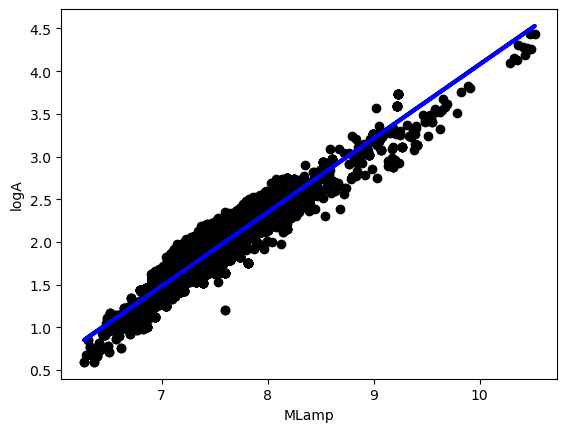

 

 Got 13786 events
logE = 1.86 MLamp - 7.43
alt: MLamp = 0.537 logE + 3.99
R-squared value: 0.97
Mean squared error: 0.02


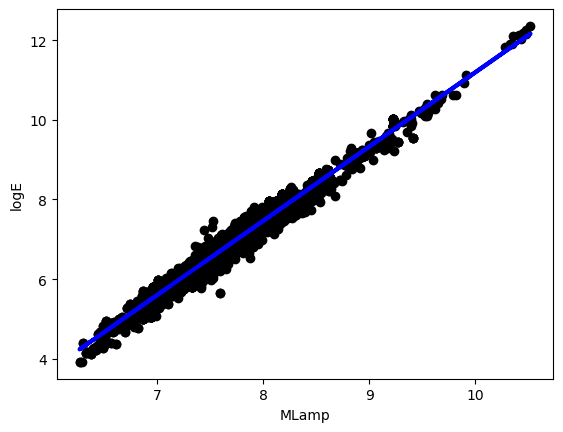

 

 Got 13786 events
MLamp = 1.03 MLA + 0.992
alt: MLA = 0.973 MLamp - 0.965
R-squared value: 0.888
Mean squared error: 0.02


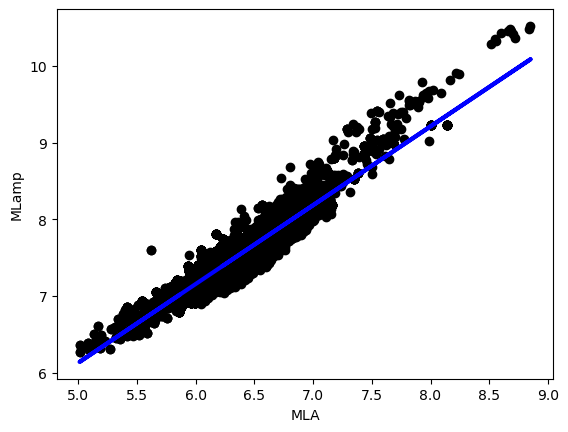

 

 Got 13786 events
ME = 1.33 MLA - 5.47
alt: MLA = 0.752 ME + 4.11
R-squared value: 0.933
Mean squared error: 0.02


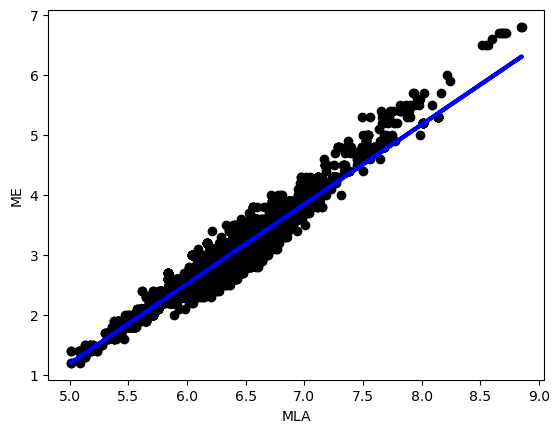

 

 Got 13786 events
logamp = 1.03 MLA - 3.42
alt: MLA = 0.973 logamp + 3.33
R-squared value: 0.888
Mean squared error: 0.02


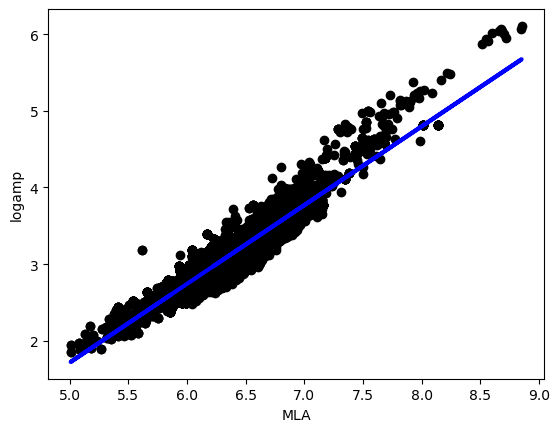

 

 Got 13786 events
logA = 1.0 MLA - 4.41
alt: MLA = 1.0 logA + 4.41
R-squared value: 1.0
Mean squared error: 0.00


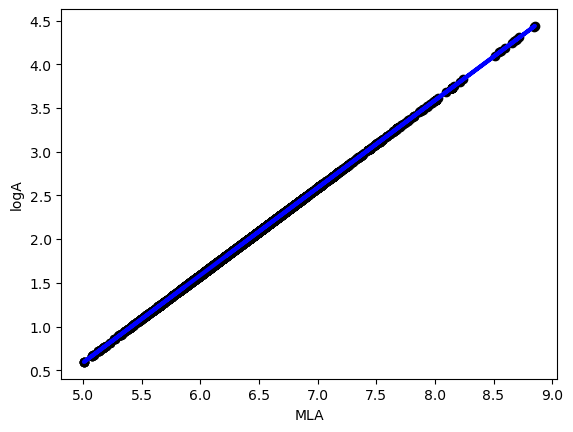

 

 Got 13786 events
logE = 1.99 MLA - 6.09
alt: MLA = 0.502 logE + 3.06
R-squared value: 0.934
Mean squared error: 0.04


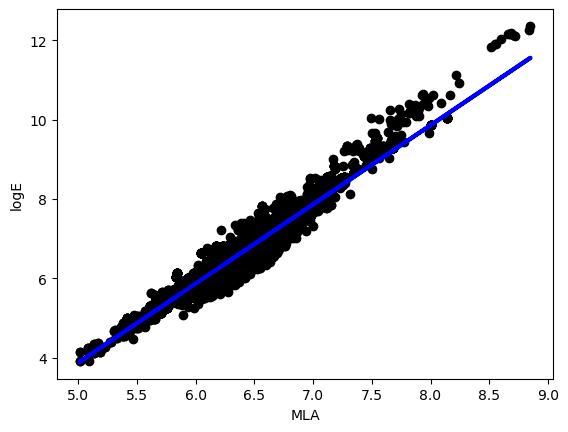

 

 Got 13786 events
MLamp = 0.778 ME + 5.2
alt: ME = 1.28 MLamp - 6.68
R-squared value: 0.966
Mean squared error: 0.01


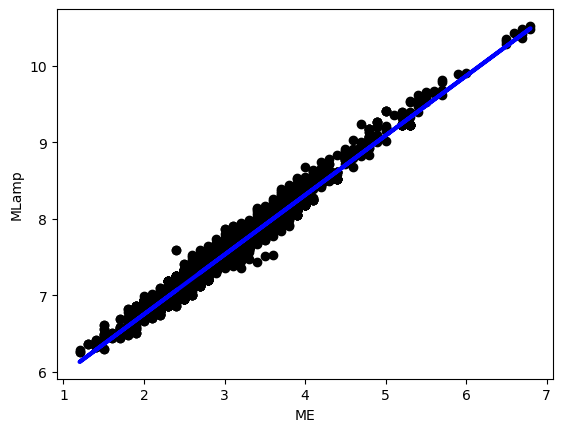

 

 Got 13786 events
MLA = 0.701 ME + 4.26
alt: ME = 1.43 MLA - 6.07
R-squared value: 0.933
Mean squared error: 0.01


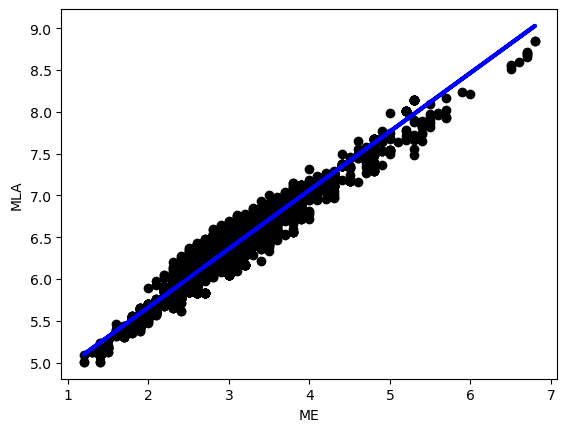

 

 Got 13786 events
logamp = 0.778 ME + 0.784
alt: ME = 1.28 logamp - 1.01
R-squared value: 0.966
Mean squared error: 0.01


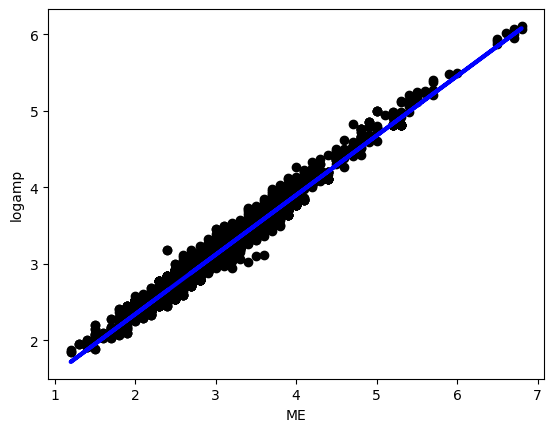

 

 Got 13786 events
logA = 0.701 ME - 0.155
alt: ME = 1.43 logA + 0.221
R-squared value: 0.933
Mean squared error: 0.01


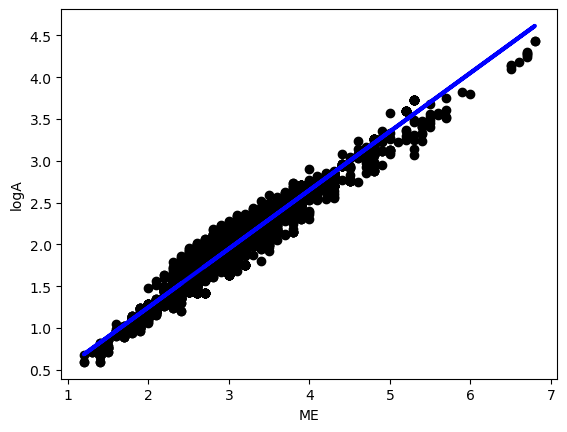

 

 Got 13786 events
logE = 1.5 ME + 2.11
alt: ME = 0.669 logE - 1.41
R-squared value: 0.997
Mean squared error: 0.00


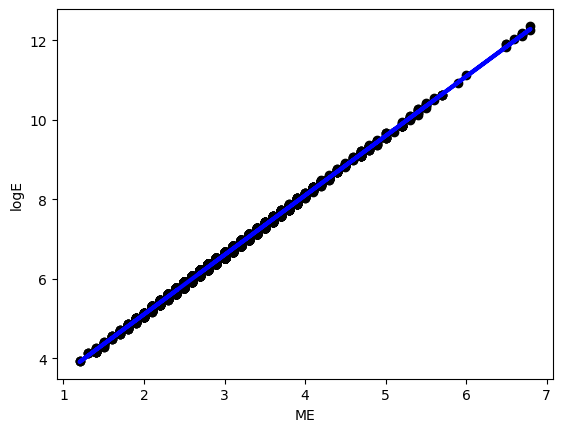

 

 Got 13786 events
MLamp = 1.0 logamp + 4.41
alt: logamp = 1.0 MLamp - 4.41
R-squared value: 1.0
Mean squared error: 0.00


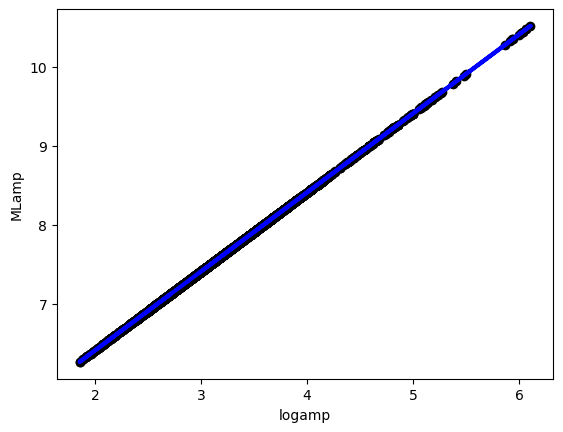

 

 Got 13786 events
MLA = 0.864 logamp + 3.67
alt: logamp = 1.16 MLA - 4.24
R-squared value: 0.888
Mean squared error: 0.02


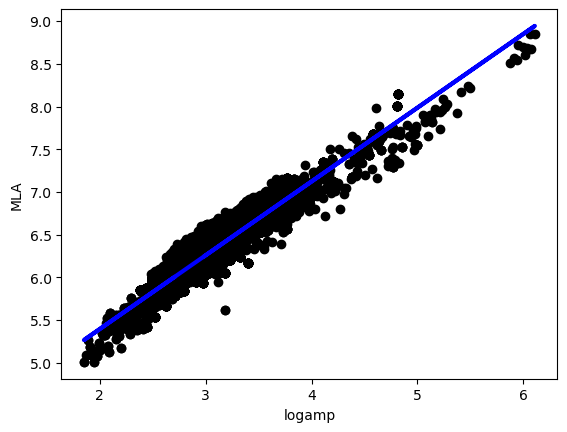

 

 Got 13786 events
ME = 1.24 logamp - 0.874
alt: logamp = 0.806 ME + 0.704
R-squared value: 0.966
Mean squared error: 0.01


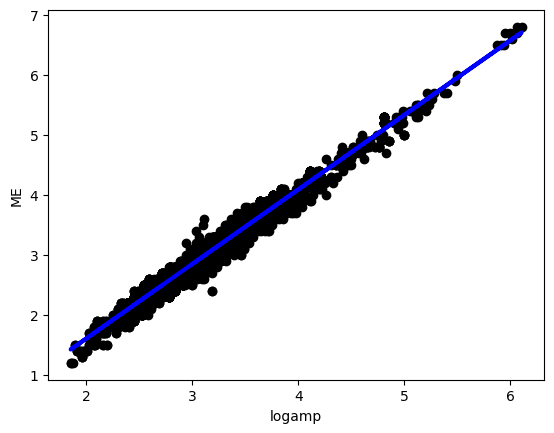

 

 Got 13786 events
logA = 0.864 logamp - 0.749
alt: logamp = 1.16 logA + 0.867
R-squared value: 0.888
Mean squared error: 0.02


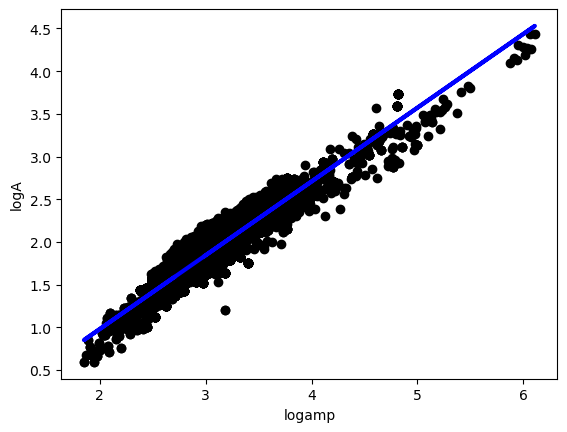

 

 Got 13786 events
logE = 1.86 logamp + 0.787
alt: logamp = 0.537 logE - 0.423
R-squared value: 0.97
Mean squared error: 0.02


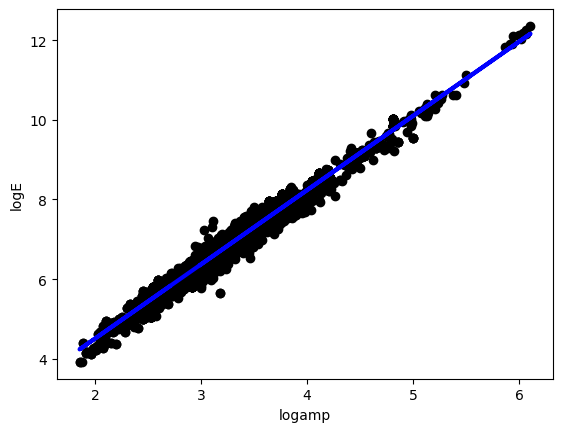

 

 Got 13786 events
MLamp = 1.03 logA + 5.53
alt: logA = 0.973 MLamp - 5.38
R-squared value: 0.888
Mean squared error: 0.02


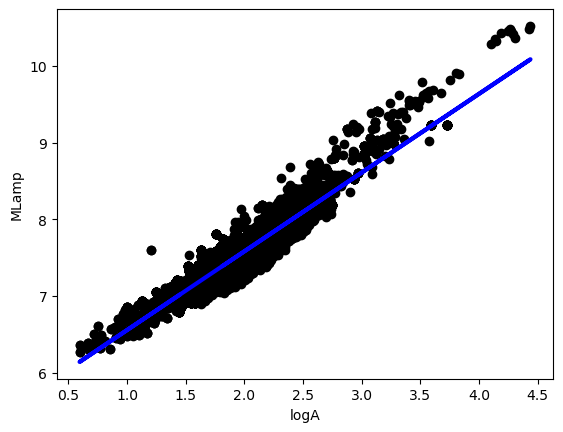

 

 Got 13786 events
MLA = 1.0 logA + 4.41
alt: logA = 1.0 MLA - 4.41
R-squared value: 1.0
Mean squared error: 0.00


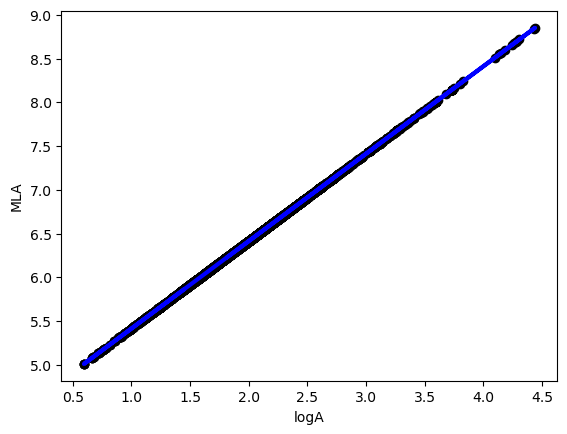

 

 Got 13786 events
ME = 1.33 logA + 0.404
alt: logA = 0.752 ME - 0.304
R-squared value: 0.933
Mean squared error: 0.02


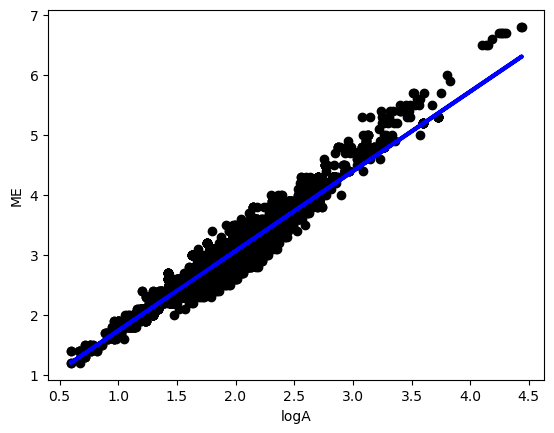

 

 Got 13786 events
logamp = 1.03 logA + 1.11
alt: logA = 0.973 logamp - 1.08
R-squared value: 0.888
Mean squared error: 0.02


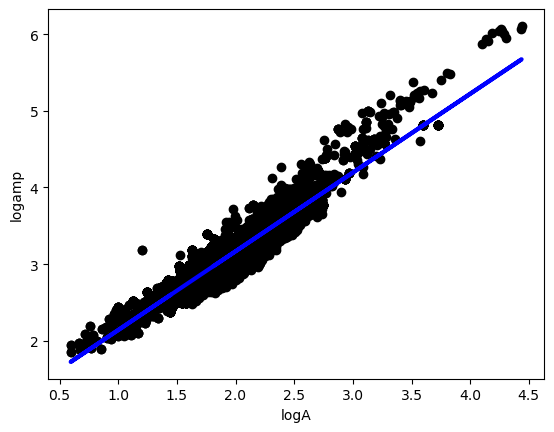

 

 Got 13786 events
logE = 1.99 logA + 2.71
alt: logA = 0.502 logE - 1.36
R-squared value: 0.934
Mean squared error: 0.04


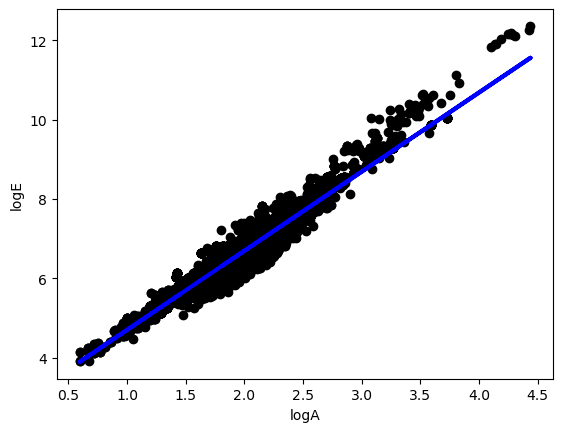

 

 Got 13786 events
MLamp = 0.521 logE + 4.1
alt: logE = 1.92 MLamp - 7.87
R-squared value: 0.97
Mean squared error: 0.01


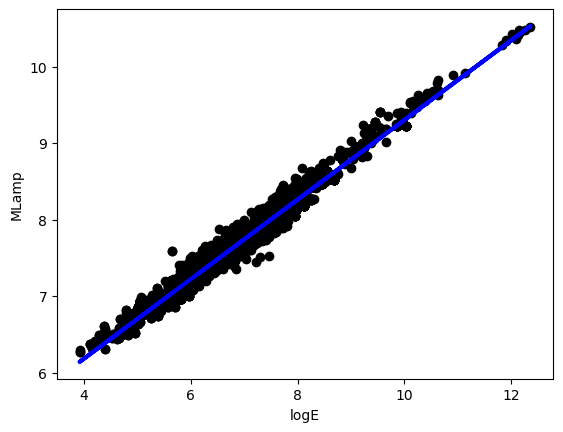

 

 Got 13786 events
MLA = 0.469 logE + 3.27
alt: logE = 2.13 MLA - 6.98
R-squared value: 0.934
Mean squared error: 0.01


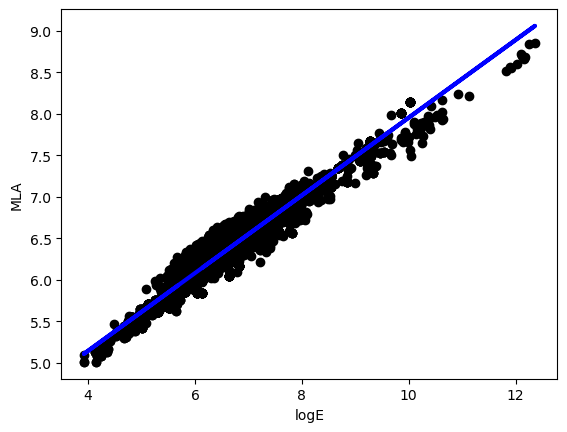

 

 Got 13786 events
ME = 0.667 logE - 1.4
alt: logE = 1.5 ME + 2.1
R-squared value: 0.997
Mean squared error: 0.00


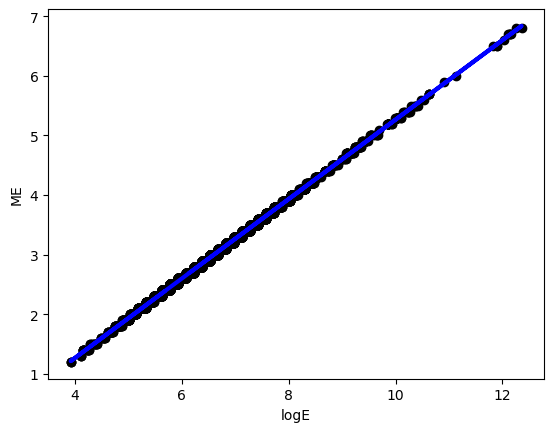

 

 Got 13786 events
logamp = 0.521 logE - 0.317
alt: logE = 1.92 logamp + 0.608
R-squared value: 0.97
Mean squared error: 0.01


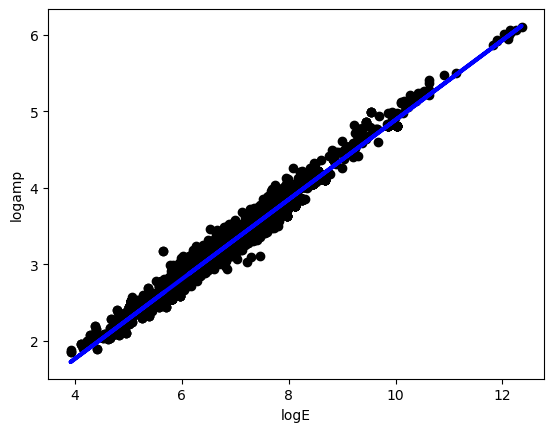

 

 Got 13786 events
logA = 0.469 logE - 1.14
alt: logE = 2.13 logA + 2.44
R-squared value: 0.934
Mean squared error: 0.01


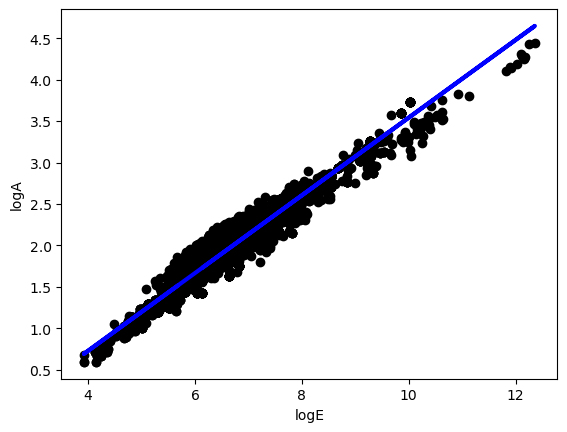

# events of t = 5123
 

 Got 5123 events
MLA = 0.691 MLamp + 0.975
alt: MLamp = 1.45 MLA - 1.41
R-squared value: 0.818
Mean squared error: 0.04


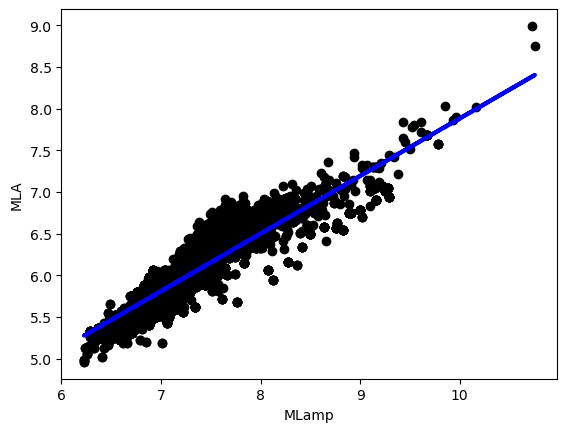

 

 Got 5123 events
ME = 1.13 MLamp - 5.67
alt: MLamp = 0.883 ME + 5.01
R-squared value: 0.962
Mean squared error: 0.02


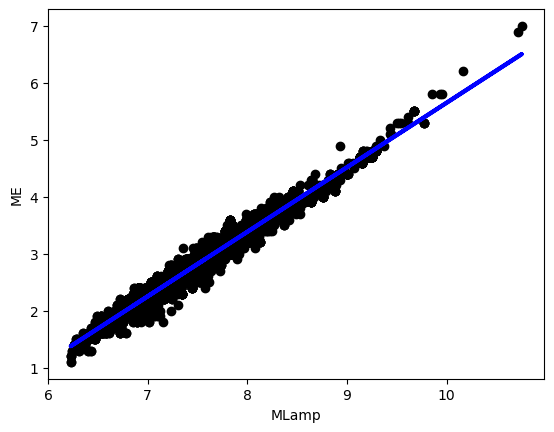

 

 Got 5123 events
logamp = 1.0 MLamp - 4.41
alt: MLamp = 1.0 logamp + 4.41
R-squared value: 1.0
Mean squared error: 0.00


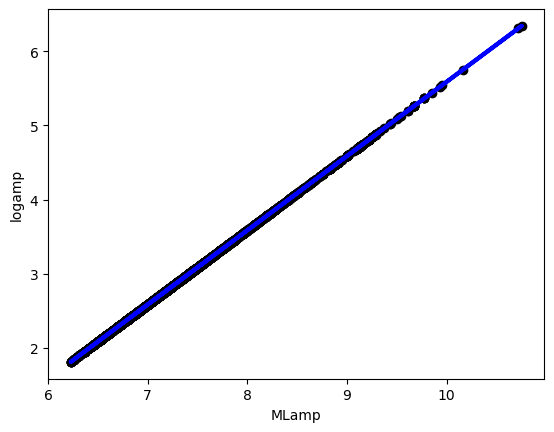

 

 Got 5123 events
logA = 0.691 MLamp - 3.44
alt: MLamp = 1.45 logA + 4.98
R-squared value: 0.818
Mean squared error: 0.04


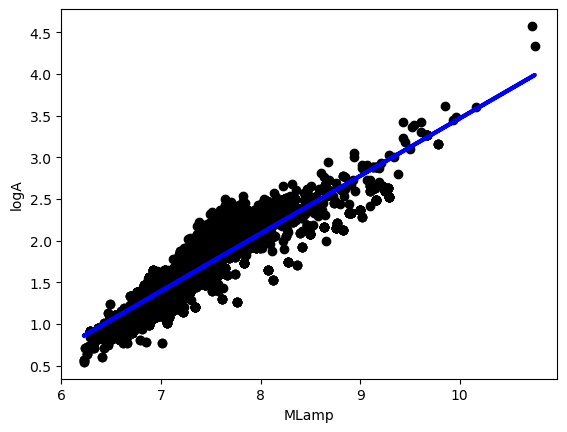

 

 Got 5123 events
logE = 1.7 MLamp - 6.41
alt: MLamp = 0.589 logE + 3.78
R-squared value: 0.964
Mean squared error: 0.04


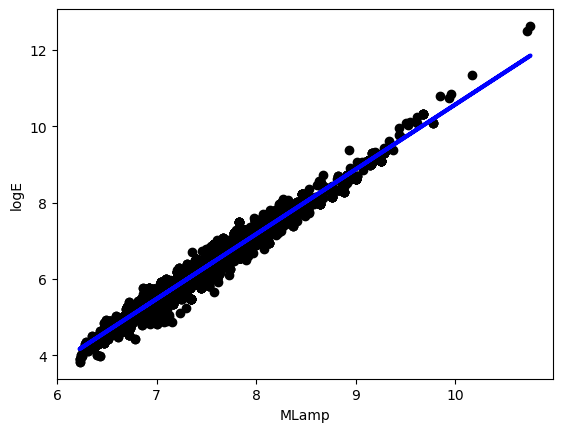

 

 Got 5123 events
MLamp = 1.18 MLA + 0.188
alt: MLA = 0.845 MLamp - 0.159
R-squared value: 0.818
Mean squared error: 0.06


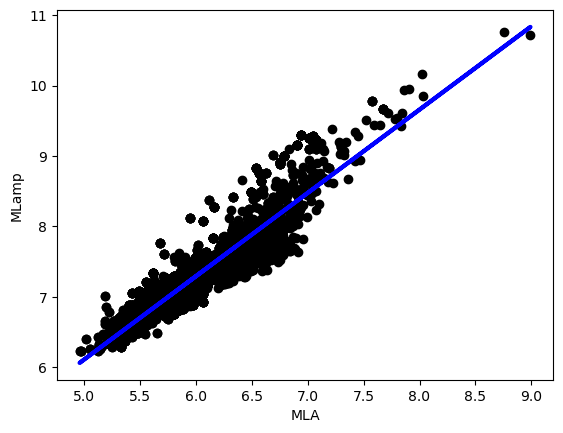

 

 Got 5123 events
ME = 1.42 MLA - 5.94
alt: MLA = 0.704 ME + 4.19
R-squared value: 0.884
Mean squared error: 0.05


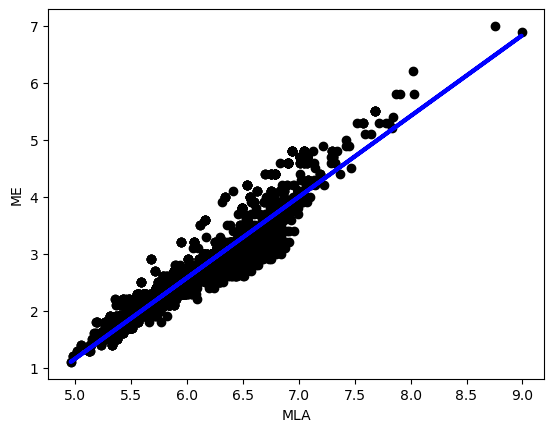

 

 Got 5123 events
logamp = 1.18 MLA - 4.23
alt: MLA = 0.845 logamp + 3.57
R-squared value: 0.818
Mean squared error: 0.06


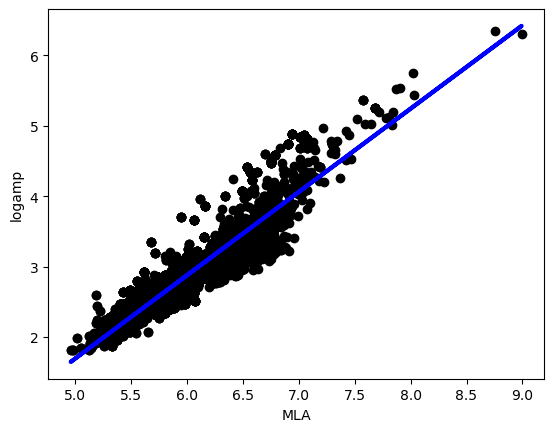

 

 Got 5123 events
logA = 1.0 MLA - 4.41
alt: MLA = 1.0 logA + 4.41
R-squared value: 1.0
Mean squared error: 0.00


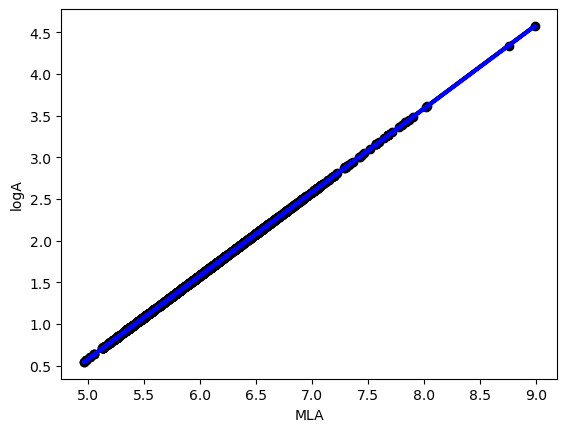

 

 Got 5123 events
logE = 2.13 MLA - 6.83
alt: MLA = 0.469 logE + 3.2
R-squared value: 0.886
Mean squared error: 0.12


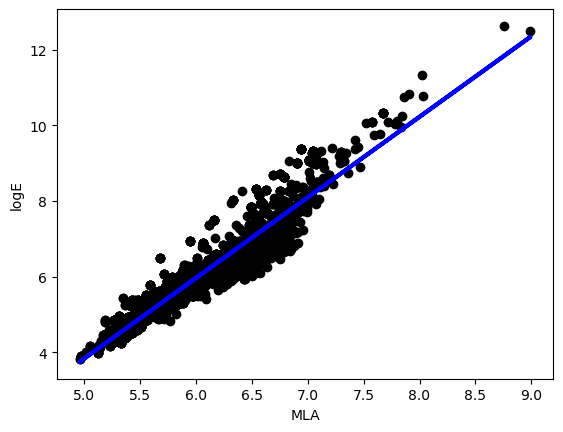

 

 Got 5123 events
MLamp = 0.85 ME + 5.1
alt: ME = 1.18 MLamp - 6.0
R-squared value: 0.962
Mean squared error: 0.01


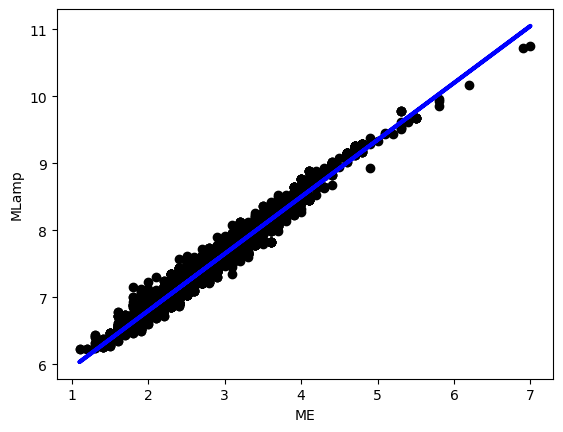

 

 Got 5123 events
MLA = 0.622 ME + 4.4
alt: ME = 1.61 MLA - 7.08
R-squared value: 0.884
Mean squared error: 0.02


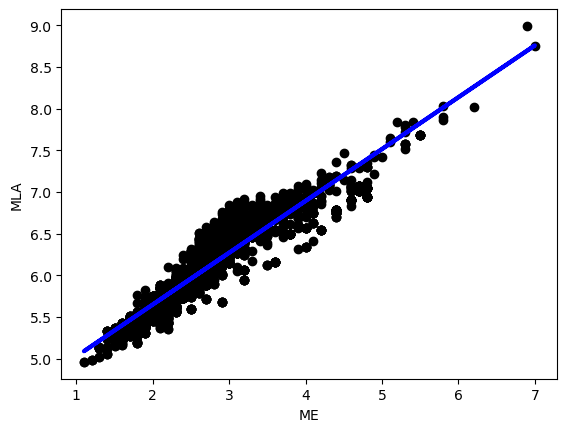

 

 Got 5123 events
logamp = 0.85 ME + 0.685
alt: ME = 1.18 logamp - 0.806
R-squared value: 0.962
Mean squared error: 0.01


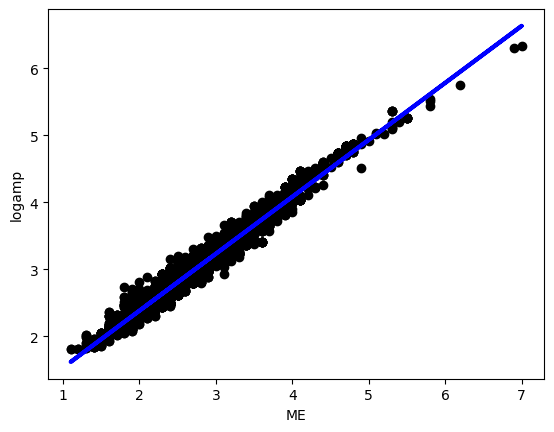

 

 Got 5123 events
logA = 0.622 ME - 0.00991
alt: ME = 1.61 logA + 0.0159
R-squared value: 0.884
Mean squared error: 0.02


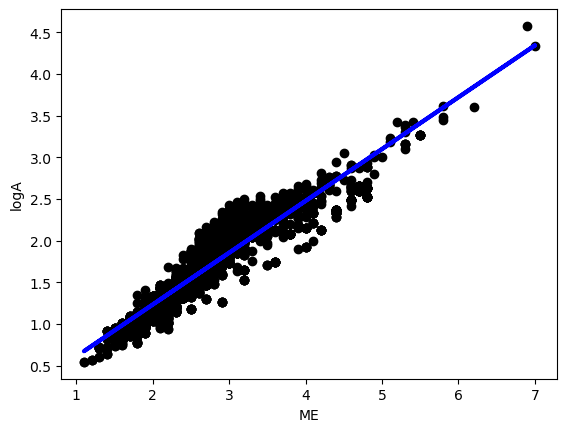

 

 Got 5123 events
logE = 1.5 ME + 2.1
alt: ME = 0.668 logE - 1.41
R-squared value: 0.998
Mean squared error: 0.00


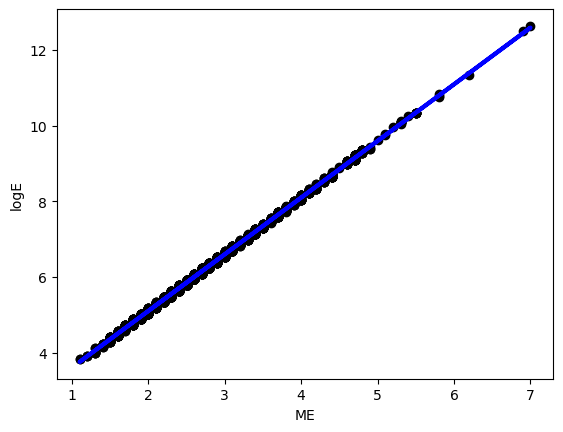

 

 Got 5123 events
MLamp = 1.0 logamp + 4.41
alt: logamp = 1.0 MLamp - 4.41
R-squared value: 1.0
Mean squared error: 0.00


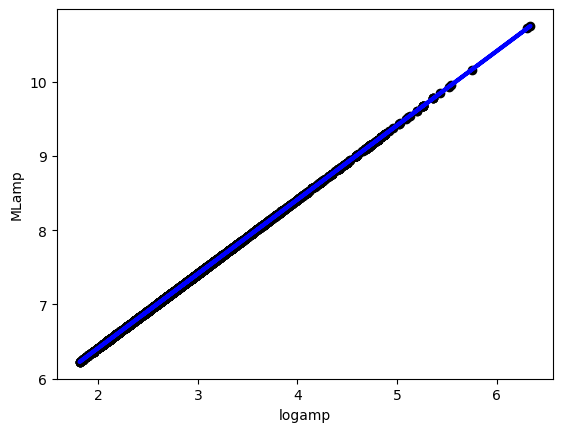

 

 Got 5123 events
MLA = 0.691 logamp + 4.02
alt: logamp = 1.45 MLA - 5.83
R-squared value: 0.818
Mean squared error: 0.04


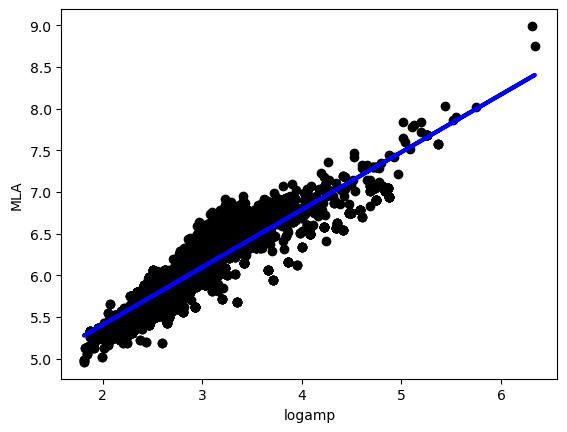

 

 Got 5123 events
ME = 1.13 logamp - 0.675
alt: logamp = 0.883 ME + 0.596
R-squared value: 0.962
Mean squared error: 0.02


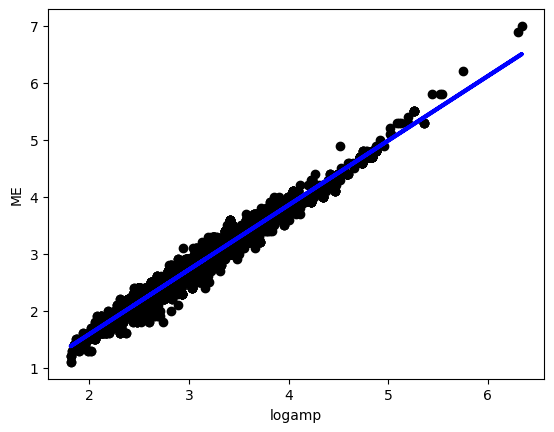

 

 Got 5123 events
logA = 0.691 logamp - 0.39
alt: logamp = 1.45 logA + 0.564
R-squared value: 0.818
Mean squared error: 0.04


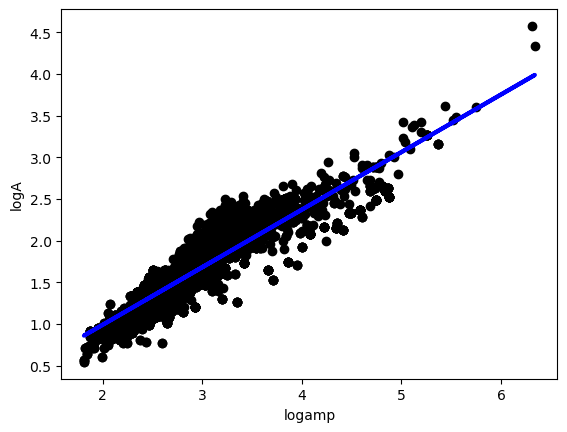

 

 Got 5123 events
logE = 1.7 logamp + 1.08
alt: logamp = 0.589 logE - 0.638
R-squared value: 0.964
Mean squared error: 0.04


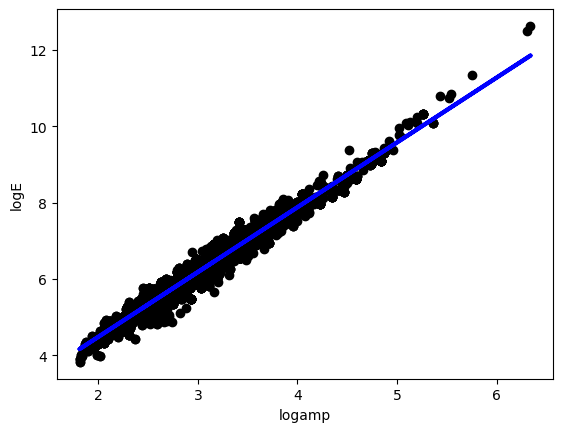

 

 Got 5123 events
MLamp = 1.18 logA + 5.41
alt: logA = 0.845 MLamp - 4.57
R-squared value: 0.818
Mean squared error: 0.06


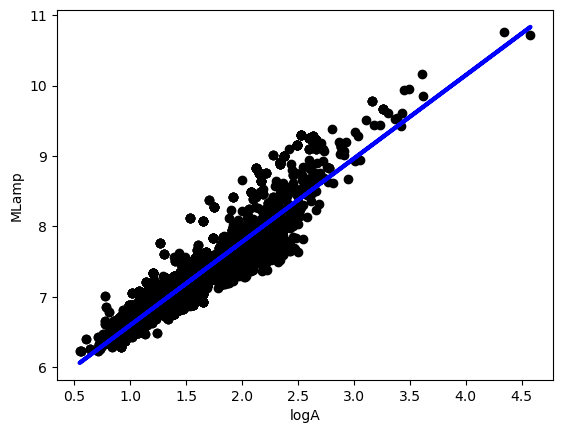

 

 Got 5123 events
MLA = 1.0 logA + 4.41
alt: logA = 1.0 MLA - 4.41
R-squared value: 1.0
Mean squared error: 0.00


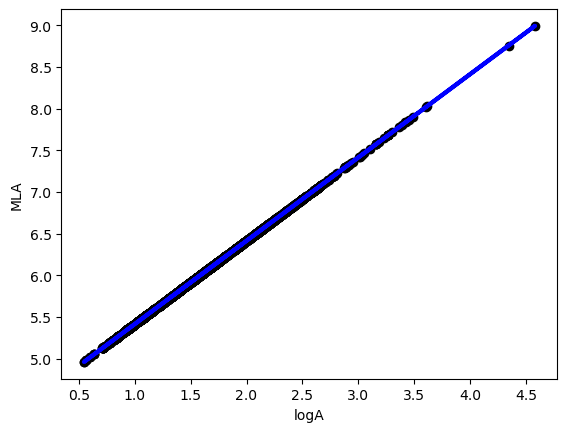

 

 Got 5123 events
ME = 1.42 logA + 0.325
alt: logA = 0.704 ME - 0.229
R-squared value: 0.884
Mean squared error: 0.05


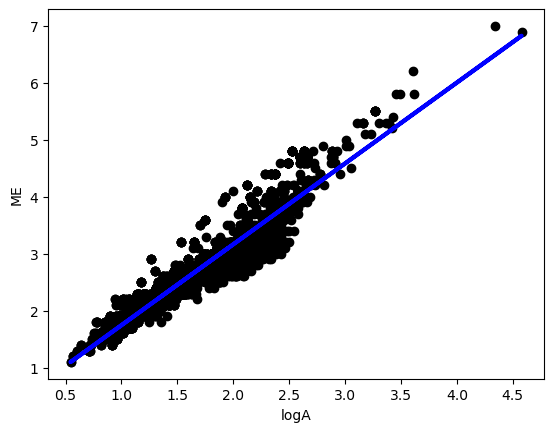

 

 Got 5123 events
logamp = 1.18 logA + 0.999
alt: logA = 0.845 logamp - 0.844
R-squared value: 0.818
Mean squared error: 0.06


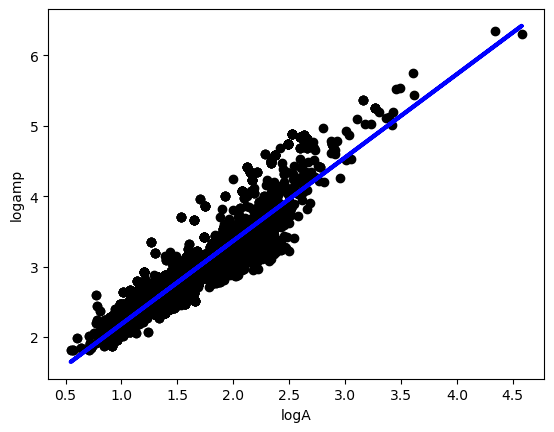

 

 Got 5123 events
logE = 2.13 logA + 2.58
alt: logA = 0.469 logE - 1.21
R-squared value: 0.886
Mean squared error: 0.12


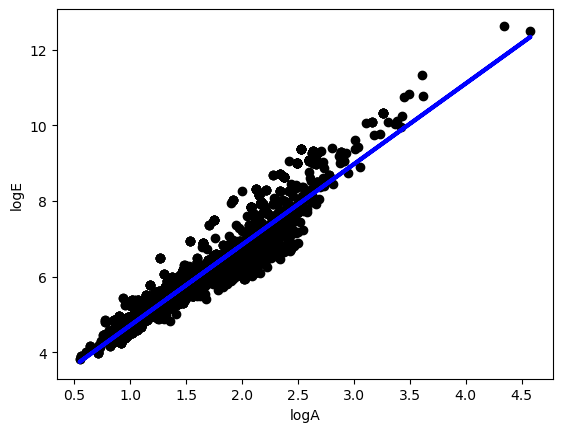

 

 Got 5123 events
MLamp = 0.567 logE + 3.9
alt: logE = 1.76 MLamp - 6.88
R-squared value: 0.964
Mean squared error: 0.01


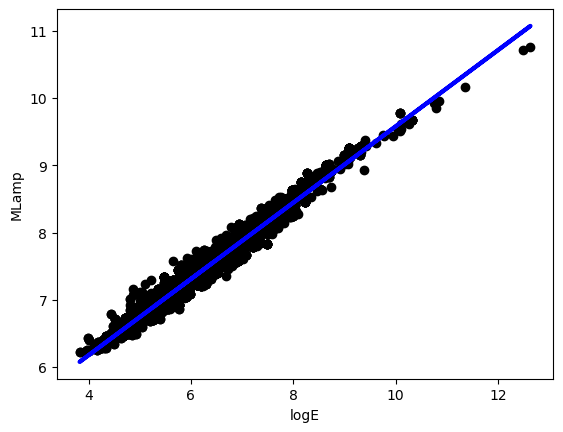

 

 Got 5123 events
MLA = 0.416 logE + 3.53
alt: logE = 2.41 MLA - 8.49
R-squared value: 0.886
Mean squared error: 0.02


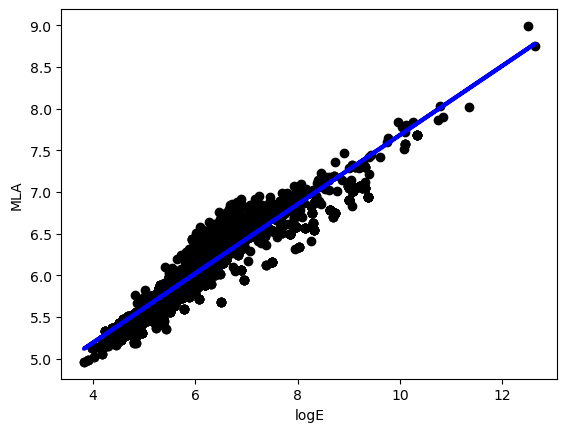

 

 Got 5123 events
ME = 0.666 logE - 1.4
alt: logE = 1.5 ME + 2.1
R-squared value: 0.998
Mean squared error: 0.00


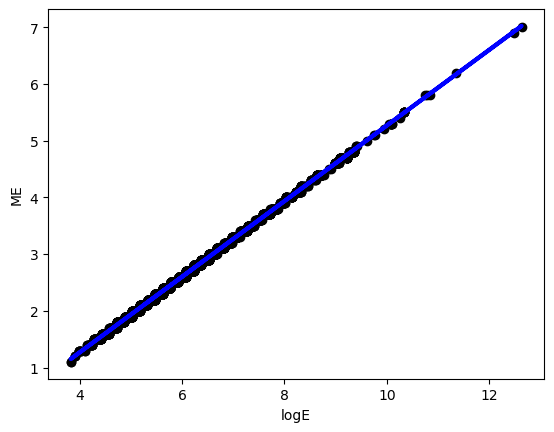

 

 Got 5123 events
logamp = 0.567 logE - 0.509
alt: logE = 1.76 logamp + 0.897
R-squared value: 0.964
Mean squared error: 0.01


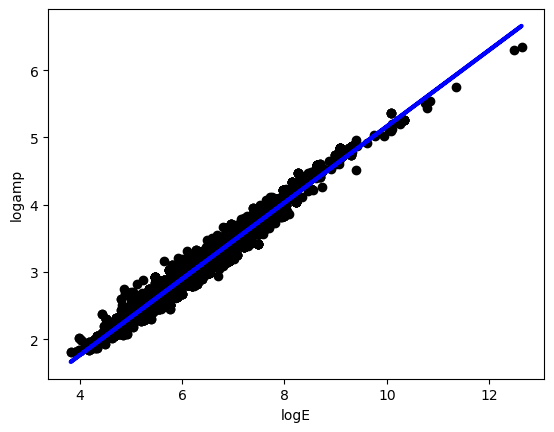

 

 Got 5123 events
logA = 0.416 logE - 0.885
alt: logE = 2.41 logA + 2.13
R-squared value: 0.886
Mean squared error: 0.02


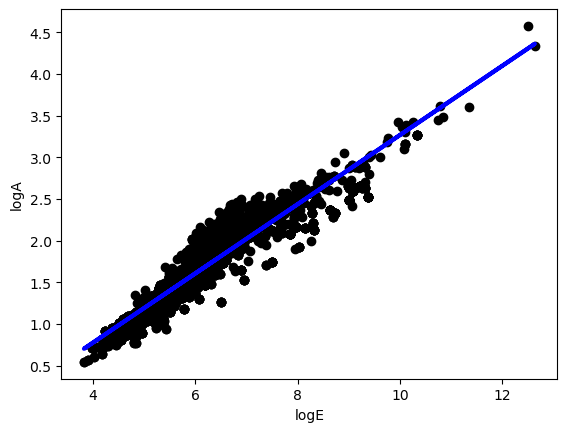

In [10]:
MLcat = MLcat0.copy()

# Compute local magnitude
MLcat['logamp'] = np.log10(MLcat['peakamp'])
MLcat['logA'] = np.log10(MLcat['peakA'])
R = 5000 # approx distance of MBWH from "dome" source
MLcat['MLamp'] = np.log10(MLcat['peakamp']) + np.log10(R) + 3.01e-6 * R + 0.70
MLcat['MLA'] = np.log10(MLcat['peakA']) + np.log10(R) + 3.01e-6 * R + 0.70

MLcat['logE'] = np.log10(MLcat['energy'])
MLcat['ME'] = np.round(2/3 * MLcat['logE'],1)-1.4
'''
# remove rows with NULL values
mergedcat['emag'] = mergedcat['emag'].replace(-99.9, np.nan)
mergedcat['mag'] = mergedcat['mag'].replace(-2.0, np.nan)
'''


DFT.summarize_catdf(MLcat)

DFT.linearRegressMagnitudesBySubclass(MLcat, subclass_col='subclass', mag_columns=['MLamp', 'MLA', 'ME', 'logamp', 'logA', 'logE'], \
                                      subclasses=['r', 'e', 'l', 'h', 't'], plot=True, print_stats=True)

# Attenuation for local events and Hunga Tonga

seems that for upper limit of reasonable Q, only expect x2.1 attenuation for 10-s at MSVF and x1.1 for 100-s

for local events, not even a 0.01 magnitude change

In [11]:
def compute_attenuation(Q, r, f, c):
    attenuation = np.exp( (-np.pi * thisf * r) / (Q * c)) 
    correction = 1/attenuation
    print('\n', f"freq={f}, R={r}, Q={Q}, speed={c}")
    print(f'traveltime={DFT.sigfigs(r/c)}')
    print(f'correction={DFT.sigfigs(correction)}')
    print(f'ML change={DFT.sigfigs(np.log10(correction))}')
    print(f'ME change={DFT.sigfigs(2/3*np.log10(correction**2))}')

Q = 100
r = 760000
f = [0.1, 0.01]
c = 3.14 * 1000
for thisf in f:
    compute_attenuation(Q, r, thisf, c)

Q = 23
r = 15000
f = 10.0
c = 1200    
compute_attenuation(Q, r, f, c)


 freq=0.1, R=760000, Q=100, speed=3140.0
traveltime=240.0
correction=2.1
ML change=0.33
ME change=0.44

 freq=0.01, R=760000, Q=100, speed=3140.0
traveltime=240.0
correction=1.1
ML change=0.033
ME change=0.044

 freq=10.0, R=15000, Q=23, speed=1200
traveltime=12.0
correction=1.0
ML change=0.0074
ME change=0.0099


# 6. Compute metrics for Montserrat events, including creating SDS dayfiles if needed

In [40]:
import os
from importlib import reload
import sys
import obspy
sys.path.append('lib')
import dataframe_tools as DFT
import pipelines
reload(pipelines)
paths = {}
paths['DATA_DIR'] = os.path.join('/data')
paths['SDS_DIR'] = os.path.join(paths['DATA_DIR'], 'SDS')
paths['SAM_DIR'] = os.path.join(paths['DATA_DIR'], 'SAM')
paths['RESPONSE_DIR'] = os.path.join('data', 'responses')
print(paths)

# Montserrat data from Seisan archive
seisandbdir =  '/data/SEISAN_DB/WAV/DSNC_'
net = 'MV'
invfile = os.path.join(paths['RESPONSE_DIR'],f"{net}.xml")
source = {'lat':16.71111, 'lon':-62.17722}
dbout = 'db'
N = 3
catResultsDF = pd.DataFrame(columns=['Event', 'start', 'end', 'duration', 'ML', 'sum(ER)', 'ME', 'DR', 'DRS'])
display(catResultsDF) 

{'DATA_DIR': '/data', 'SDS_DIR': '/data/SDS', 'SAM_DIR': '/data/SAM', 'RESPONSE_DIR': 'data/responses'}


Empty DataFrame
Columns: [Event, start, end, duration, ML, sum(ER), ME, DR, DRS]
Index: []

In [41]:
def row2event(catDF, rownum):

        eventname = f'{subclass} {i}'
        startt = obspy.UTCDateTime(row['filetime'])
        endt = max([startt + min([row['trigger_duration'], 20]), row['offtime']])
        print(f'Calling for data from {startt} to {endt}')

        # need to check SDS directory exists for this date, if not, we run the sausage to create it
        pipelines.big_sausage(seisandbdir, paths, startt, endt, \
                        sampling_interval=2.56, \
                        source=source, \
                        invfile=invfile, \
                        Q=None, \
                        ext='pickle', \
                        dbout=dbout, \
                        net=net)        
        
        DFT.wrapper(paths['SDS_DIR'], net, startt, endt, invfile, catResultsDF, eventname, source)

In [42]:
#subclasses = ['r', 'e', 'l', 'h', 't']
subclasses = ['t']
for subclass in subclasses:
    cat = MLcat[MLcat['subclass']==subclass]
    big = cat.nlargest(N, 'ME')
    for i, row in big.iterrows():
        print('\n', i, row, '\n')
        row2event(big, i)


 3192 Unnamed: 0                                                            225
filetime                                      1998-10-18T13:16:05.040000Z
starttime                                                    908716565.04
Fs                                                                  75.19
calib                                                                 1.0
quality                                                             4.915
medianF                                                              5.25
peakF                                                                 1.7
peakA                                                        22021.281774
bw_min                                                                0.9
bw_max                                                                2.9
snr                                                              6.691242
signal_level                                                2189118.01837
noise_level                    

NameError: name 'glob' is not defined